In [6]:
pip install vallenae

  Obtaining dependency information for vallenae from https://files.pythonhosted.org/packages/d5/af/36144aca0fdef09b00c2835425c4d42e3978279a6349edad43d3ec684872/vallenae-0.8.0-py3-none-any.whl.metadata
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.2 MB/s eta 0:00:00
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Obtaining dependency information for cffi>=1.0 from https://files.pythonhosted.org/packages/73/dd/15c6f32166f0c8f97d8aadee9ac8f096557899f4f21448d2feb74cf4f210/cffi-1.16.0-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/118.7 kB ? eta -:--:--
     -------------------------------------- 118

In [5]:
pip install numba

  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/2c/31/121c11175e49482ef5f8472966f15a02054082c33de6e6a5ca5e59aef3ae/numba-0.58.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/79/26/50423498efeca0bf422a0f6d7d5795324403595c15069d35824e8a75732e/llvmlite-0.41.0-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------ --------------------------------- 0.4/2.6 MB 12.5 MB/s eta 0:00:01
   ---------------- ----------------------- 1.0/2.6 MB 13.1 MB/s eta 0:00:01
   ----------------------------- ---------- 1.9/2.6 MB 15.3 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 15.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 13.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
    --------------------------------------- 0.

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import vallenae as vae
import numpy as np

In [58]:
tradb = Path(r'C:\Users\djeri\OneDrive\Desktop\Vallen\data\malik\UnderExtTest1_1000DDT_35DB.tradb')

In [59]:
    with vae.io.TraDatabase(tradb) as tradb:
        print(tradb.fieldinfo())
        full_df = tradb.read()

{'Time': {'Unit': '[s]', 'Parameter': None}, 'Thr': {'Unit': '[µV]', 'Parameter': 'ADC_µV'}, 'SampleRate': {'Unit': '[Hz]', 'Parameter': None}, 'Data': {'Unit': None, 'Parameter': 'TR_mV'}}


Tra: 100%|██████████| 228/228 [00:00<00:00, 7558.74it/s]


In [60]:
full_df

time  channel  param_id  pretrigger  threshold  samplerate   
trai                                                                      
1        1.478906        1         2          10   0.000056     1000000  \
2       64.776992        1         2          10   0.000056     1000000   
3       84.224131        1         2          10   0.000056     1000000   
4      124.657815        1         2          10   0.000056     1000000   
5      142.368001        1         2          10   0.000056     1000000   
...           ...      ...       ...         ...        ...         ...   
224   3207.889501        1         2          10   0.000056     1000000   
225   3247.003397        1         2          10   0.000056     1000000   
226   3284.301964        1         2          10   0.000056     1000000   
227   3294.105002        1         2          10   0.000056     1000000   
228   3338.314311        1         2          10   0.000056     1000000   

      samples                                               data    raw  
trai                                                                     
1         558  [7.8125e-06, -6.2500003e-06, -1.5625001e-06, 3...  False  
2         222  [-2.5000001e-05, 3.4375e-05, 3.9062503e-05, -1...  False  
3         666  [4.6875e-06, 6.2500003e-06, -4.6875e-06, -3.12...  False  
4         216  [-1.4062501e-05, 7.8125e-06, -3.1250001e-06, 6...  False  
5         656  [-1.5625001e-06, 6.2500003e-06, 0.0, -6.250000...  False  
...       ...                                                ...    ...  
224       210  [3.1250001e-06, -3.1250001e-06, -3.1250001e-06...  False  
225       260  [1.5625e-05, 4.6875e-06, -3.1250001e-06, 1.562...  False  
226       210  [-4.6875e-06, 0.0, 3.1250001e-06, 3.1250001e-0...  False  
227       676  [2.1875001e-05, -1.4062501e-05, -3.59375e-05, ...  False  
228       234  [-4.6875e-06, -1.5625001e-06, 9.375e-06, 7.812...  False  

[228 rows x 9 columns]

In [61]:
filtered_df = full_df['data'].where(full_df['channel']==1)

print(filtered_df)

trai
1      [7.8125e-06, -6.2500003e-06, -1.5625001e-06, 3...
2      [-2.5000001e-05, 3.4375e-05, 3.9062503e-05, -1...
3      [4.6875e-06, 6.2500003e-06, -4.6875e-06, -3.12...
4      [-1.4062501e-05, 7.8125e-06, -3.1250001e-06, 6...
5      [-1.5625001e-06, 6.2500003e-06, 0.0, -6.250000...
                             ...                        
224    [3.1250001e-06, -3.1250001e-06, -3.1250001e-06...
225    [1.5625e-05, 4.6875e-06, -3.1250001e-06, 1.562...
226    [-4.6875e-06, 0.0, 3.1250001e-06, 3.1250001e-0...
227    [2.1875001e-05, -1.4062501e-05, -3.59375e-05, ...
228    [-4.6875e-06, -1.5625001e-06, 9.375e-06, 7.812...
Name: data, Length: 228, dtype: object


In [62]:
new=filtered_df.dropna()
new

trai
1      [7.8125e-06, -6.2500003e-06, -1.5625001e-06, 3...
2      [-2.5000001e-05, 3.4375e-05, 3.9062503e-05, -1...
3      [4.6875e-06, 6.2500003e-06, -4.6875e-06, -3.12...
4      [-1.4062501e-05, 7.8125e-06, -3.1250001e-06, 6...
5      [-1.5625001e-06, 6.2500003e-06, 0.0, -6.250000...
                             ...                        
224    [3.1250001e-06, -3.1250001e-06, -3.1250001e-06...
225    [1.5625e-05, 4.6875e-06, -3.1250001e-06, 1.562...
226    [-4.6875e-06, 0.0, 3.1250001e-06, 3.1250001e-0...
227    [2.1875001e-05, -1.4062501e-05, -3.59375e-05, ...
228    [-4.6875e-06, -1.5625001e-06, 9.375e-06, 7.812...
Name: data, Length: 228, dtype: object

In [142]:
i=0
a=[]
for i in range(227) :
    b= max(new.values[i].shape)
    a.append(b)
    

    

print(max(a))

1510


In [67]:
len(new)

228

In [174]:
newnew=new[109][:1000]



In [176]:
l=list(newnew)

In [178]:
len(l)

1000

In [179]:
newnew1=new[100]
l1=list(newnew1)
for i in range(1000-len(l1)):
             l1.append(0)

In [180]:
len(l1)

1000

In [164]:
newnew1.shape

(422,)

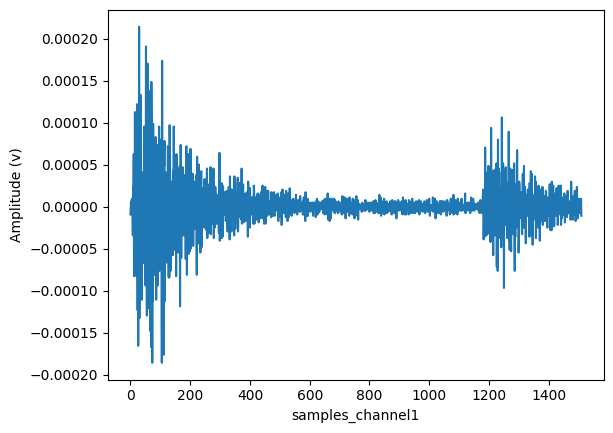

In [141]:
    plt.figure(1)
    plt.plot(new.values[108])
    plt.xlabel('samples_channel1')
    plt.ylabel('Amplitude (v)')
    plt.show()

In [29]:
filtered_df2 = full_df['data'].where(full_df['channel']==2)



In [30]:
new2=filtered_df2.dropna()

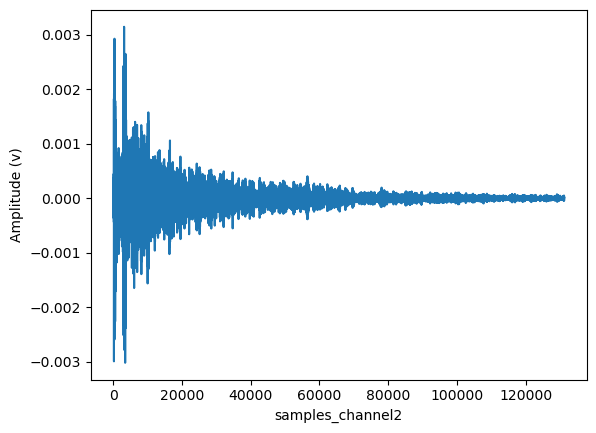

In [31]:
    plt.figure(5)
    plt.plot(new2.values[0])
    plt.xlabel('samples_channel2')
    plt.ylabel('Amplitude (v)')
    plt.show()

In [42]:
import time

In [2]:
import os
import os.path

import csv


In [6]:
dir = r"C:\Users\djeri\OneDrive\Desktop\Vallen\data\csv"
if not os.path.exists(dir):
    os.mkdir(dir)

In [7]:
with open(os.path.join(dir, "real_time"+'.csv'), "w") as f:
    writer = csv.writer(f)

In [ ]:
import pandas as pd

wave in real time: 1000 samples

Tra: 100%|██████████| 228/228 [00:00<00:00, 7151.95it/s]


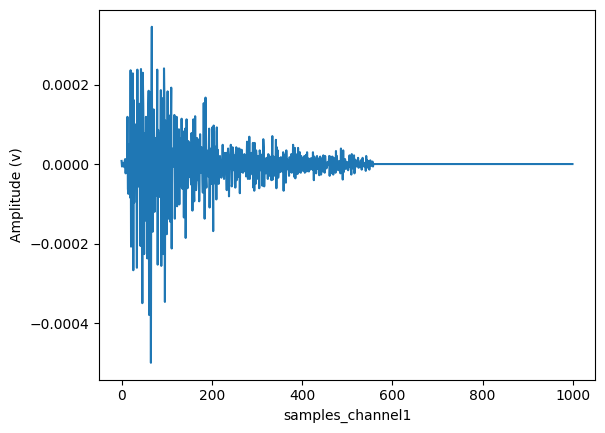

Tra: 100%|██████████| 228/228 [00:00<00:00, 4621.67it/s]


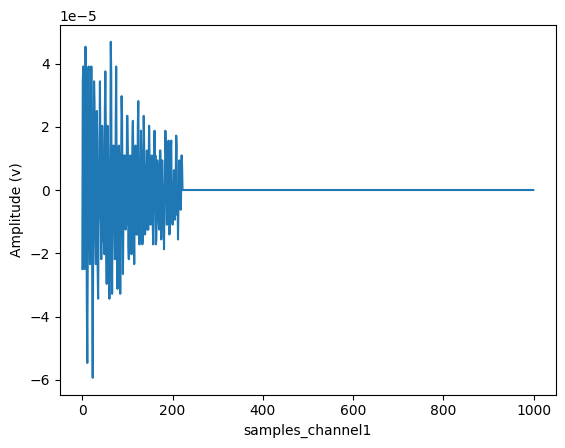

Tra: 100%|██████████| 228/228 [00:00<00:00, 8123.25it/s]


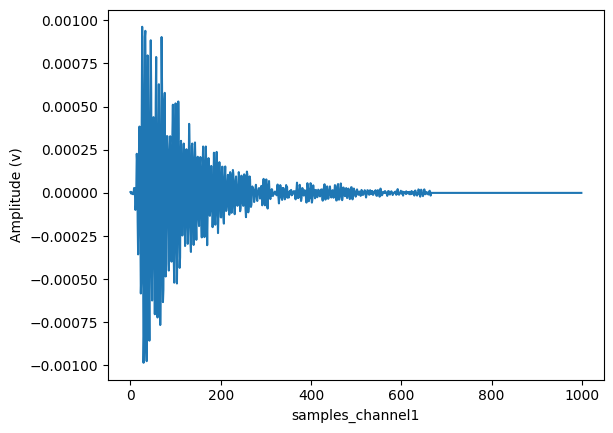

Tra: 100%|██████████| 228/228 [00:00<00:00, 8612.22it/s]


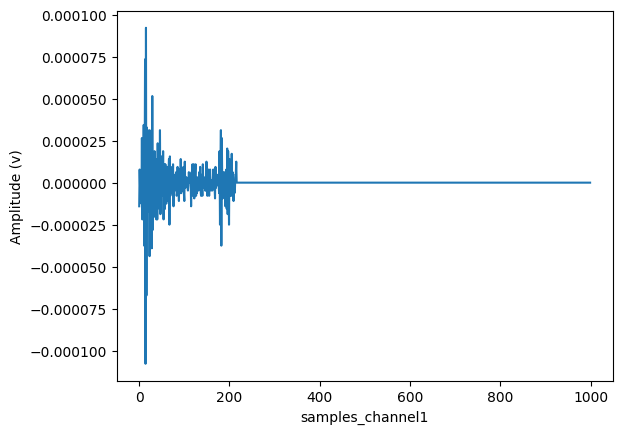

Tra: 100%|██████████| 228/228 [00:00<00:00, 5681.08it/s]


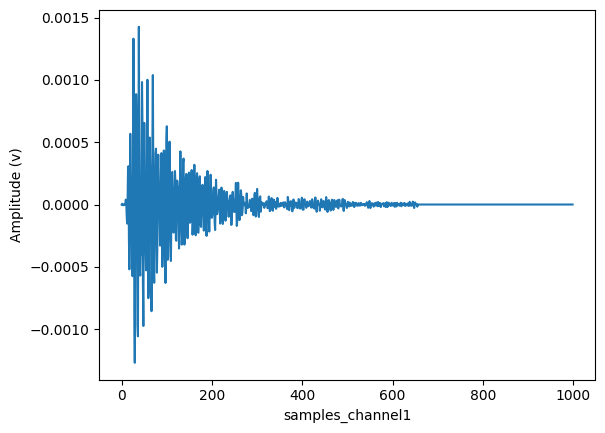

Tra: 100%|██████████| 228/228 [00:00<00:00, 8195.86it/s]


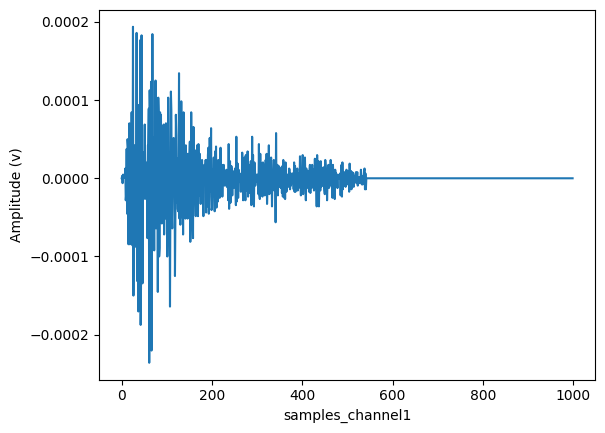

Tra: 100%|██████████| 228/228 [00:00<00:00, 6330.52it/s]


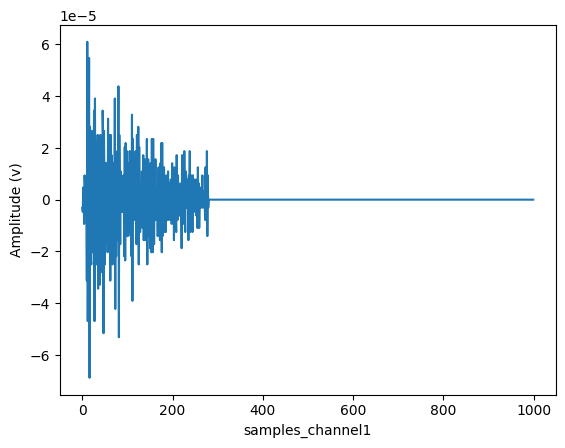

Tra: 100%|██████████| 228/228 [00:00<00:00, 8770.59it/s]


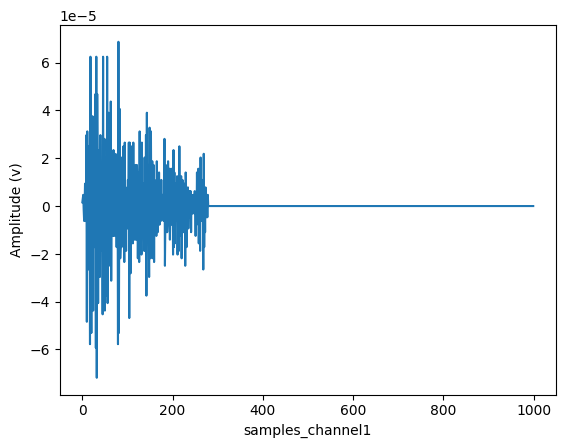

Tra: 100%|██████████| 228/228 [00:00<00:00, 6501.16it/s]


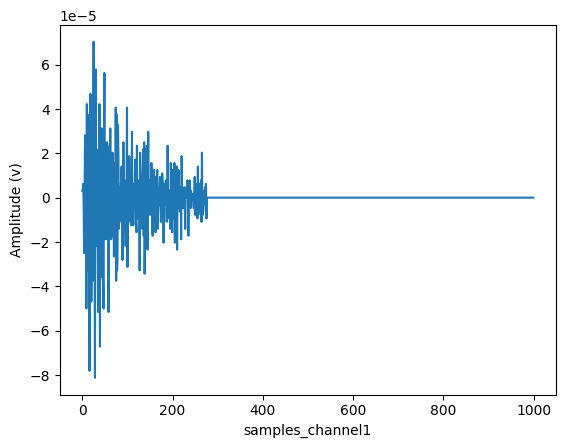

Tra: 100%|██████████| 228/228 [00:00<00:00, 6716.83it/s]


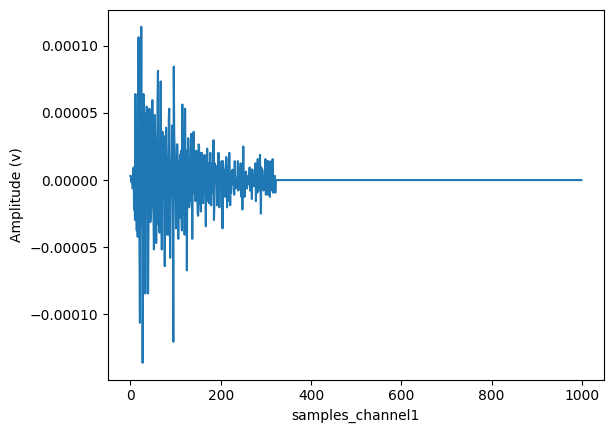

Tra: 100%|██████████| 228/228 [00:00<00:00, 7144.79it/s]


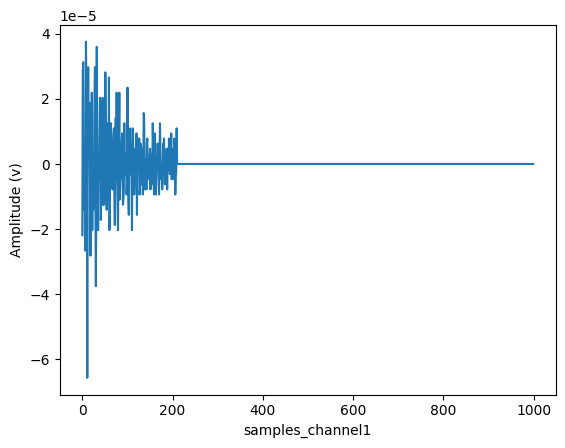

Tra: 100%|██████████| 228/228 [00:00<00:00, 6578.53it/s]


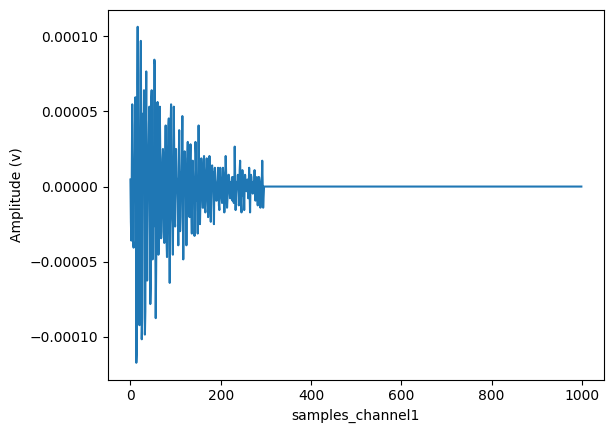

Tra: 100%|██████████| 228/228 [00:00<00:00, 7585.00it/s]


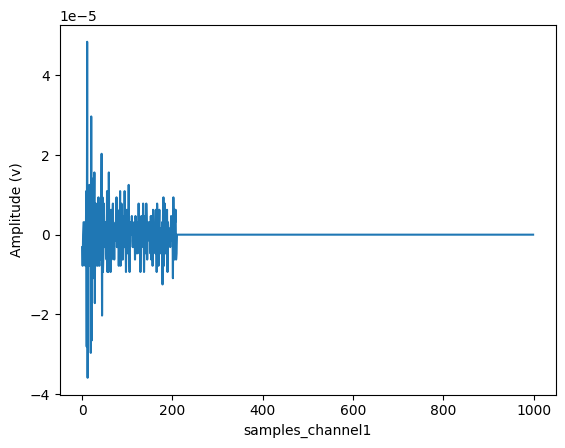

Tra: 100%|██████████| 228/228 [00:00<00:00, 10781.66it/s]


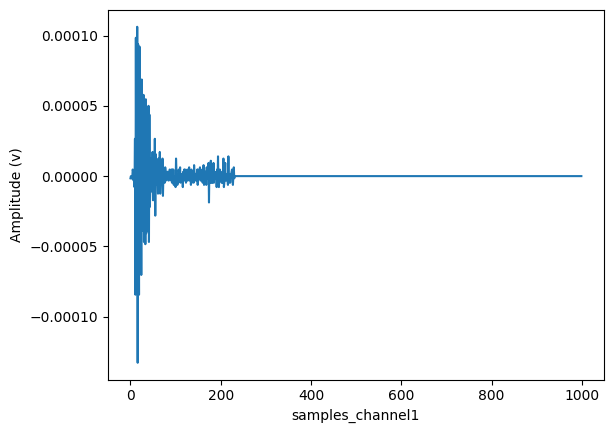

Tra: 100%|██████████| 228/228 [00:00<00:00, 7603.63it/s]


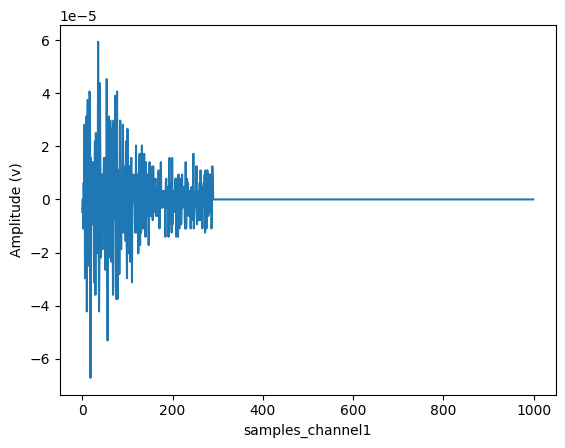

Tra: 100%|██████████| 228/228 [00:00<00:00, 8853.82it/s]


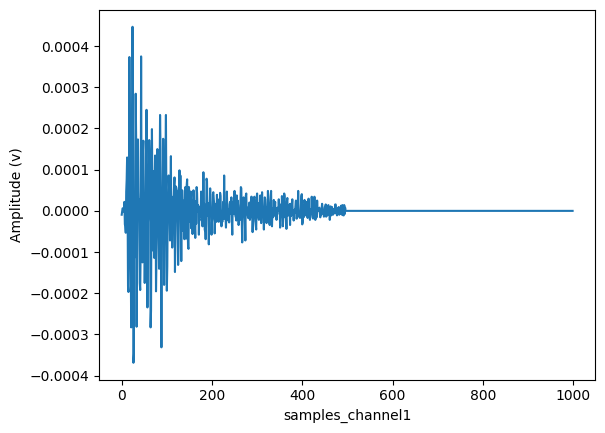

Tra: 100%|██████████| 228/228 [00:00<00:00, 6543.47it/s]


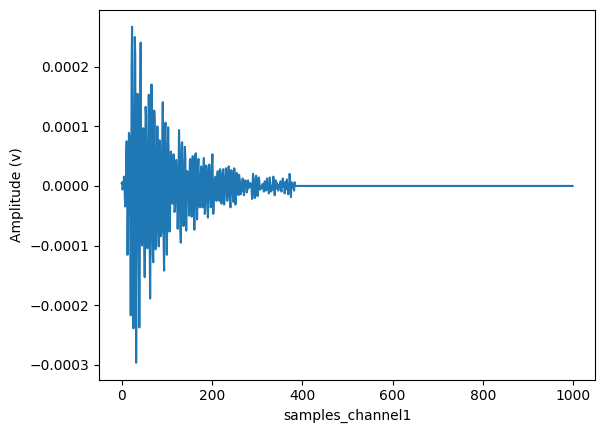

Tra: 100%|██████████| 228/228 [00:00<00:00, 5326.10it/s]


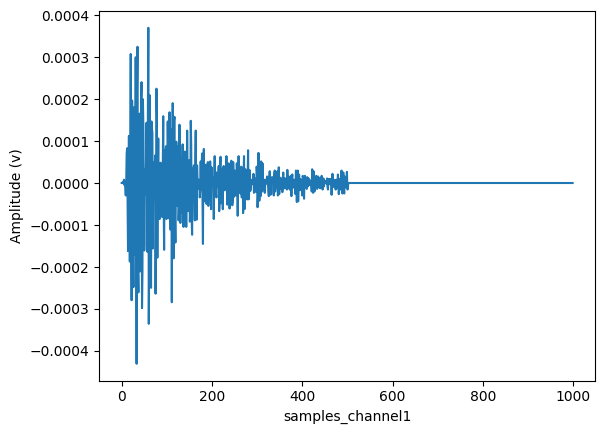

Tra: 100%|██████████| 228/228 [00:00<00:00, 6510.46it/s]


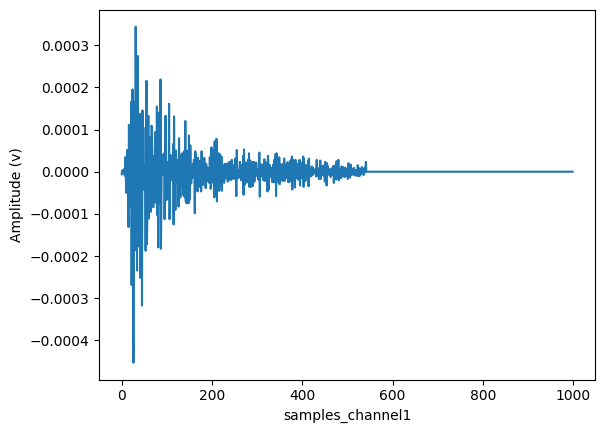

Tra: 100%|██████████| 228/228 [00:00<00:00, 8069.51it/s]


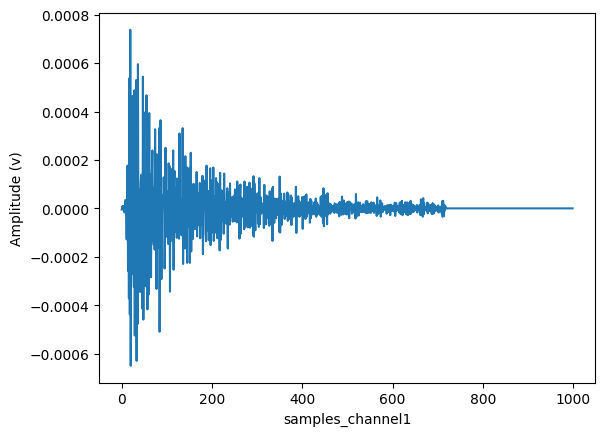

Tra: 100%|██████████| 228/228 [00:00<00:00, 5478.95it/s]


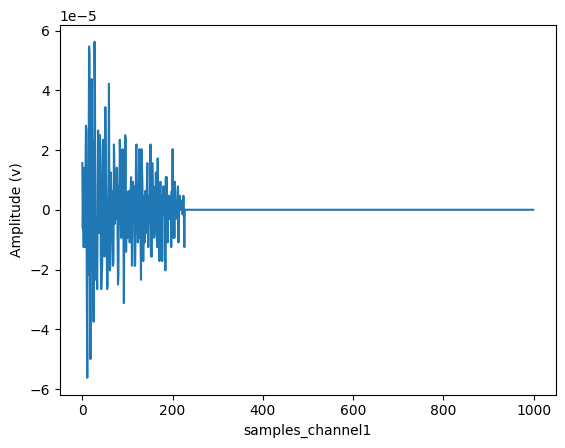

Tra: 100%|██████████| 228/228 [00:00<00:00, 8390.60it/s]


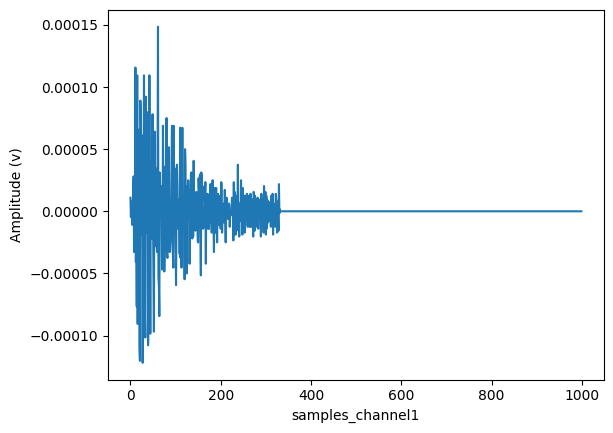

Tra: 100%|██████████| 228/228 [00:00<00:00, 7207.69it/s]


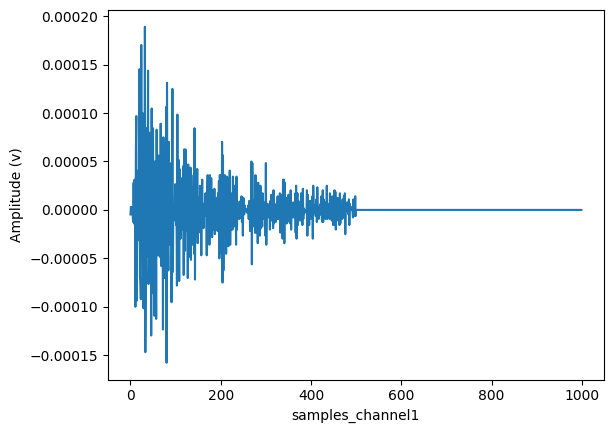

Tra: 100%|██████████| 228/228 [00:00<00:00, 5421.12it/s]


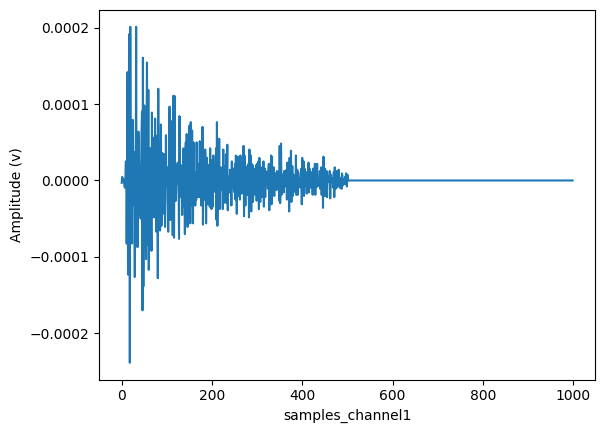

Tra: 100%|██████████| 228/228 [00:00<00:00, 8453.12it/s]


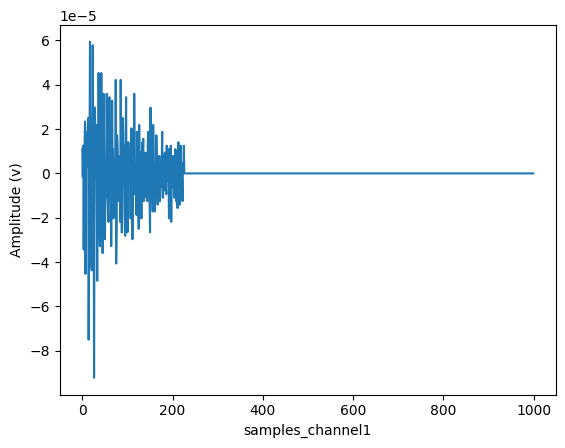

Tra: 100%|██████████| 228/228 [00:00<00:00, 7012.14it/s]


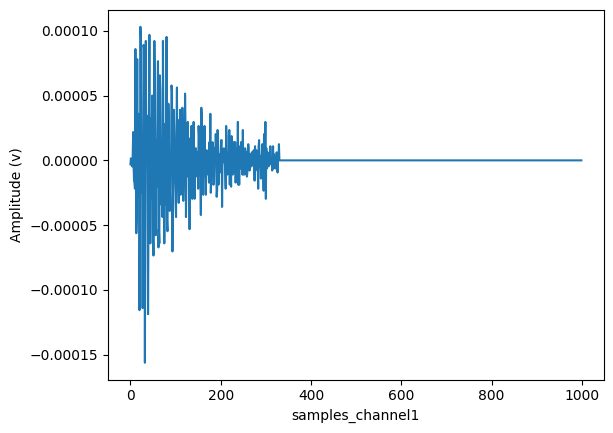

Tra: 100%|██████████| 228/228 [00:00<00:00, 15984.18it/s]


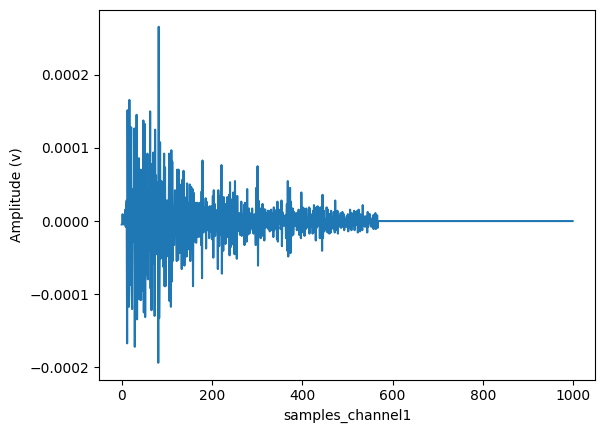

Tra: 100%|██████████| 228/228 [00:00<00:00, 8245.19it/s]


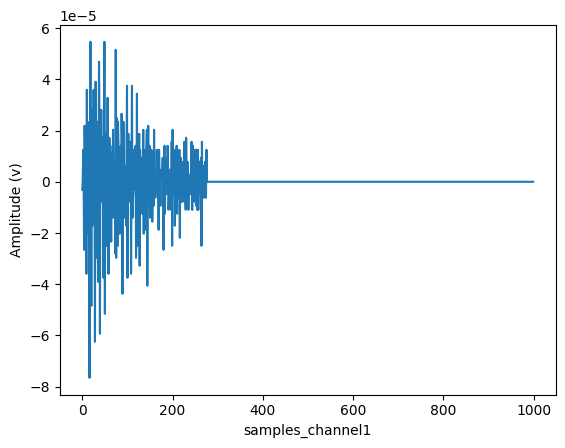

Tra: 100%|██████████| 228/228 [00:00<00:00, 14609.39it/s]


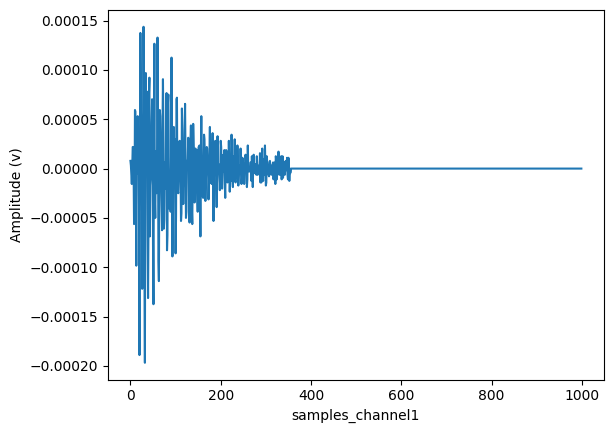

Tra: 100%|██████████| 228/228 [00:00<00:00, 4668.37it/s]


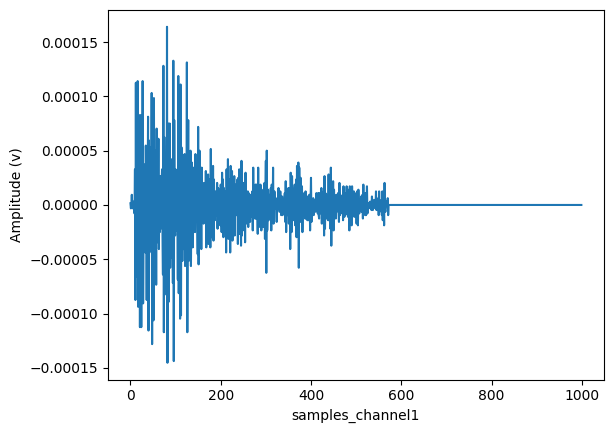

Tra: 100%|██████████| 228/228 [00:00<00:00, 8711.63it/s]


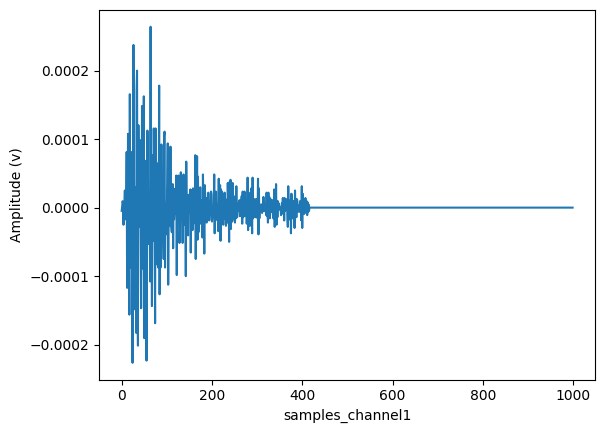

Tra: 100%|██████████| 228/228 [00:00<00:00, 7467.60it/s]


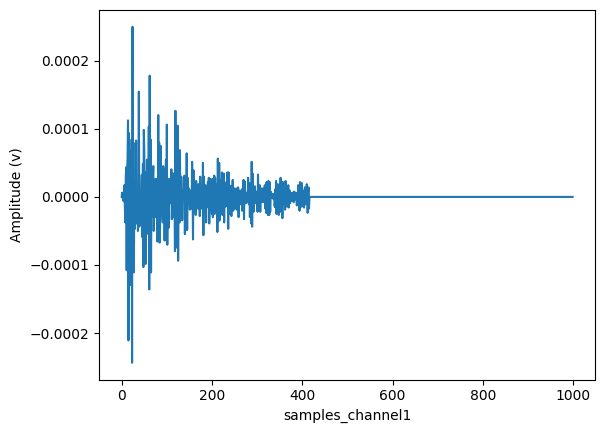

Tra: 100%|██████████| 228/228 [00:00<00:00, 10838.49it/s]


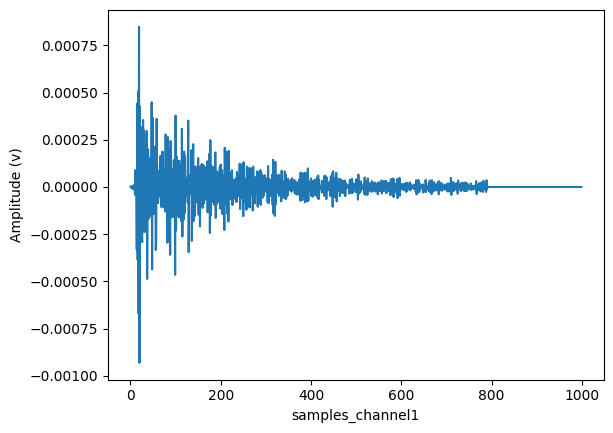

Tra: 100%|██████████| 228/228 [00:00<00:00, 14535.66it/s]


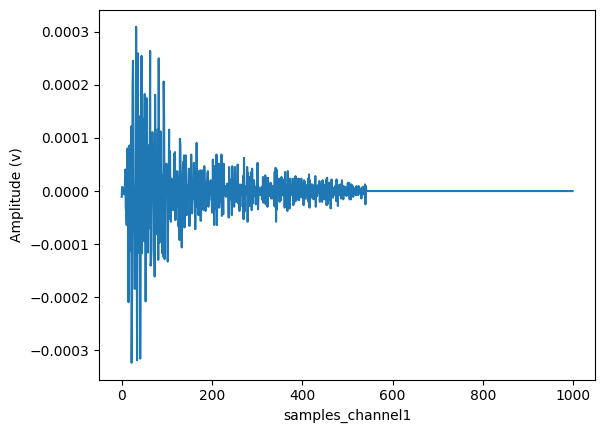

Tra: 100%|██████████| 228/228 [00:00<00:00, 8258.07it/s]


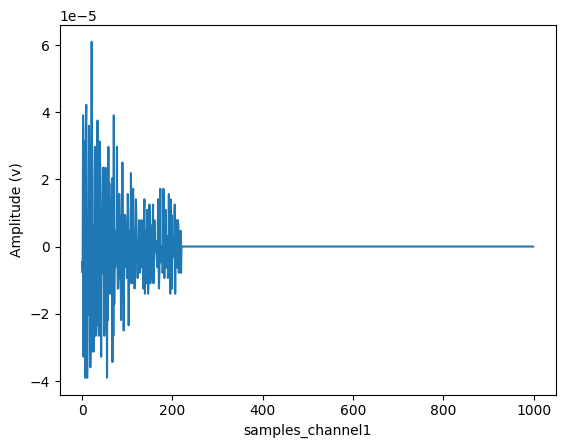

Tra: 100%|██████████| 228/228 [00:00<00:00, 10611.89it/s]


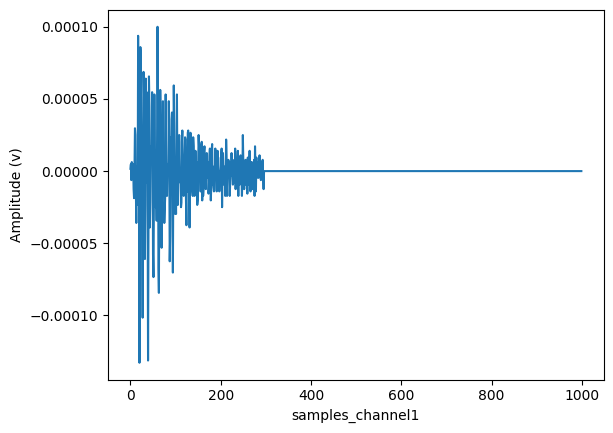

Tra: 100%|██████████| 228/228 [00:00<00:00, 9465.33it/s]


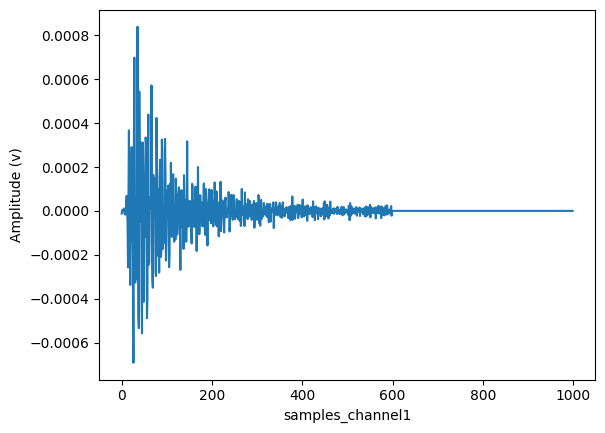

Tra: 100%|██████████| 228/228 [00:00<00:00, 8222.29it/s]


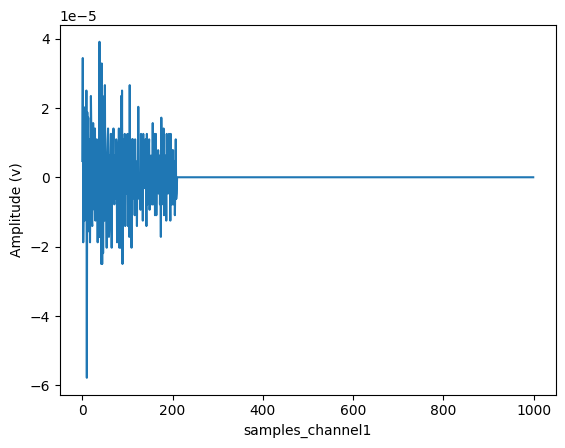

Tra: 100%|██████████| 228/228 [00:00<00:00, 9265.50it/s]


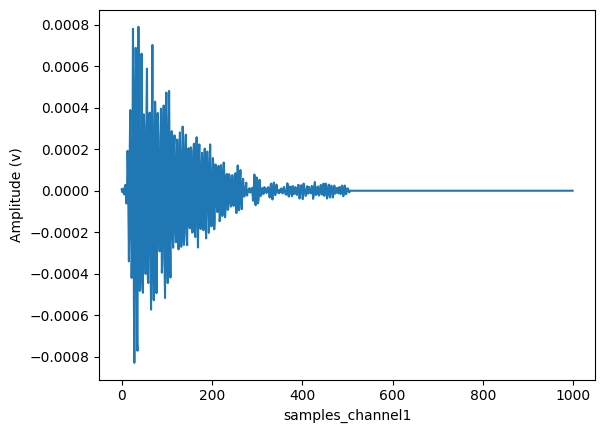

Tra: 100%|██████████| 228/228 [00:00<00:00, 6855.60it/s]


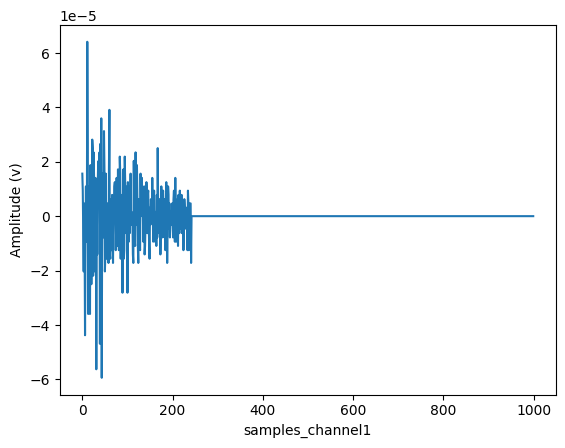

Tra: 100%|██████████| 228/228 [00:00<00:00, 8184.99it/s]


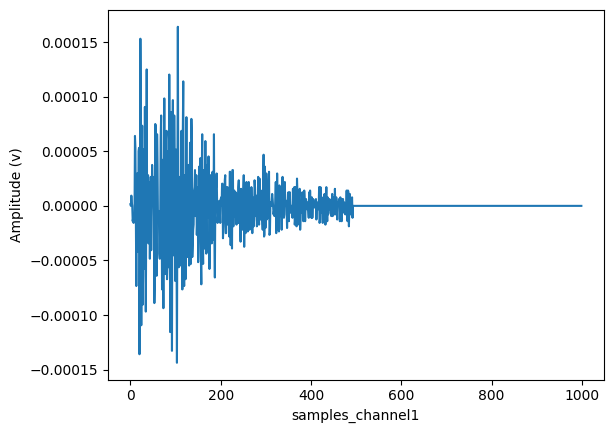

Tra: 100%|██████████| 228/228 [00:00<00:00, 13538.25it/s]


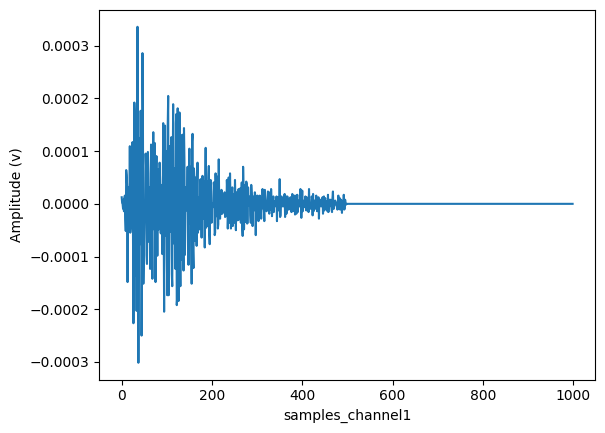

Tra: 100%|██████████| 228/228 [00:00<00:00, 15113.41it/s]


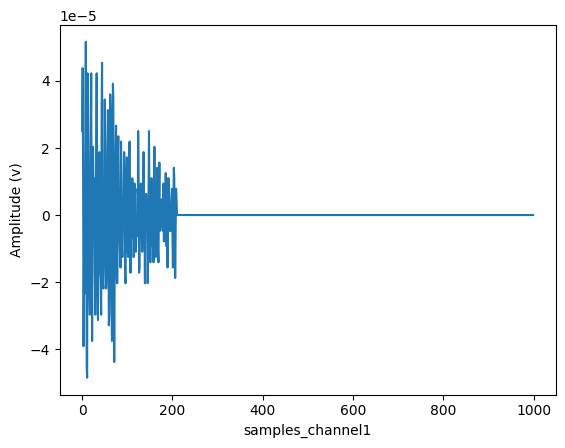

Tra: 100%|██████████| 228/228 [00:00<00:00, 8086.84it/s]


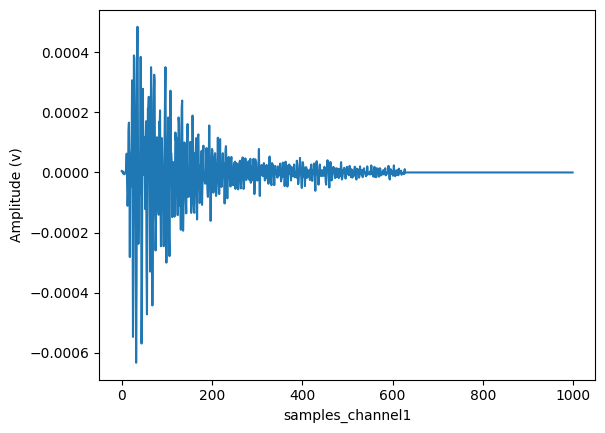

Tra: 100%|██████████| 228/228 [00:00<00:00, 8135.20it/s]


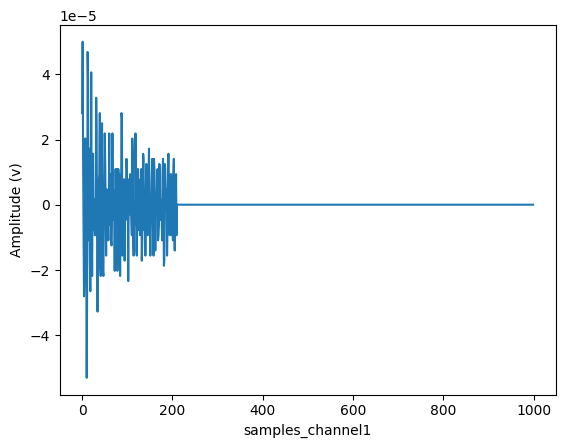

Tra: 100%|██████████| 228/228 [00:00<00:00, 9092.05it/s]


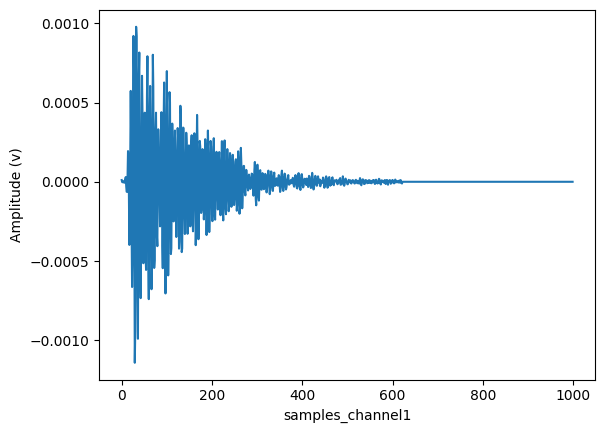

Tra: 100%|██████████| 228/228 [00:00<00:00, 7293.16it/s]


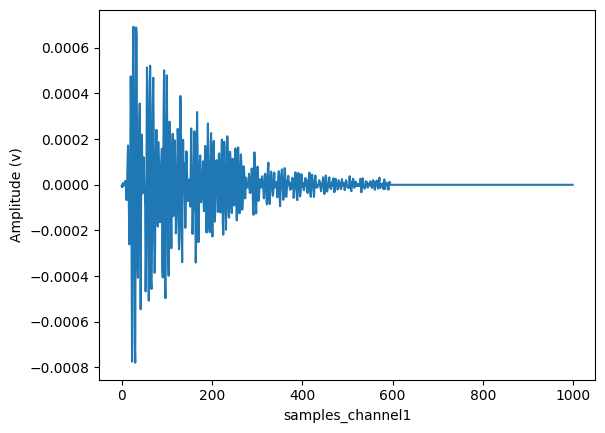

Tra: 100%|██████████| 228/228 [00:00<00:00, 8204.16it/s]


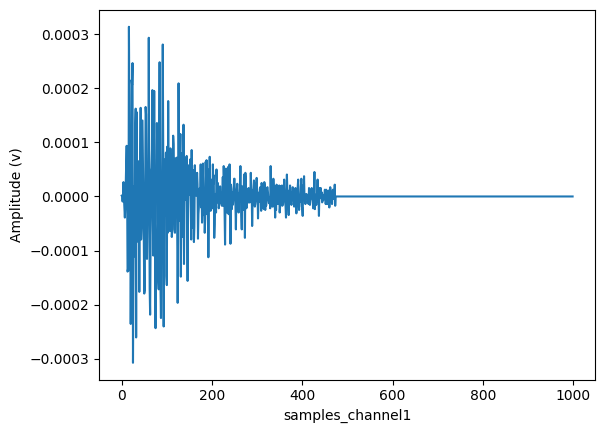

Tra: 100%|██████████| 228/228 [00:00<00:00, 10107.72it/s]


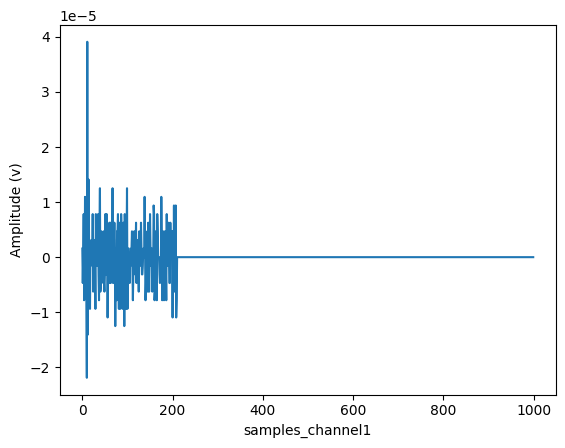

Tra: 100%|██████████| 228/228 [00:00<00:00, 12436.62it/s]


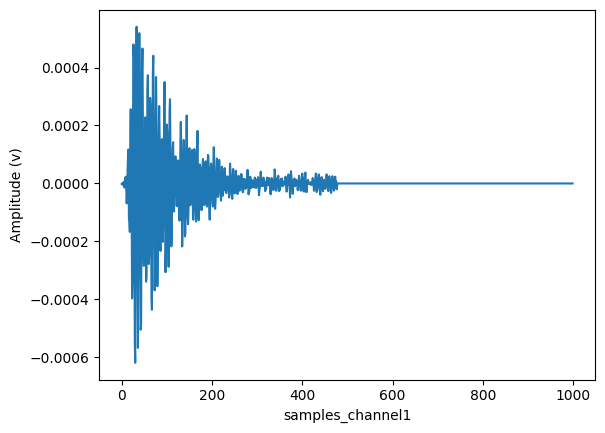

Tra: 100%|██████████| 228/228 [00:00<00:00, 10740.37it/s]


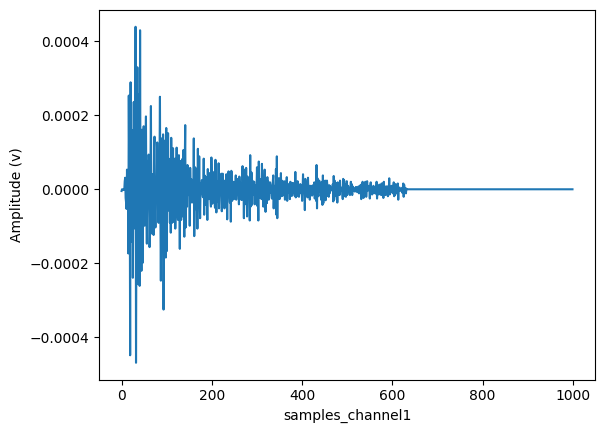

Tra: 100%|██████████| 228/228 [00:00<00:00, 7087.91it/s]


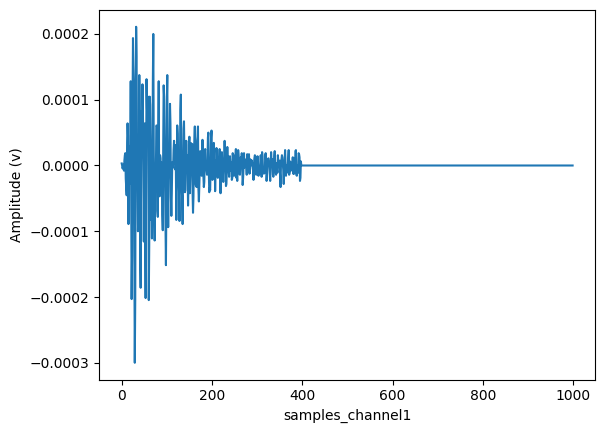

Tra: 100%|██████████| 228/228 [00:00<00:00, 8160.82it/s]


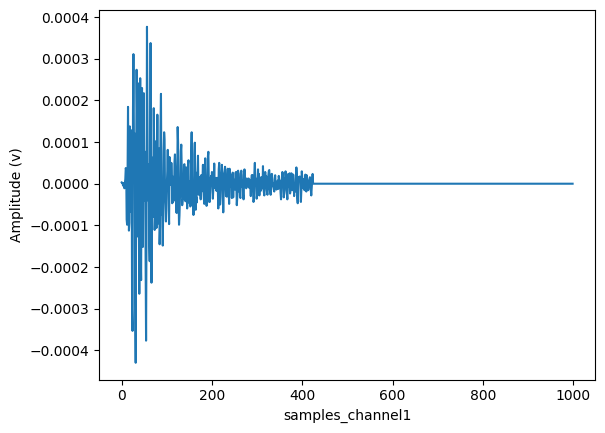

Tra: 100%|██████████| 228/228 [00:00<00:00, 9804.40it/s]


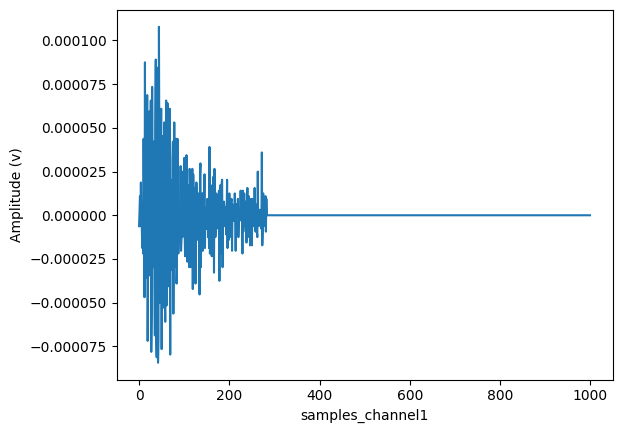

Tra: 100%|██████████| 228/228 [00:00<00:00, 18305.22it/s]


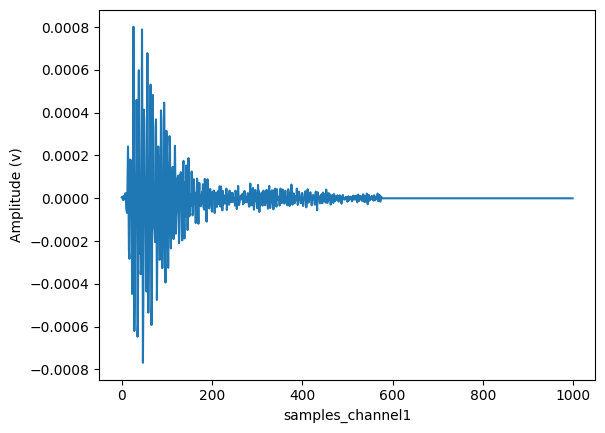

Tra: 100%|██████████| 228/228 [00:00<00:00, 8408.38it/s]


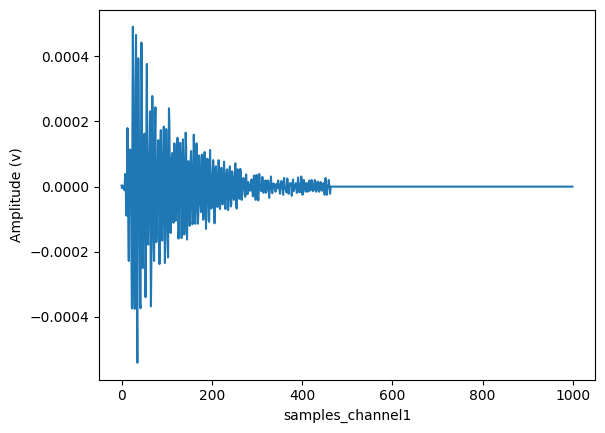

Tra: 100%|██████████| 228/228 [00:00<00:00, 6678.31it/s]


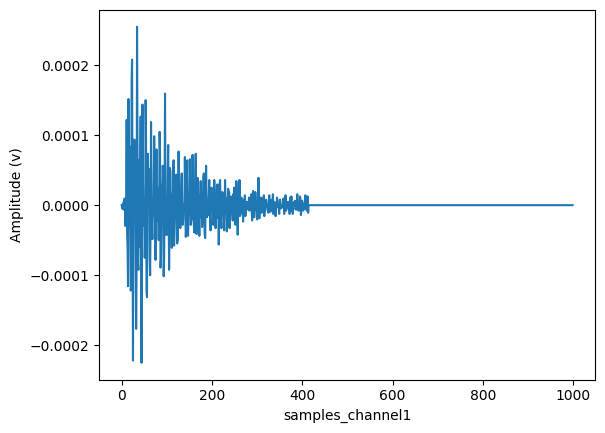

Tra: 100%|██████████| 228/228 [00:00<00:00, 14531.91it/s]


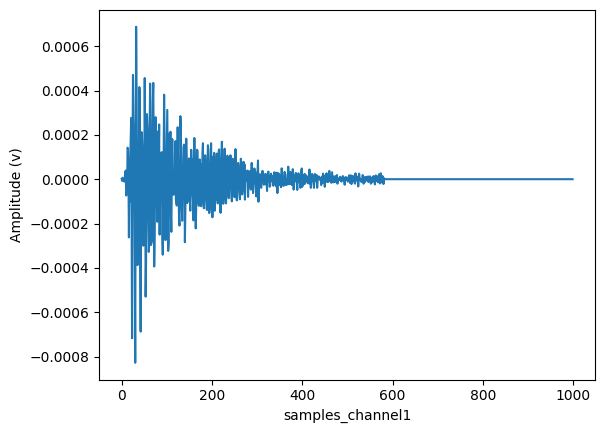

Tra: 100%|██████████| 228/228 [00:00<00:00, 7563.94it/s]


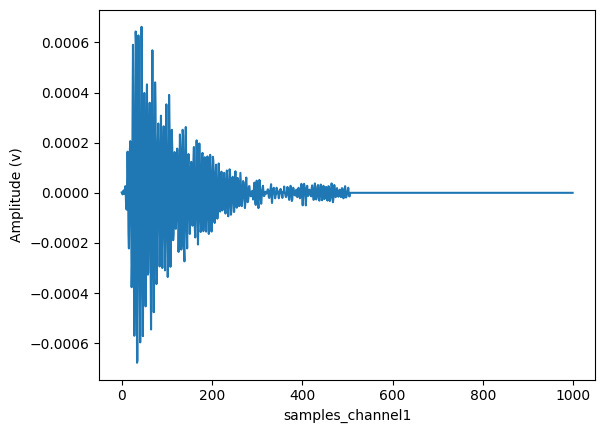

Tra: 100%|██████████| 228/228 [00:00<00:00, 9967.49it/s]


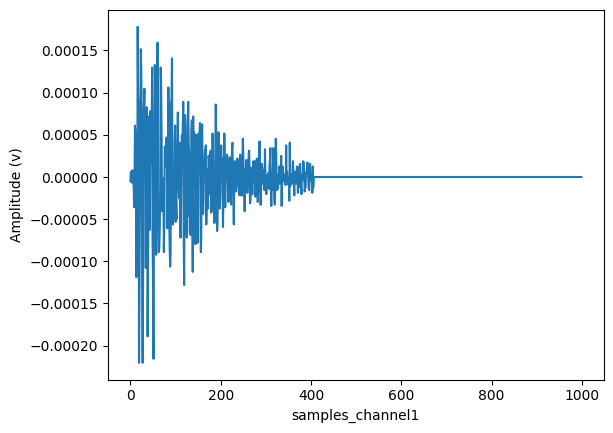

Tra: 100%|██████████| 228/228 [00:00<00:00, 8474.77it/s]


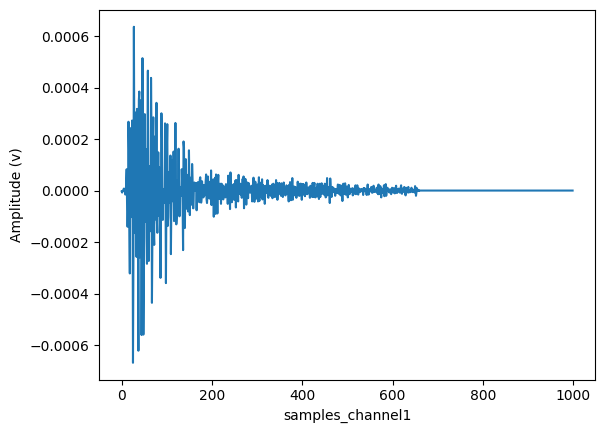

Tra: 100%|██████████| 228/228 [00:00<00:00, 23812.88it/s]


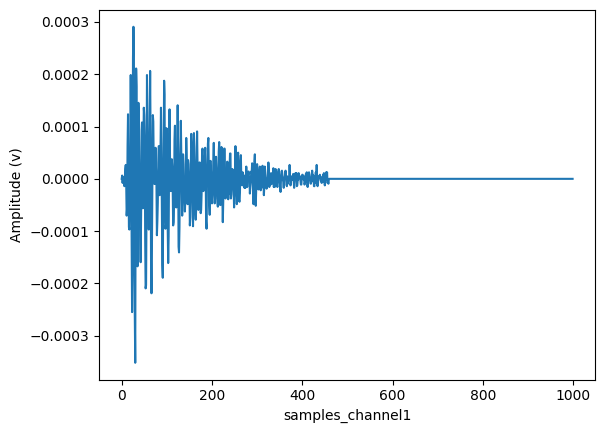

Tra: 100%|██████████| 228/228 [00:00<00:00, 7182.78it/s]


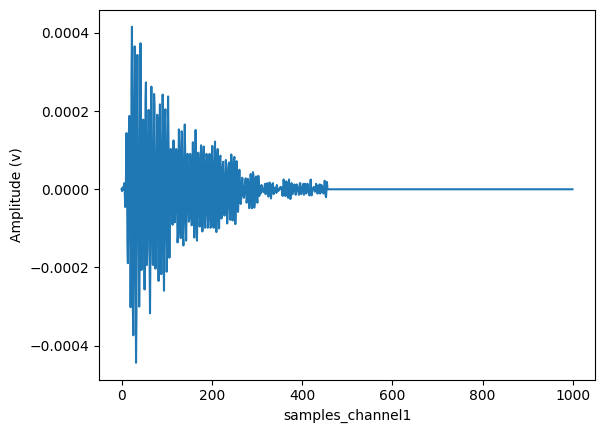

Tra: 100%|██████████| 228/228 [00:00<00:00, 6625.06it/s]


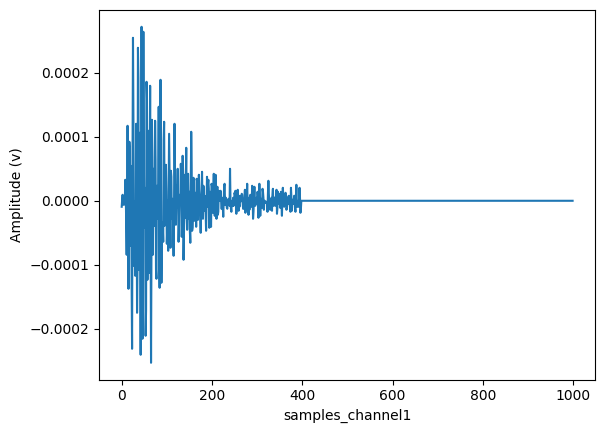

Tra: 100%|██████████| 228/228 [00:00<00:00, 7281.00it/s]


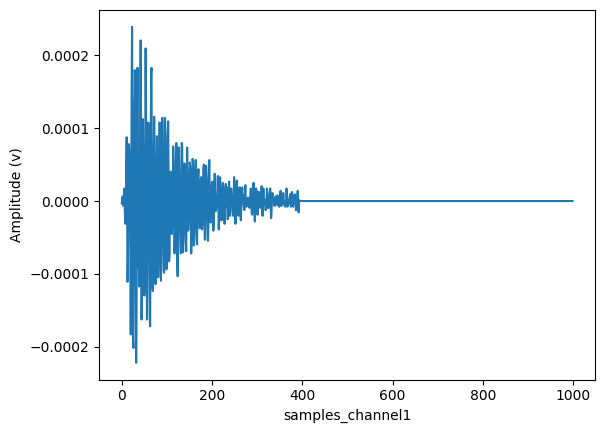

Tra: 100%|██████████| 228/228 [00:00<00:00, 6609.08it/s]


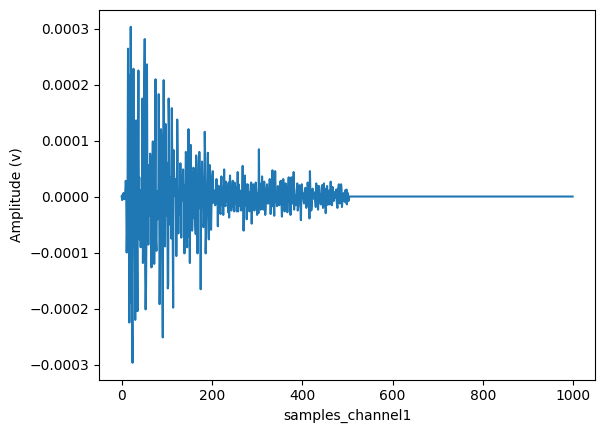

Tra: 100%|██████████| 228/228 [00:00<00:00, 14542.07it/s]


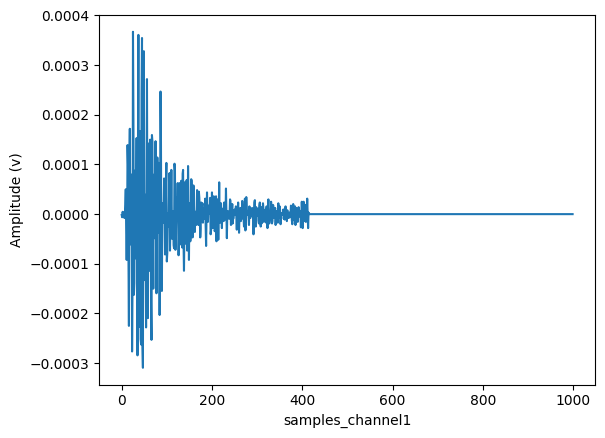

Tra: 100%|██████████| 228/228 [00:00<00:00, 14545.83it/s]


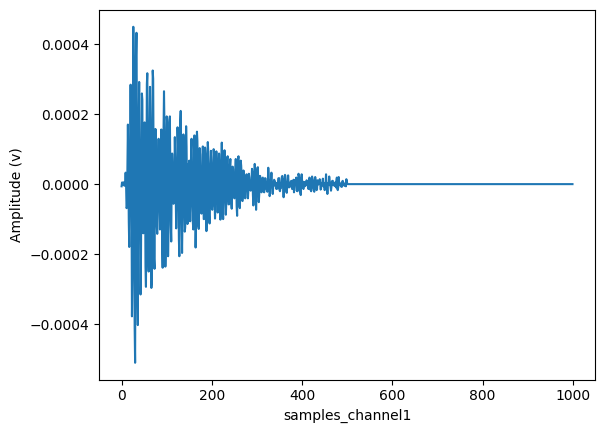

Tra: 100%|██████████| 228/228 [00:00<00:00, 10975.69it/s]


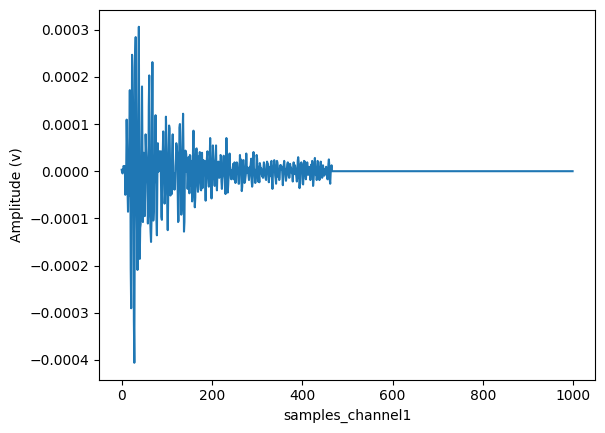

Tra: 100%|██████████| 228/228 [00:00<00:00, 8329.79it/s]


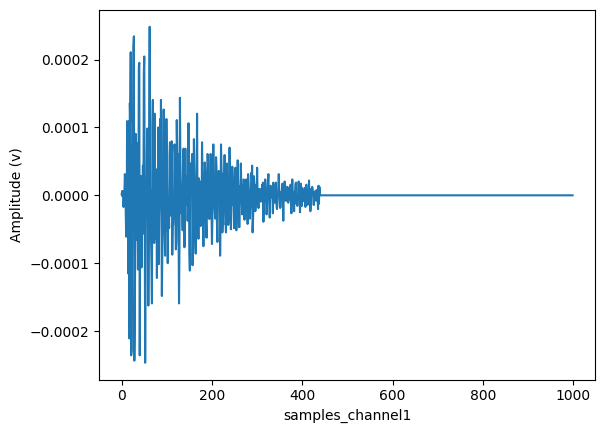

Tra: 100%|██████████| 228/228 [00:00<00:00, 7848.12it/s]


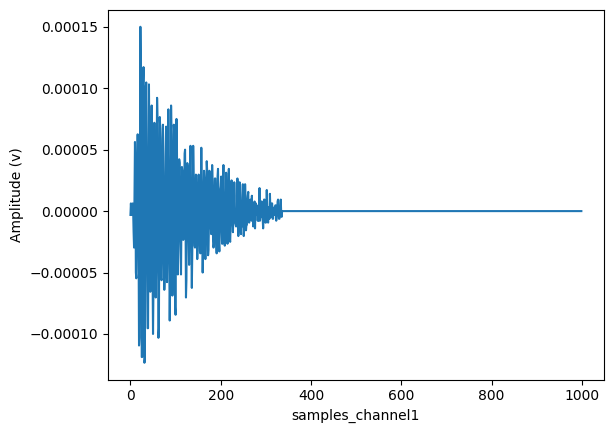

Tra: 100%|██████████| 228/228 [00:00<00:00, 7650.47it/s]


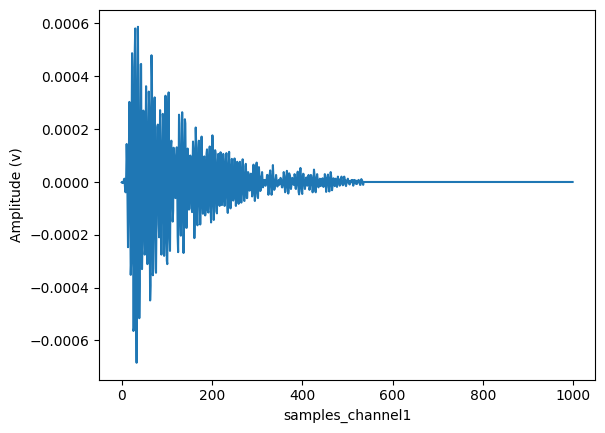

Tra: 100%|██████████| 228/228 [00:00<00:00, 13984.08it/s]


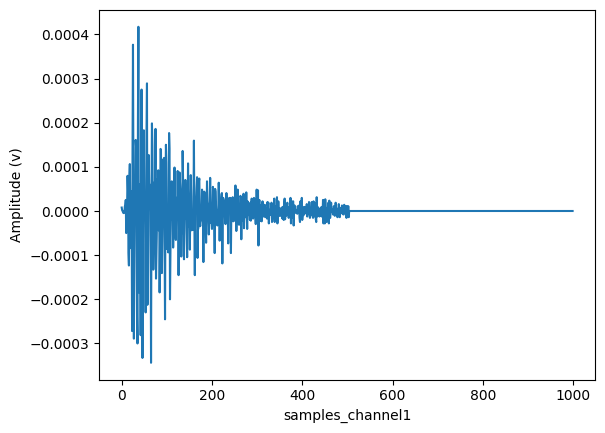

Tra: 100%|██████████| 228/228 [00:00<00:00, 13967.94it/s]


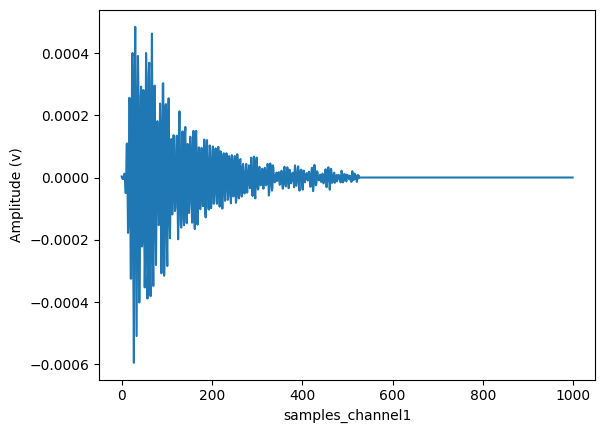

Tra: 100%|██████████| 228/228 [00:00<00:00, 7524.01it/s]


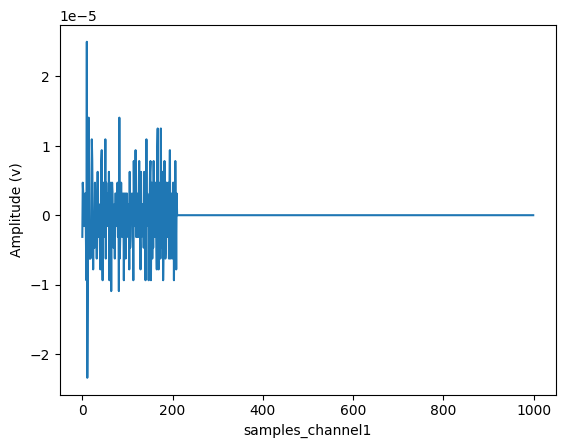

Tra: 100%|██████████| 228/228 [00:00<00:00, 9413.53it/s]


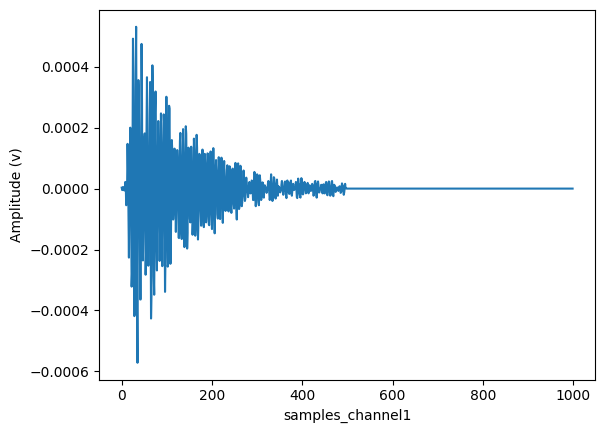

Tra: 100%|██████████| 228/228 [00:00<00:00, 14538.54it/s]


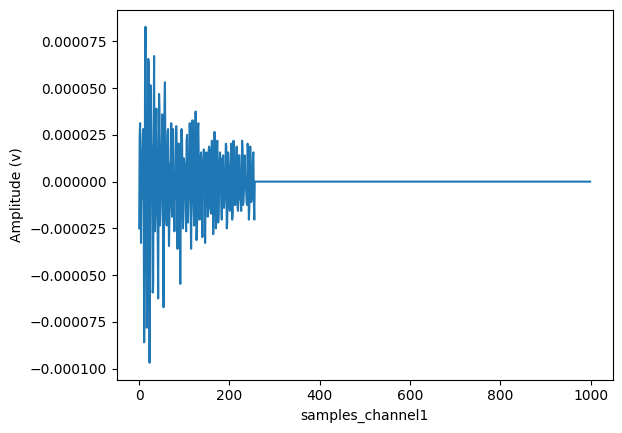

Tra: 100%|██████████| 228/228 [00:00<00:00, 14590.89it/s]


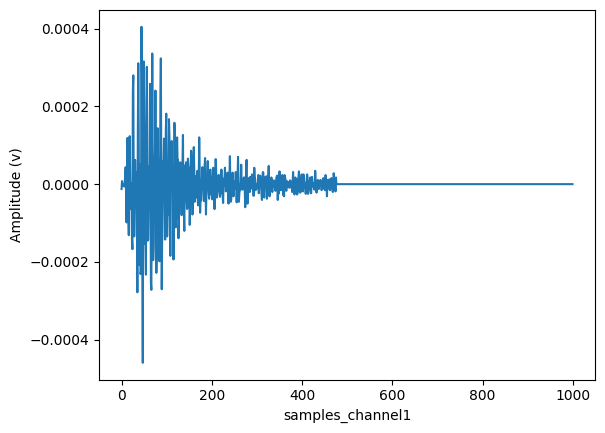

Tra: 100%|██████████| 228/228 [00:00<00:00, 7552.11it/s]


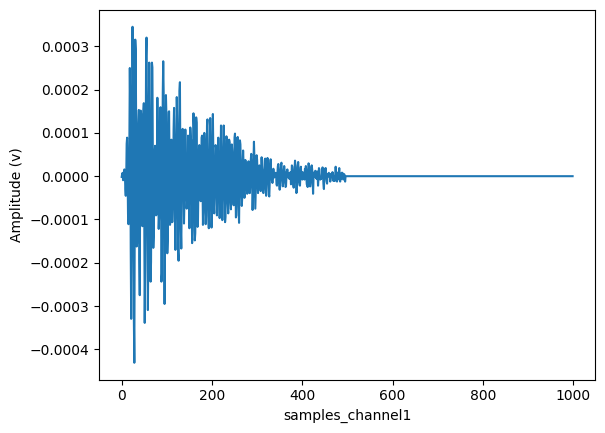

Tra: 100%|██████████| 228/228 [00:00<00:00, 14586.44it/s]


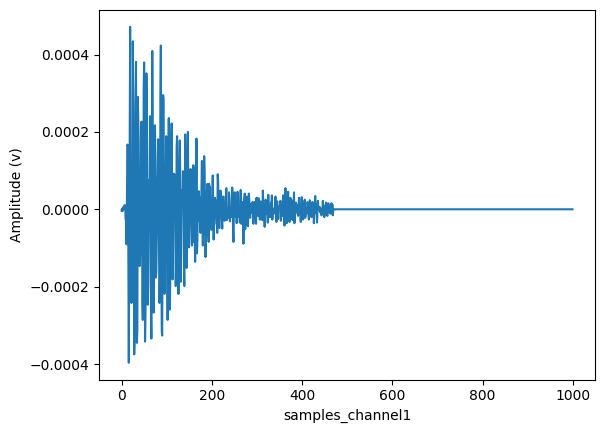

Tra: 100%|██████████| 228/228 [00:00<00:00, 7565.67it/s]


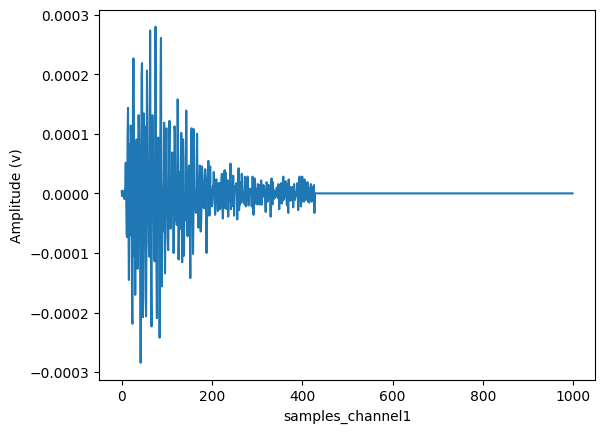

Tra: 100%|██████████| 228/228 [00:00<00:00, 7536.04it/s]


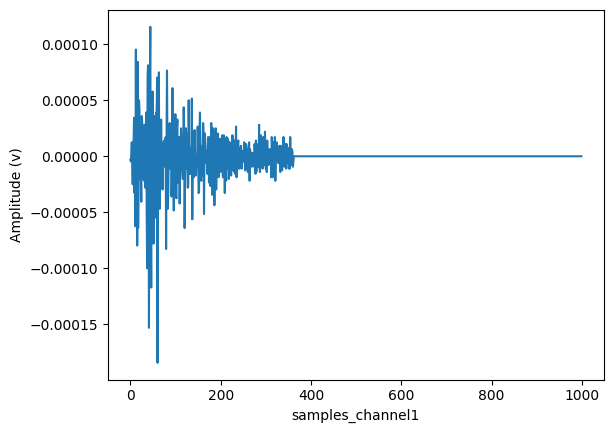

Tra: 100%|██████████| 228/228 [00:00<00:00, 15193.61it/s]


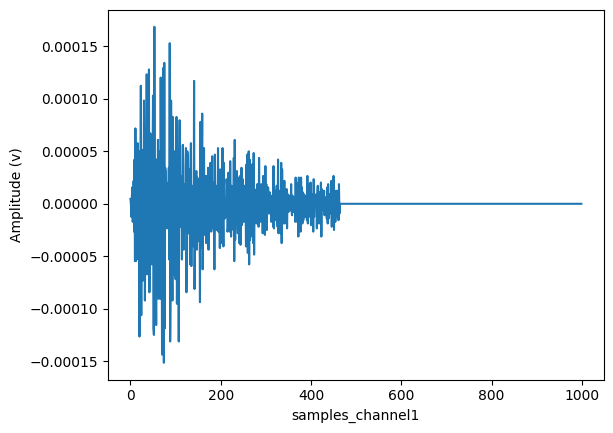

Tra: 100%|██████████| 228/228 [00:00<00:00, 9255.63it/s]


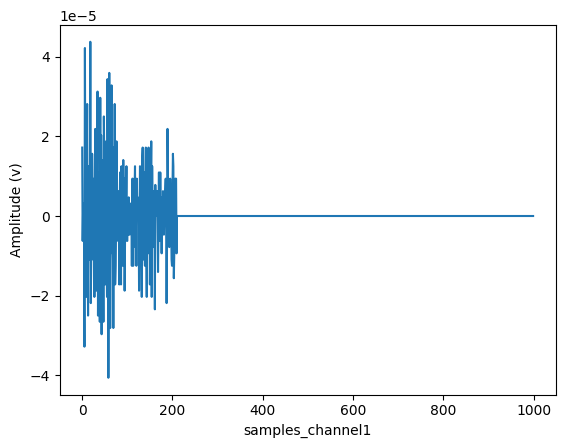

Tra: 100%|██████████| 228/228 [00:00<00:00, 10788.11it/s]


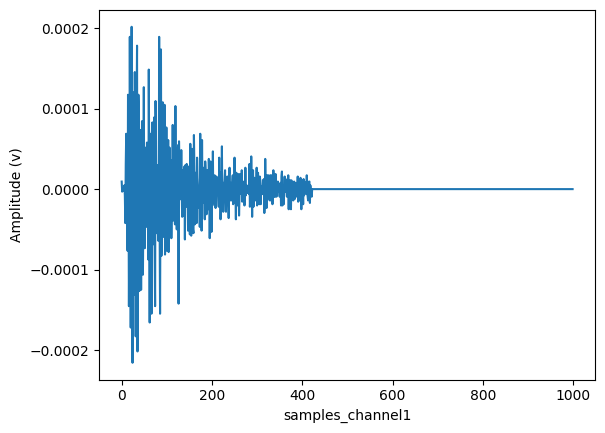

Tra: 100%|██████████| 228/228 [00:00<00:00, 14618.77it/s]


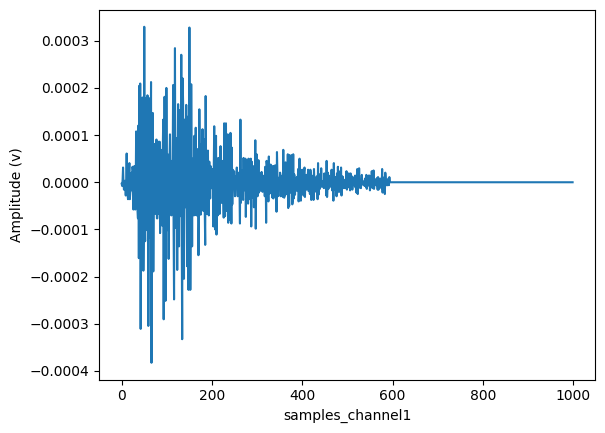

Tra: 100%|██████████| 228/228 [00:00<00:00, 8382.36it/s]


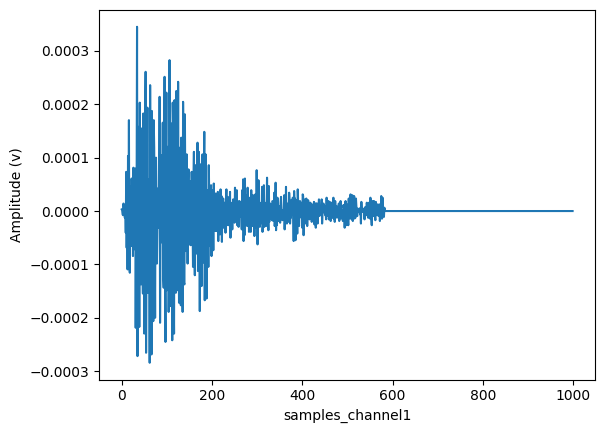

Tra: 100%|██████████| 228/228 [00:00<00:00, 14587.99it/s]


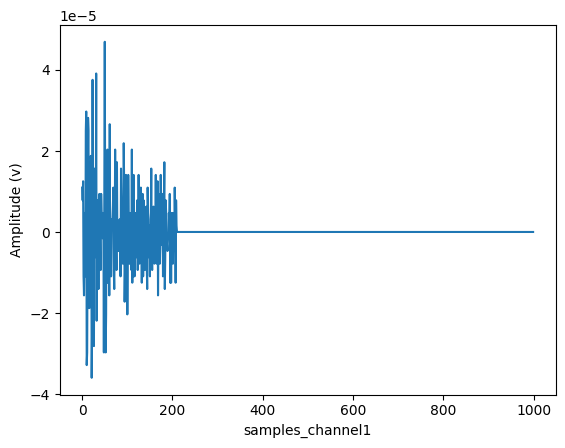

Tra: 100%|██████████| 228/228 [00:00<00:00, 8003.53it/s]


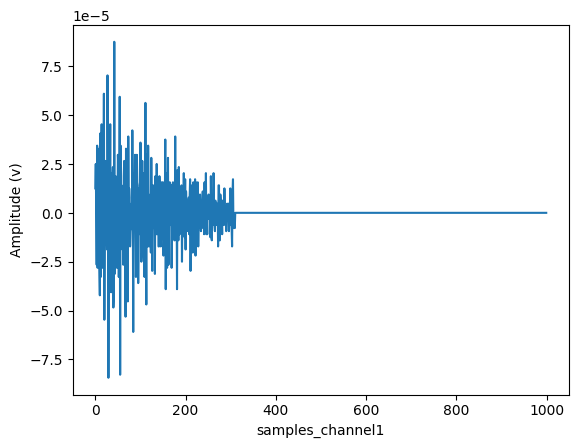

Tra: 100%|██████████| 228/228 [00:00<00:00, 8721.95it/s]


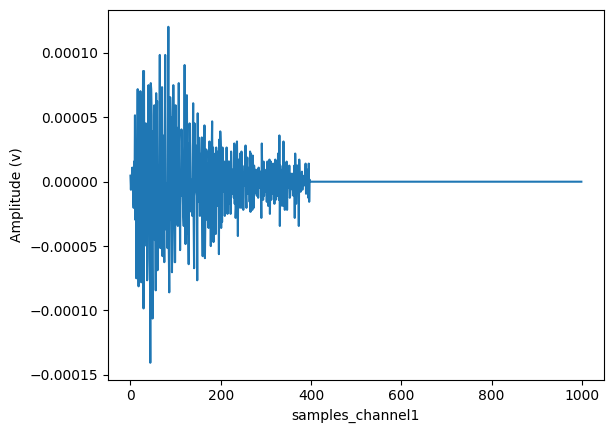

Tra: 100%|██████████| 228/228 [00:00<00:00, 14589.33it/s]


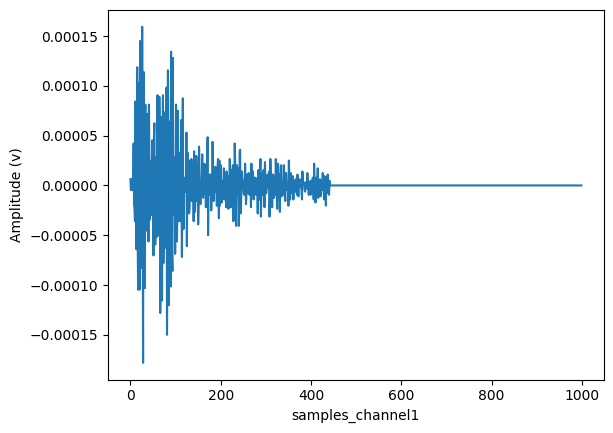

Tra: 100%|██████████| 228/228 [00:00<00:00, 7558.08it/s]


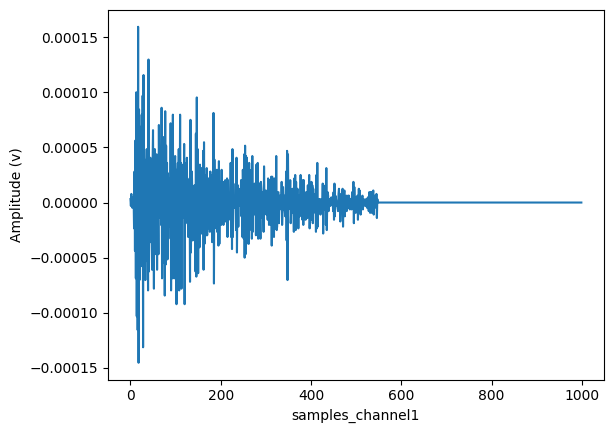

Tra: 100%|██████████| 228/228 [00:00<00:00, 16367.74it/s]


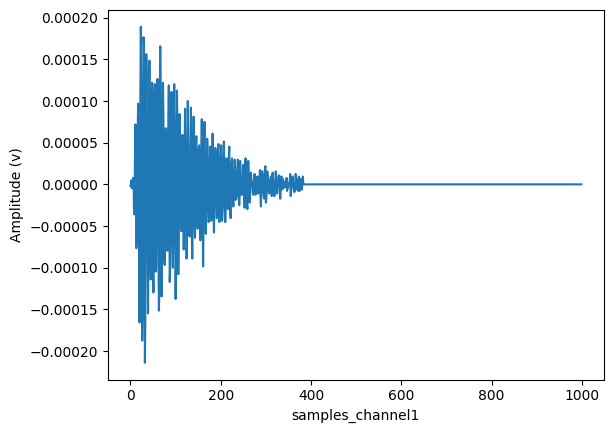

Tra: 100%|██████████| 228/228 [00:00<00:00, 14563.33it/s]


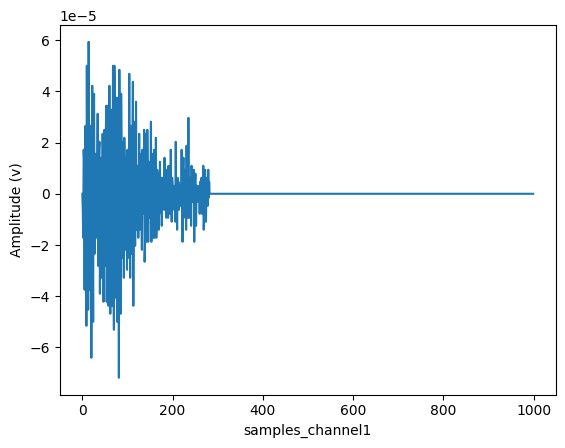

Tra: 100%|██████████| 228/228 [00:00<00:00, 7027.49it/s]


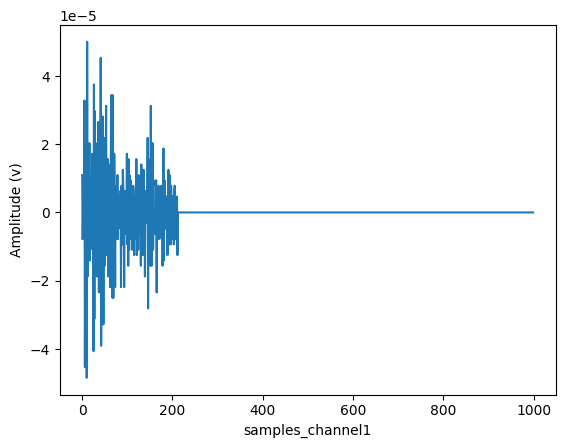

Tra: 100%|██████████| 228/228 [00:00<00:00, 7262.64it/s]


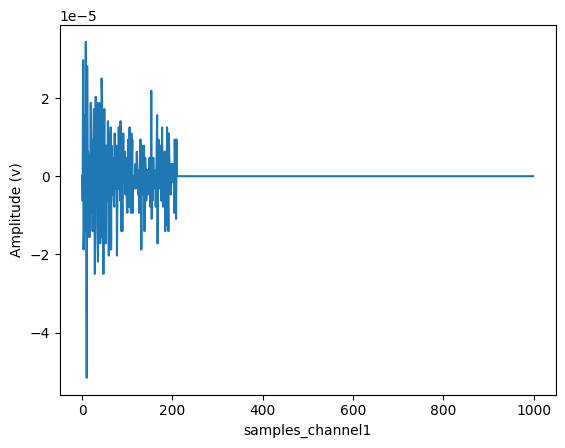

Tra: 100%|██████████| 228/228 [00:00<00:00, 14703.51it/s]


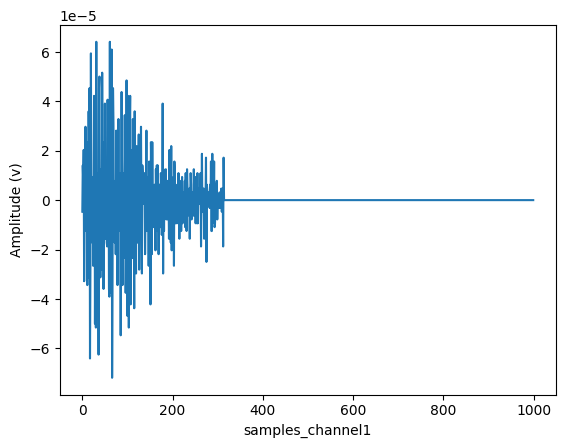

Tra: 100%|██████████| 228/228 [00:00<00:00, 10330.13it/s]


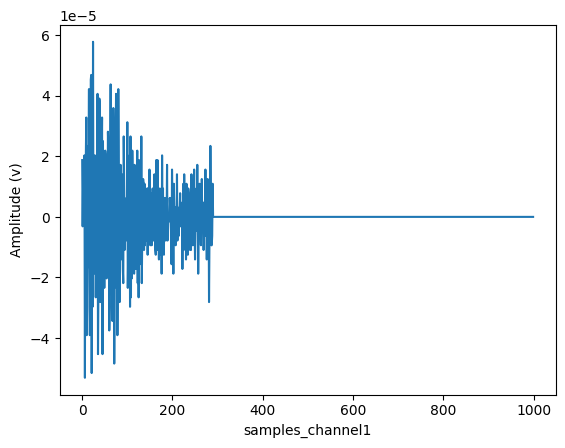

Tra: 100%|██████████| 228/228 [00:00<00:00, 7566.75it/s]


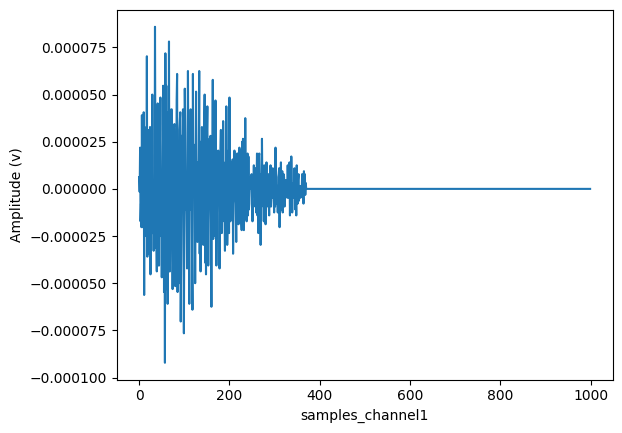

Tra: 100%|██████████| 228/228 [00:00<00:00, 19816.02it/s]


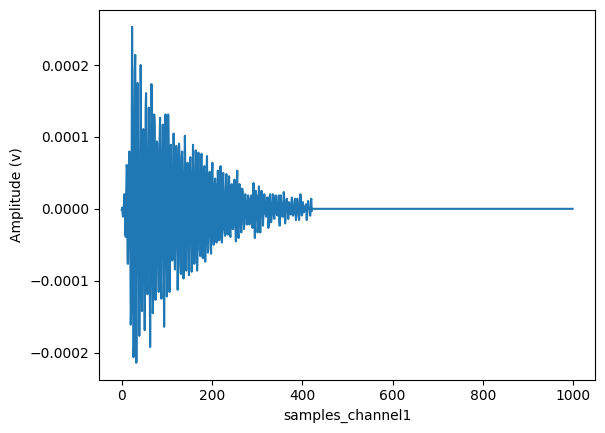

Tra: 100%|██████████| 228/228 [00:00<00:00, 7158.43it/s]


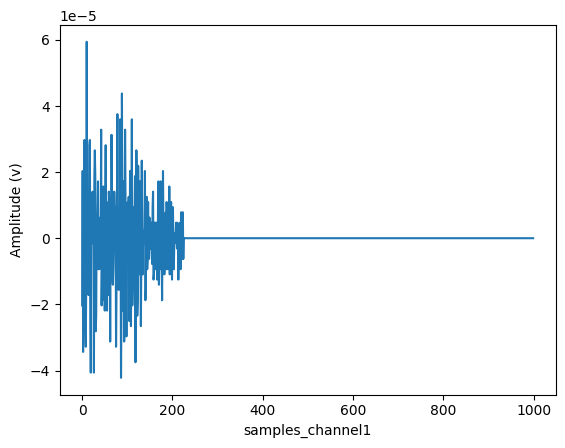

Tra: 100%|██████████| 228/228 [00:00<00:00, 27719.68it/s]


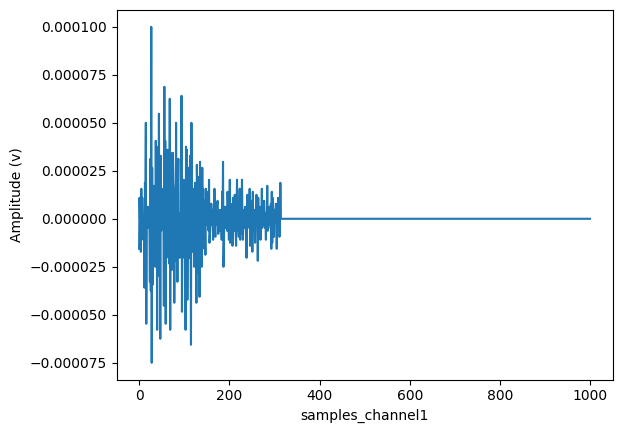

Tra: 100%|██████████| 228/228 [00:00<00:00, 14529.92it/s]


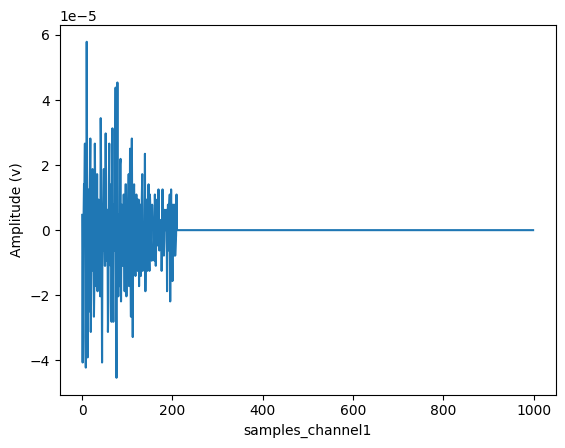

Tra: 100%|██████████| 228/228 [00:00<00:00, 7441.28it/s]


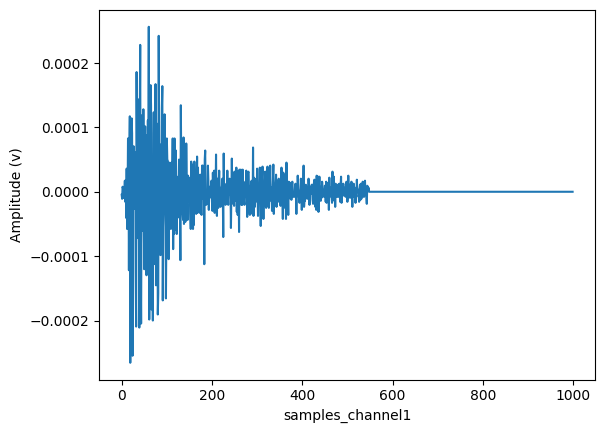

Tra: 100%|██████████| 228/228 [00:00<00:00, 7284.66it/s]


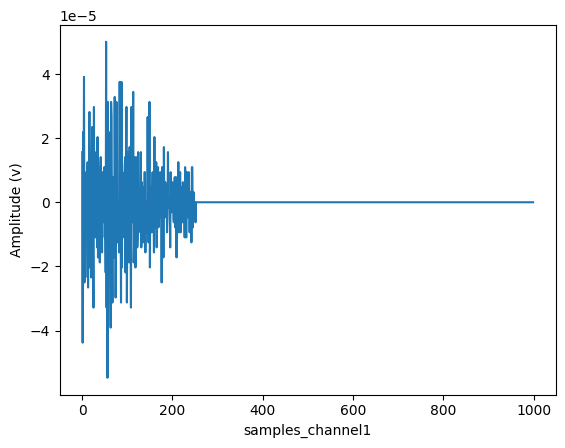

Tra: 100%|██████████| 228/228 [00:00<00:00, 15688.90it/s]


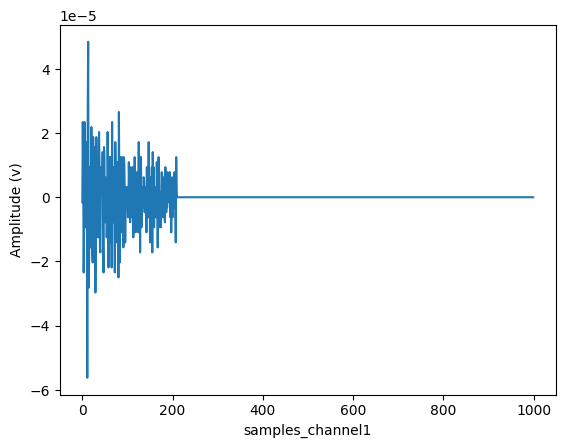

Tra: 100%|██████████| 228/228 [00:00<00:00, 14182.13it/s]


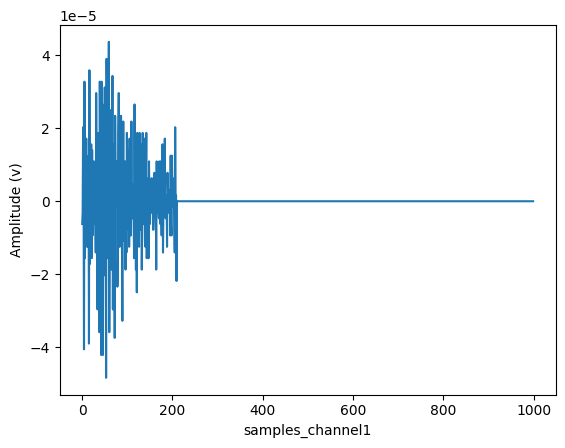

Tra: 100%|██████████| 228/228 [00:00<00:00, 7160.46it/s]


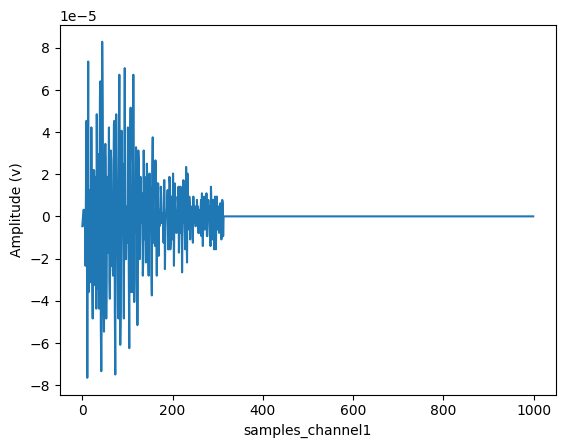

Tra: 100%|██████████| 228/228 [00:00<00:00, 7220.15it/s]


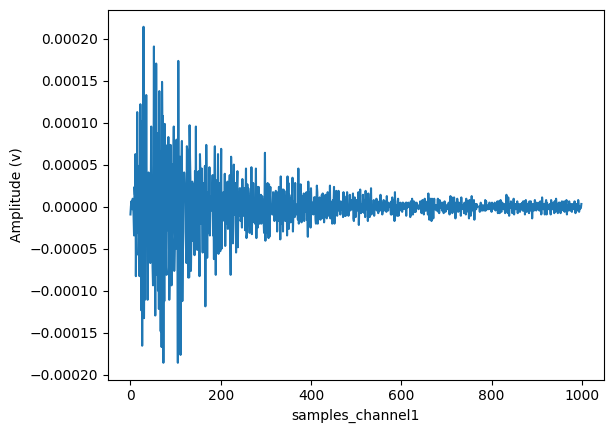

Tra: 100%|██████████| 228/228 [00:00<00:00, 9257.07it/s]


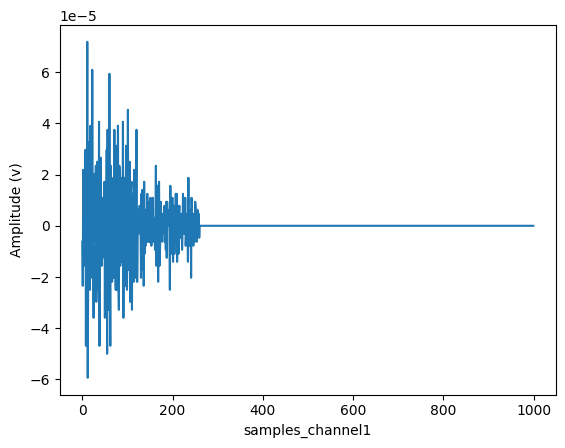

Tra: 100%|██████████| 228/228 [00:00<00:00, 11411.98it/s]


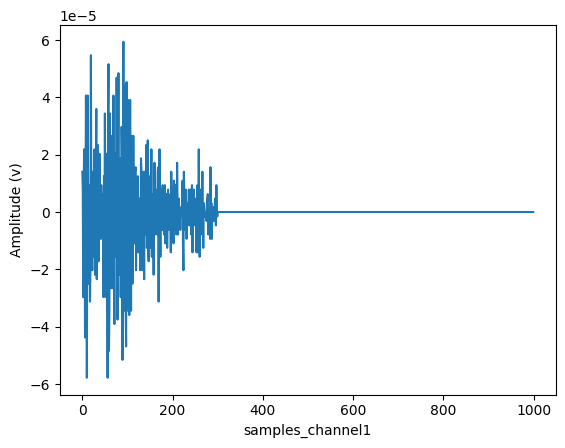

Tra: 100%|██████████| 228/228 [00:00<00:00, 10760.92it/s]


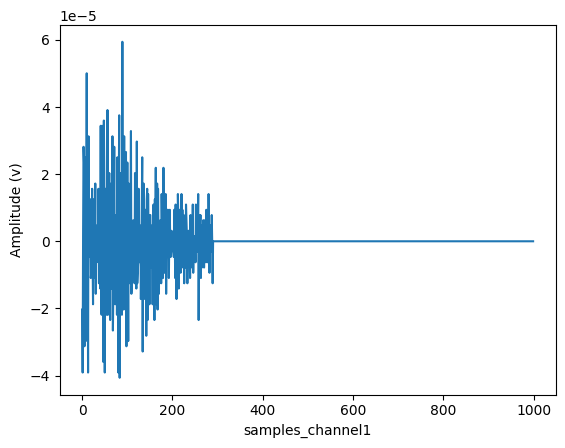

Tra: 100%|██████████| 228/228 [00:00<00:00, 4752.75it/s]


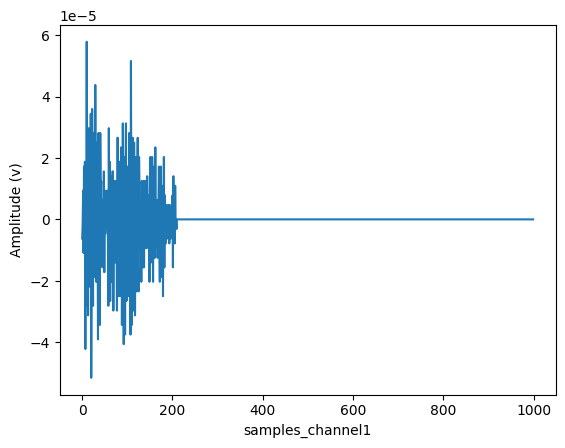

Tra: 100%|██████████| 228/228 [00:00<00:00, 5684.42it/s]


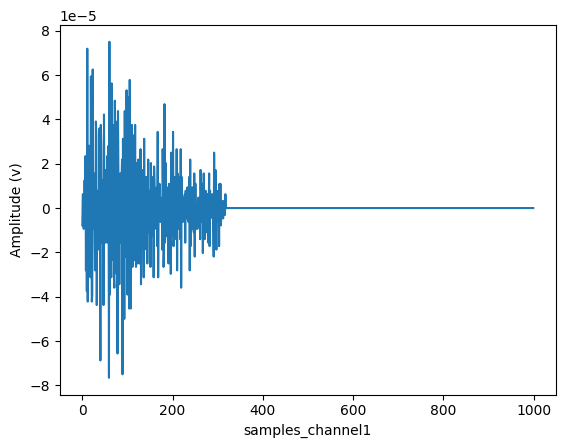

Tra: 100%|██████████| 228/228 [00:00<00:00, 14117.02it/s]


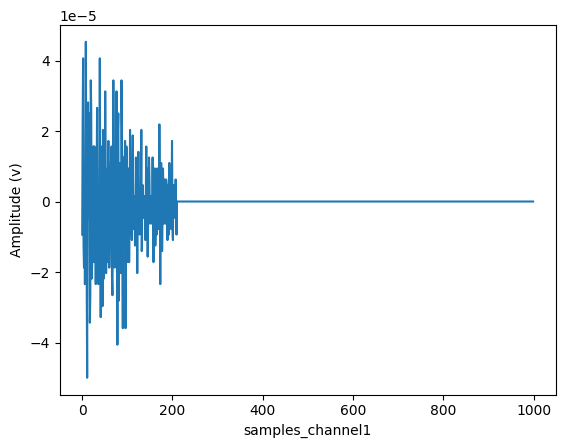

Tra: 100%|██████████| 228/228 [00:00<00:00, 14594.67it/s]


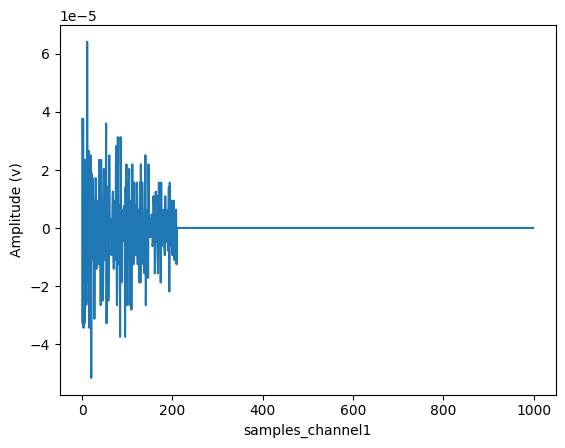

Tra: 100%|██████████| 228/228 [00:00<00:00, 13941.67it/s]


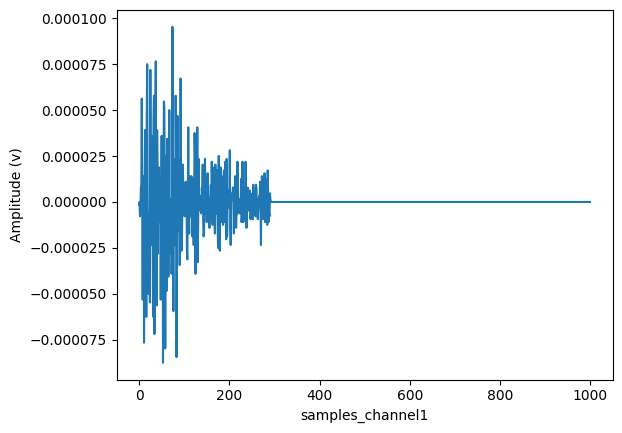

Tra: 100%|██████████| 228/228 [00:00<00:00, 9880.27it/s]


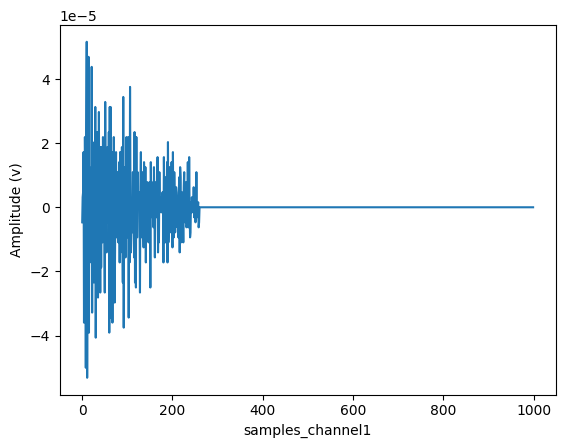

Tra: 100%|██████████| 228/228 [00:00<00:00, 9921.68it/s]


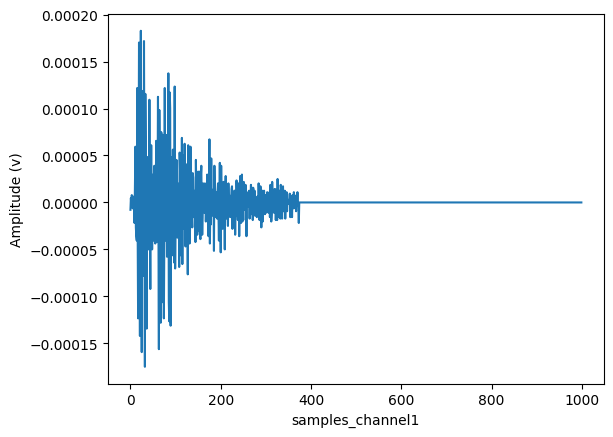

Tra: 100%|██████████| 228/228 [00:00<00:00, 5868.03it/s]


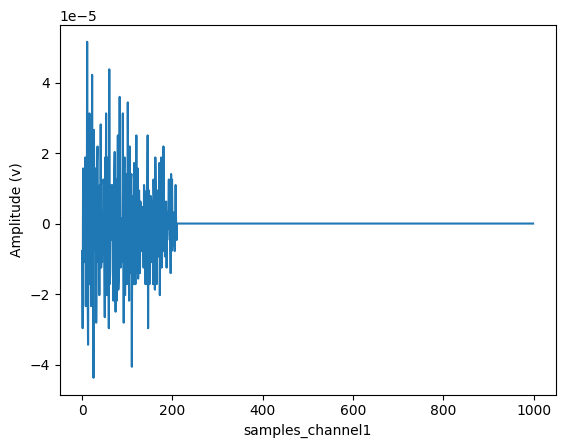

Tra: 100%|██████████| 228/228 [00:00<00:00, 14120.98it/s]


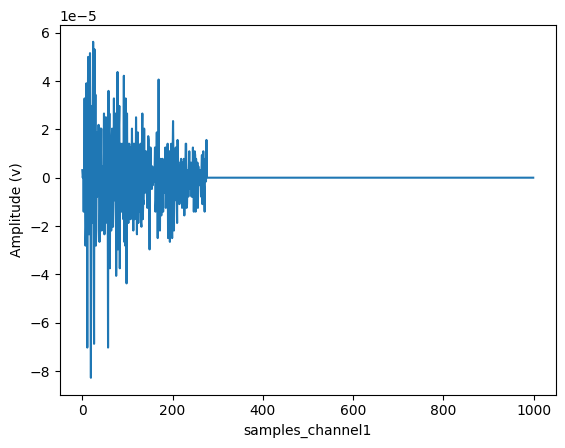

Tra: 100%|██████████| 228/228 [00:00<00:00, 18101.14it/s]


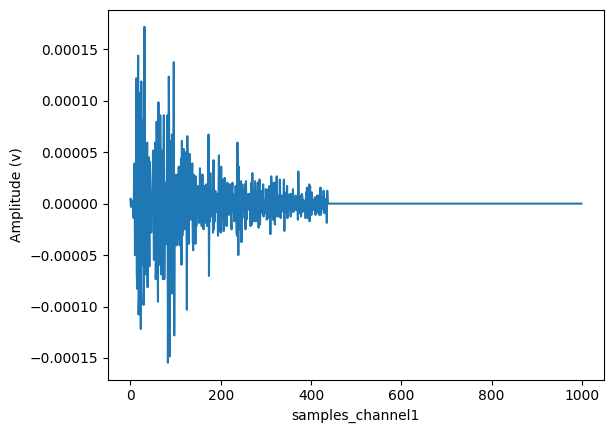

Tra: 100%|██████████| 228/228 [00:00<00:00, 7415.55it/s]


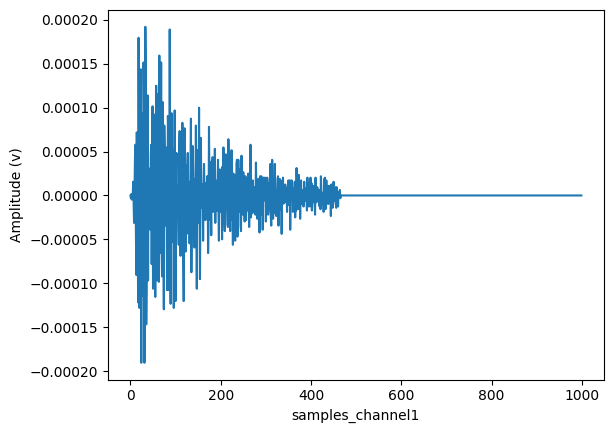

Tra: 100%|██████████| 228/228 [00:00<00:00, 14180.45it/s]


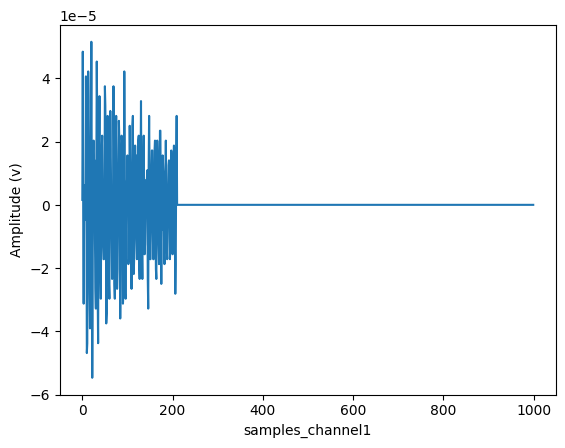

Tra: 100%|██████████| 228/228 [00:00<00:00, 8128.43it/s]


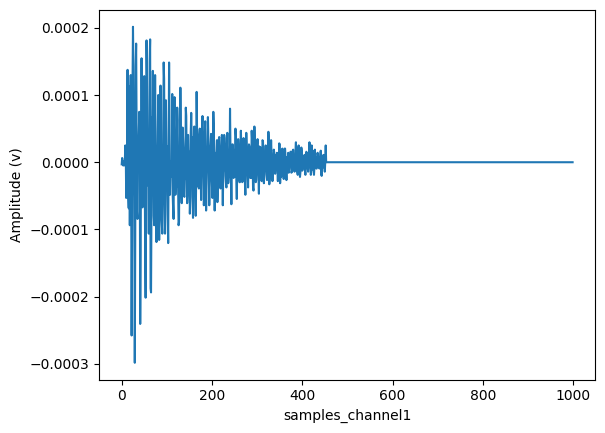

Tra: 100%|██████████| 228/228 [00:00<00:00, 13494.31it/s]


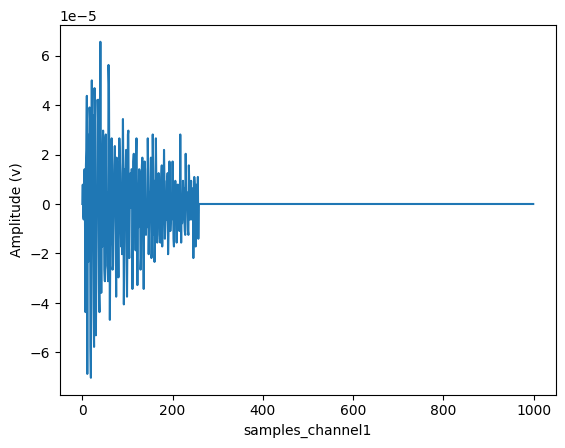

Tra: 100%|██████████| 228/228 [00:00<00:00, 10277.39it/s]


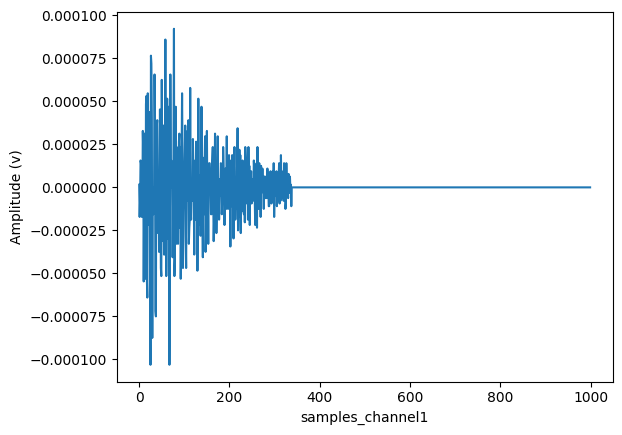

Tra: 100%|██████████| 228/228 [00:00<00:00, 7282.39it/s]


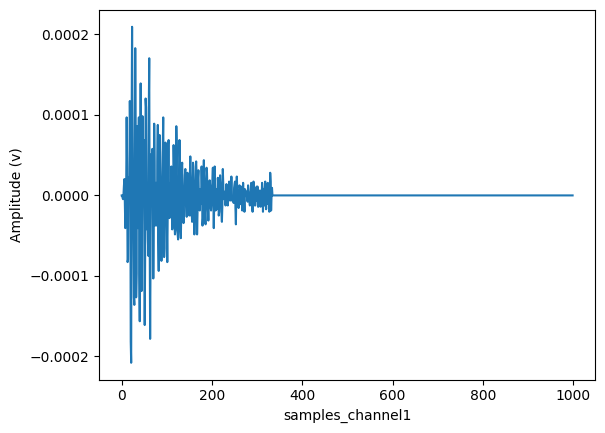

Tra: 100%|██████████| 228/228 [00:00<00:00, 14600.24it/s]


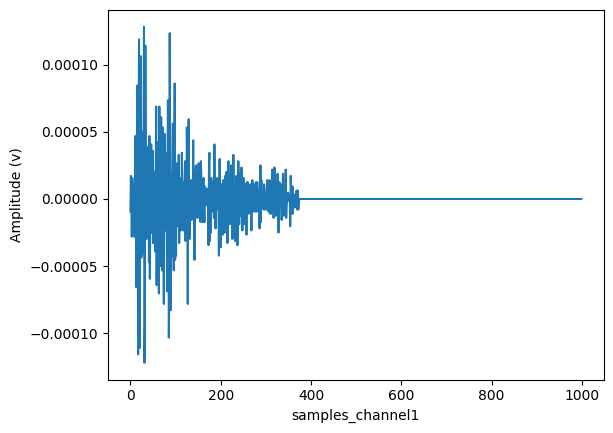

Tra: 100%|██████████| 228/228 [00:00<00:00, 9047.32it/s]


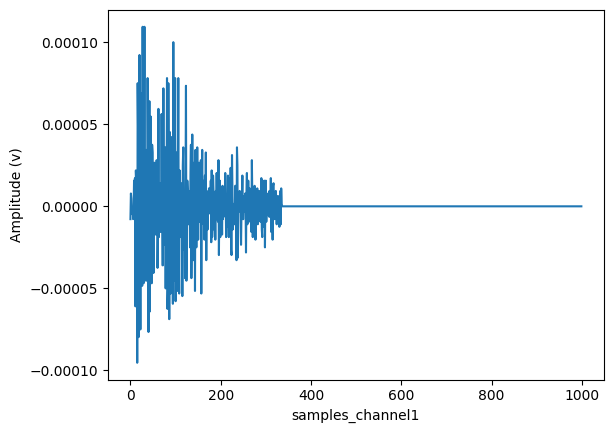

Tra: 100%|██████████| 228/228 [00:00<00:00, 6229.94it/s]


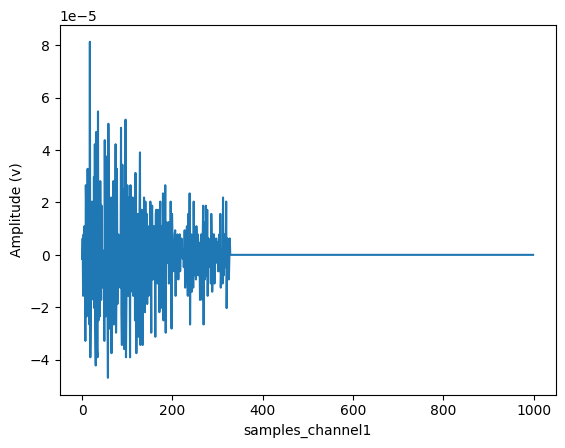

Tra: 100%|██████████| 228/228 [00:00<00:00, 7071.61it/s]


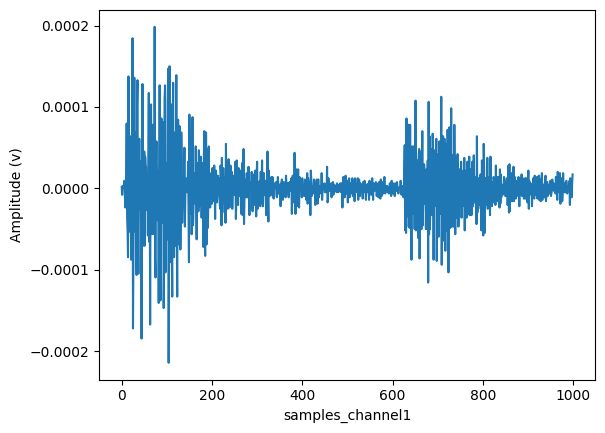

Tra: 100%|██████████| 228/228 [00:00<00:00, 10099.93it/s]


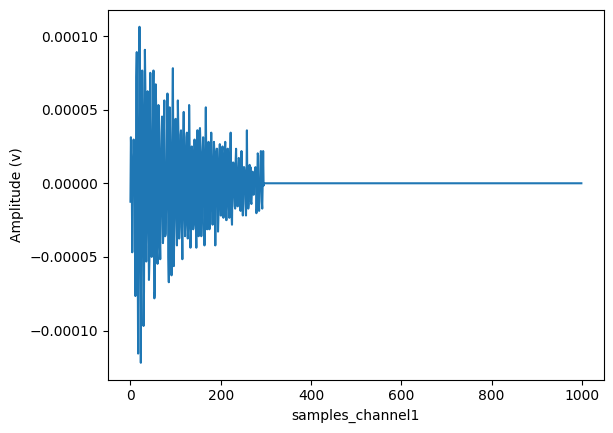

Tra: 100%|██████████| 228/228 [00:00<00:00, 8285.19it/s]


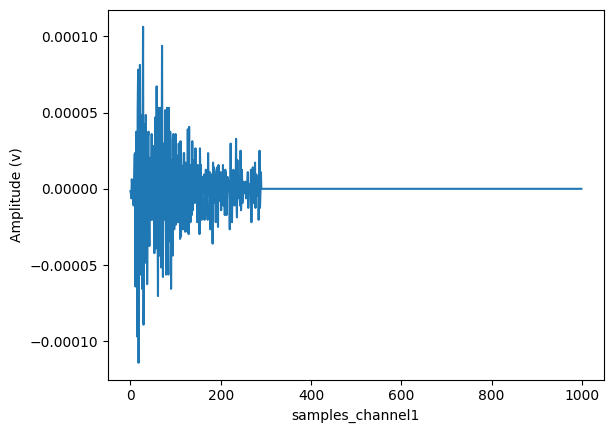

Tra: 100%|██████████| 228/228 [00:00<00:00, 8249.10it/s]


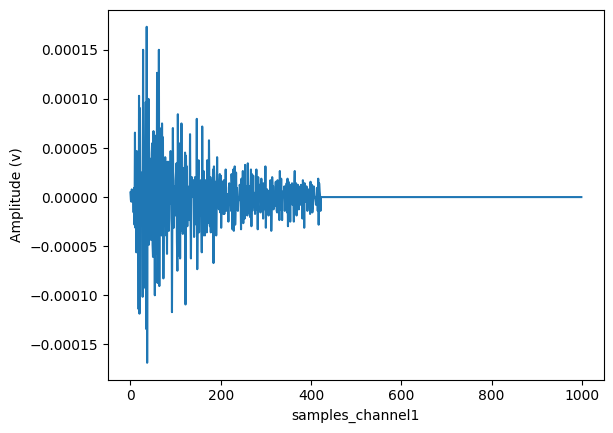

Tra: 100%|██████████| 228/228 [00:00<00:00, 5541.11it/s]


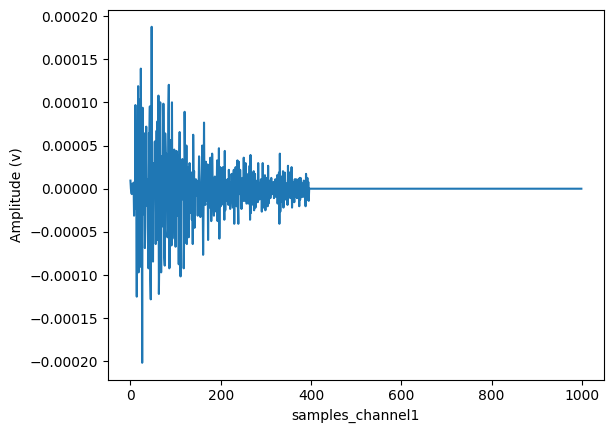

Tra: 100%|██████████| 228/228 [00:00<00:00, 7708.00it/s]


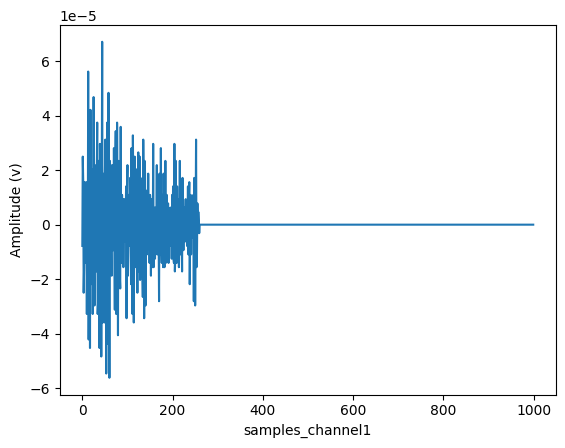

Tra: 100%|██████████| 228/228 [00:00<00:00, 5873.65it/s]


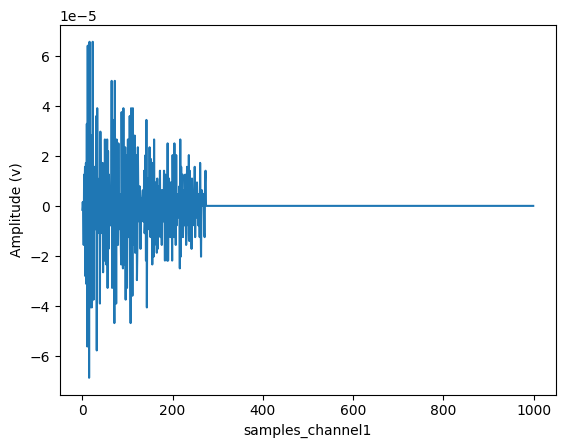

Tra: 100%|██████████| 228/228 [00:00<00:00, 6416.11it/s]


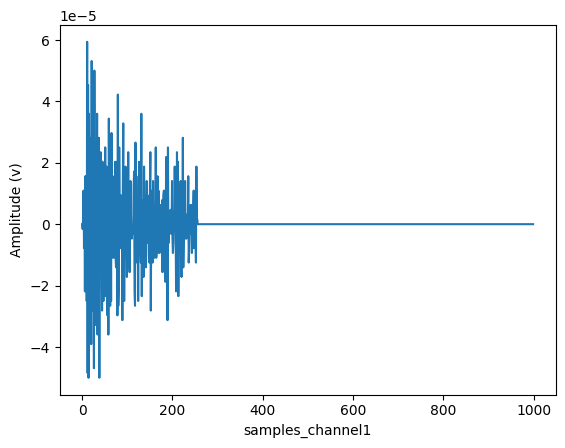

Tra: 100%|██████████| 228/228 [00:00<00:00, 6707.26it/s]


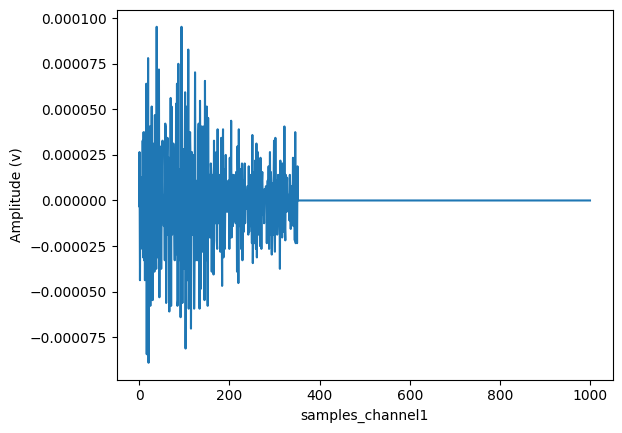

Tra: 100%|██████████| 228/228 [00:00<00:00, 8047.64it/s]


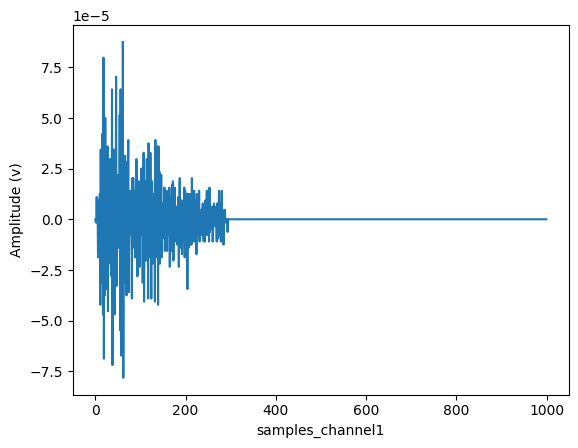

Tra: 100%|██████████| 228/228 [00:00<00:00, 7138.92it/s]


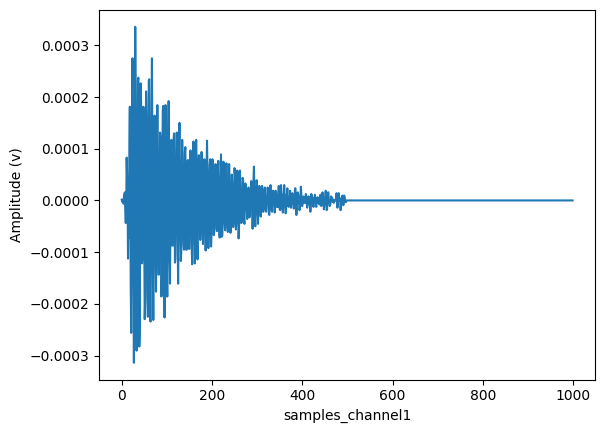

Tra: 100%|██████████| 228/228 [00:00<00:00, 8085.41it/s]


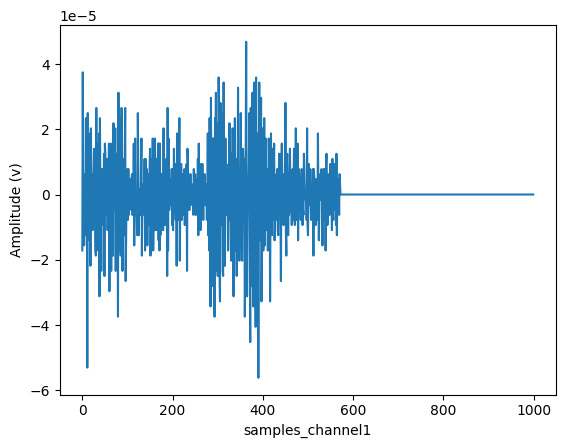

Tra: 100%|██████████| 228/228 [00:00<00:00, 7538.24it/s]


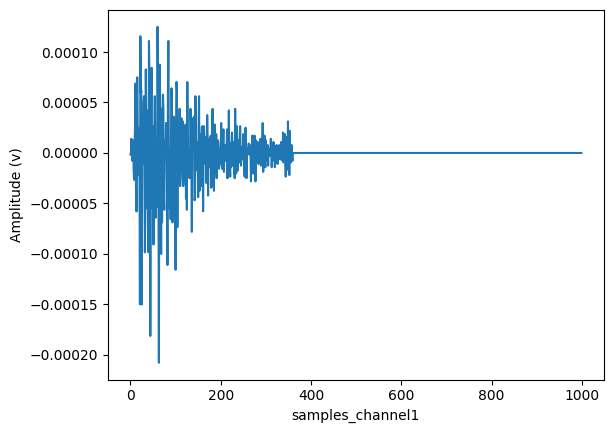

Tra: 100%|██████████| 228/228 [00:00<00:00, 8385.15it/s]


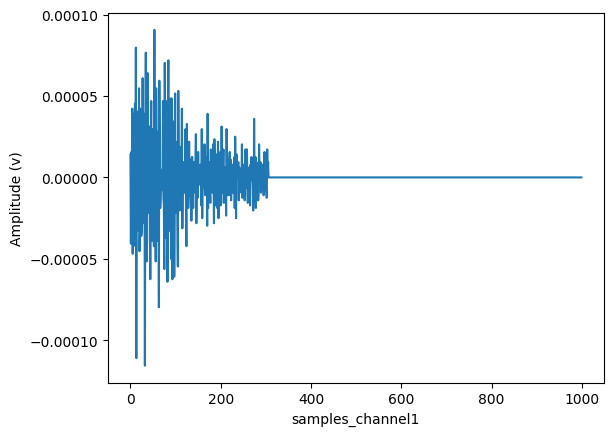

Tra: 100%|██████████| 228/228 [00:00<00:00, 6144.20it/s]


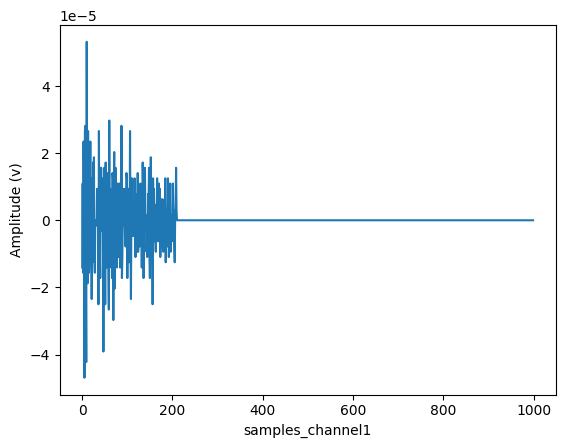

Tra: 100%|██████████| 228/228 [00:00<00:00, 8102.19it/s]


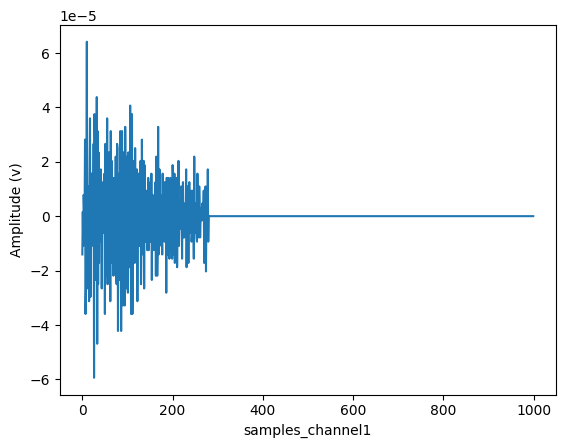

Tra: 100%|██████████| 228/228 [00:00<00:00, 6271.77it/s]


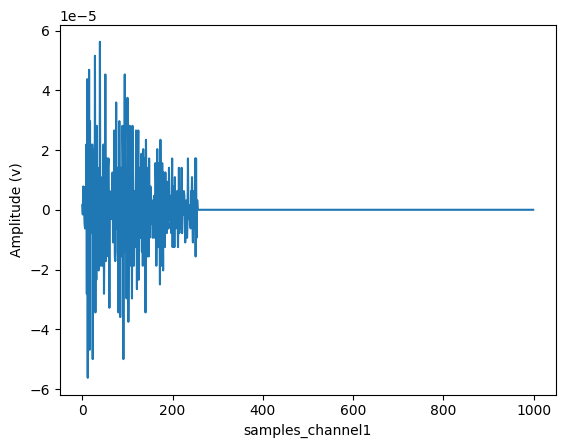

Tra: 100%|██████████| 228/228 [00:00<00:00, 5453.61it/s]


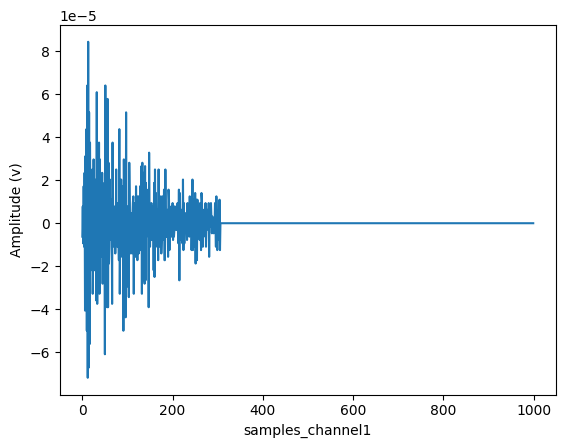

Tra: 100%|██████████| 228/228 [00:00<00:00, 6318.06it/s]


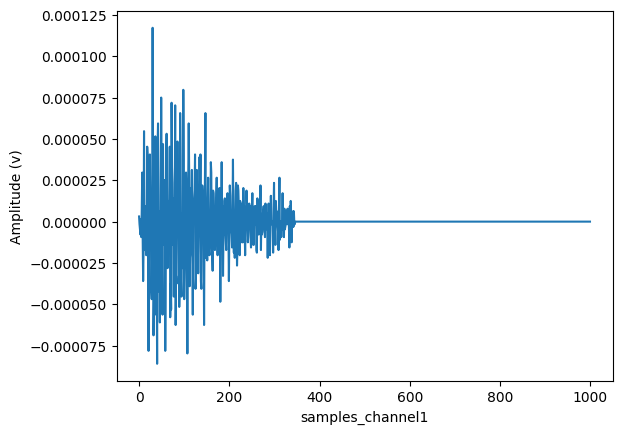

Tra: 100%|██████████| 228/228 [00:00<00:00, 6306.72it/s]


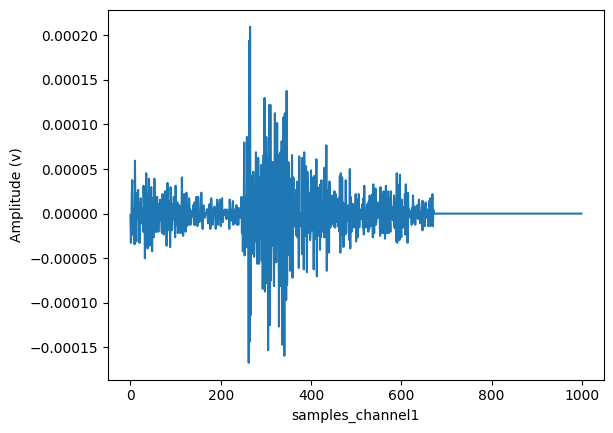

Tra: 100%|██████████| 228/228 [00:00<00:00, 7832.18it/s]


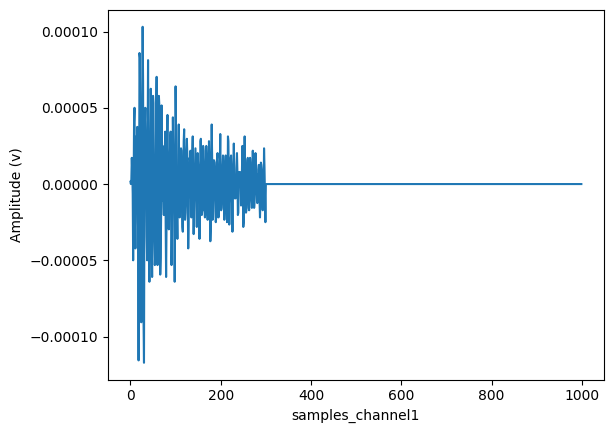

Tra: 100%|██████████| 228/228 [00:00<00:00, 6791.77it/s]


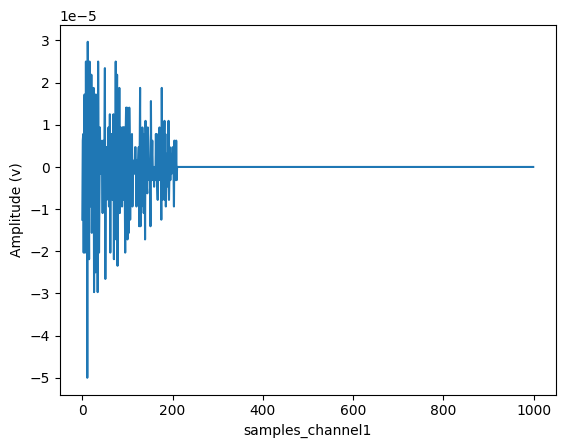

Tra: 100%|██████████| 228/228 [00:00<00:00, 8454.09it/s]


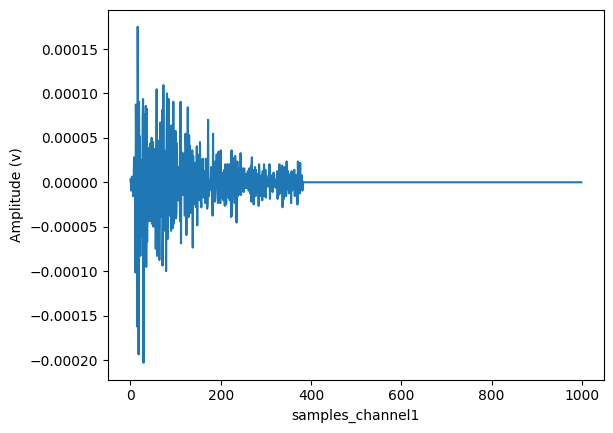

Tra: 100%|██████████| 228/228 [00:00<00:00, 7118.67it/s]


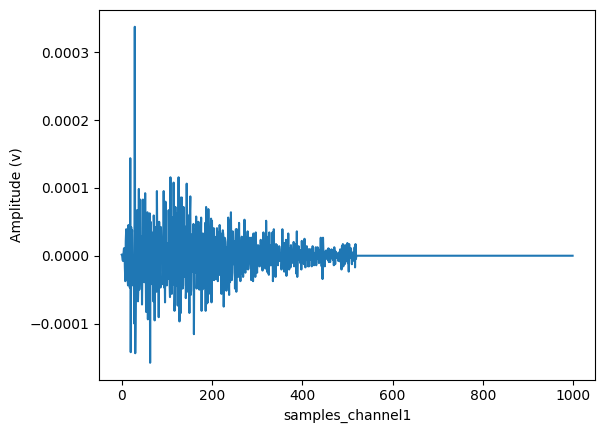

Tra: 100%|██████████| 228/228 [00:00<00:00, 9332.68it/s]


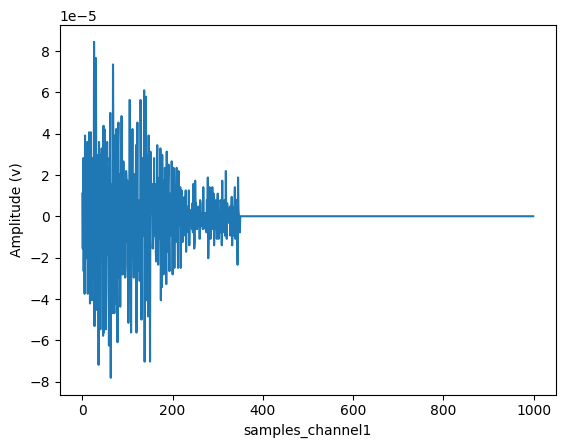

Tra: 100%|██████████| 228/228 [00:00<00:00, 8560.57it/s]


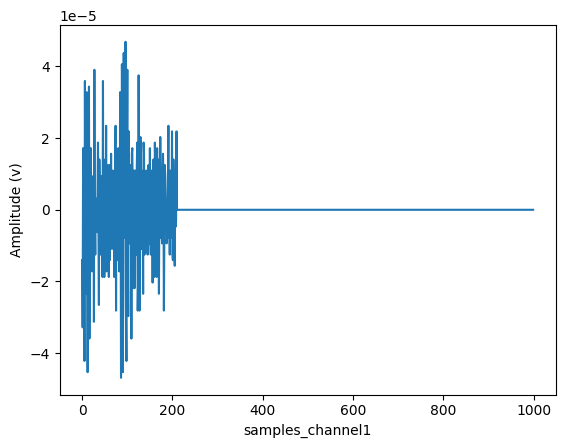

Tra: 100%|██████████| 228/228 [00:00<00:00, 7275.41it/s]


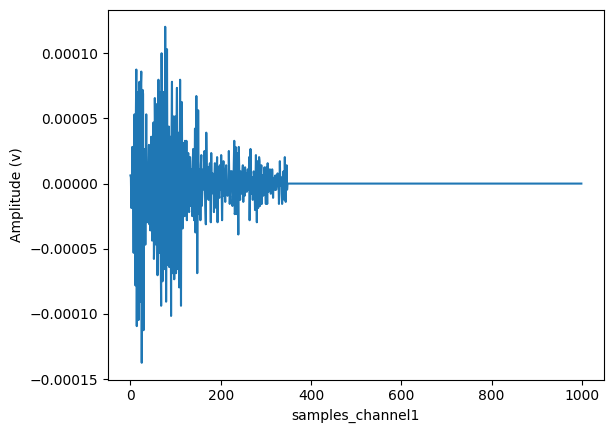

Tra: 100%|██████████| 228/228 [00:00<00:00, 6935.60it/s]


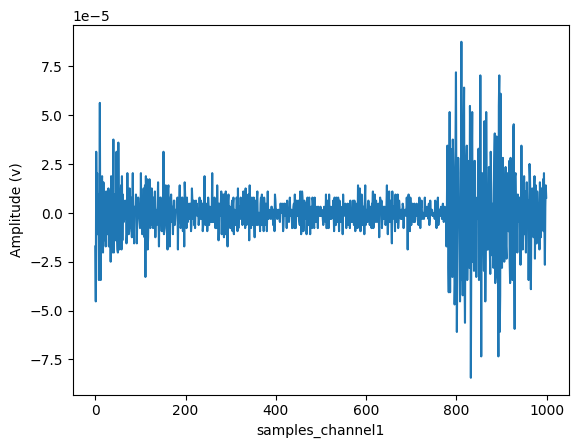

Tra: 100%|██████████| 228/228 [00:00<00:00, 8375.46it/s]


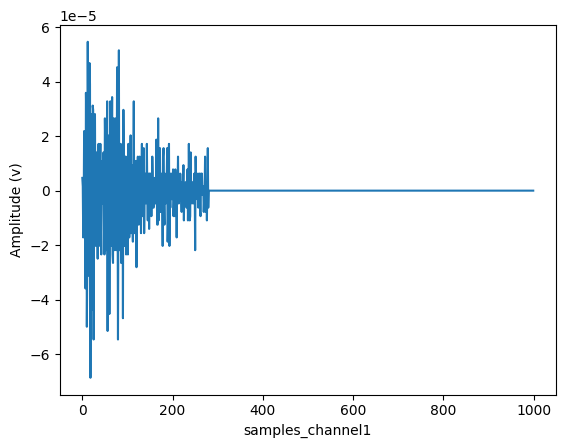

Tra: 100%|██████████| 228/228 [00:00<00:00, 8475.97it/s]


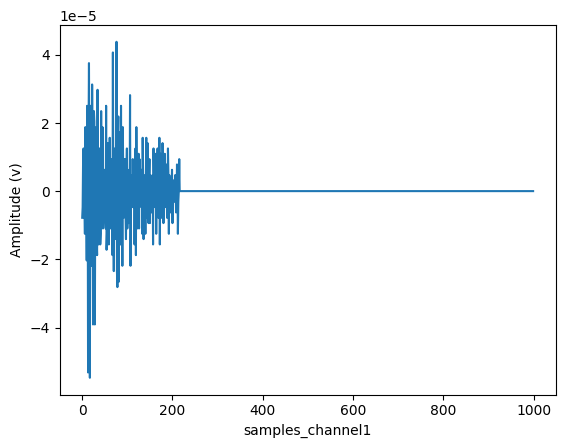

Tra: 100%|██████████| 228/228 [00:00<00:00, 4828.51it/s]


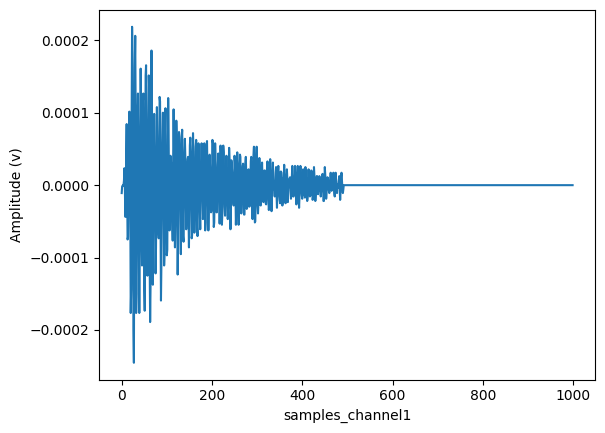

Tra: 100%|██████████| 228/228 [00:00<00:00, 6239.12it/s]


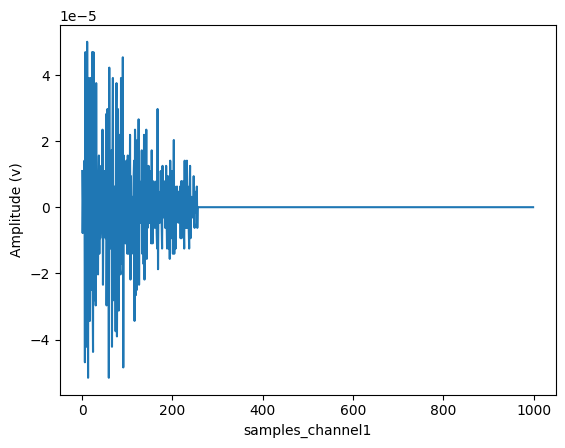

Tra: 100%|██████████| 228/228 [00:00<00:00, 8603.78it/s]


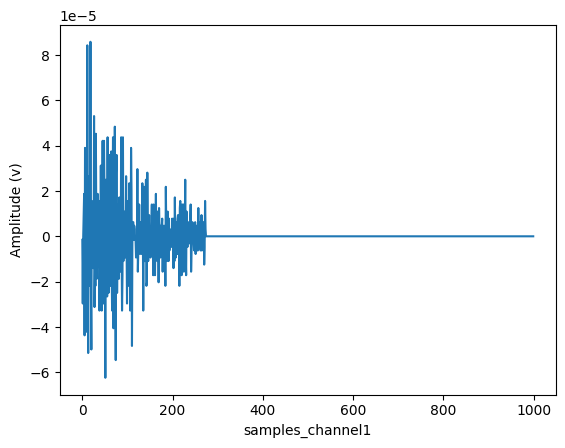

Tra: 100%|██████████| 228/228 [00:00<00:00, 6544.63it/s]


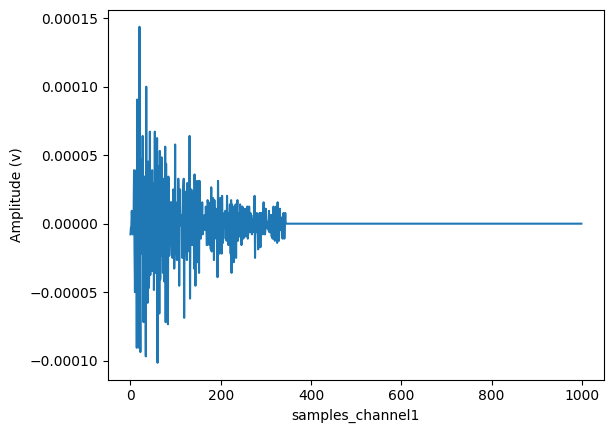

Tra: 100%|██████████| 228/228 [00:00<00:00, 6386.63it/s]


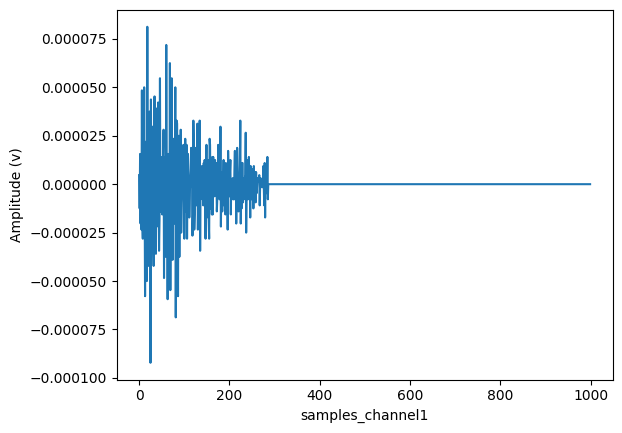

Tra: 100%|██████████| 228/228 [00:00<00:00, 7946.73it/s]


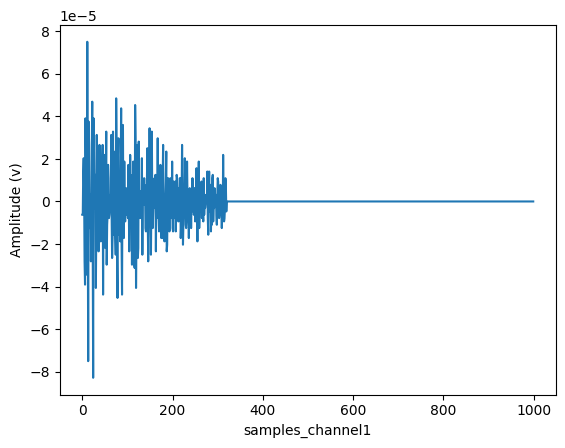

Tra: 100%|██████████| 228/228 [00:00<00:00, 6603.88it/s]


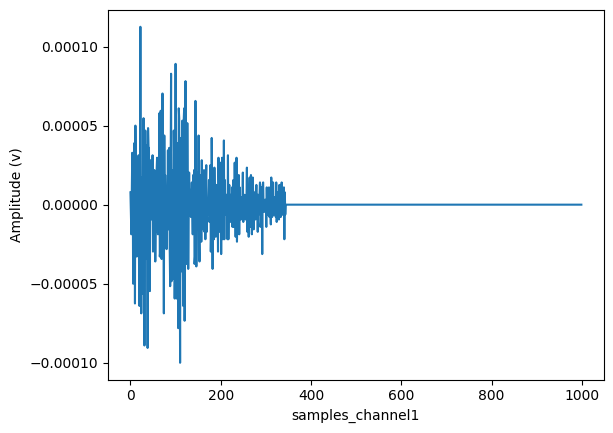

Tra: 100%|██████████| 228/228 [00:00<00:00, 9335.96it/s]


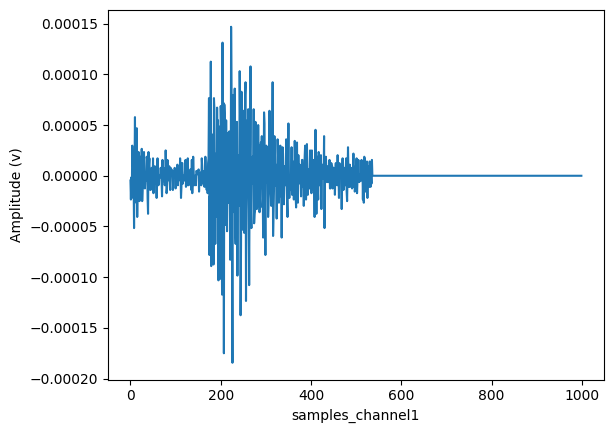

Tra: 100%|██████████| 228/228 [00:00<00:00, 8196.28it/s]


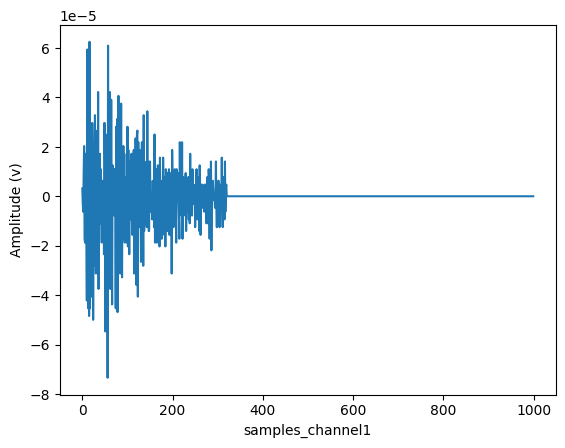

Tra: 100%|██████████| 228/228 [00:00<00:00, 5629.81it/s]


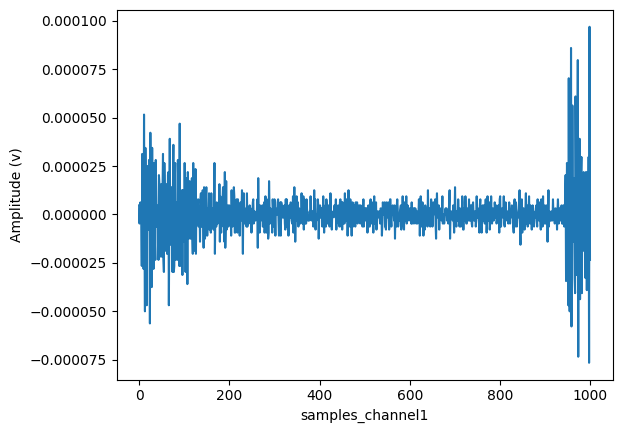

Tra: 100%|██████████| 228/228 [00:00<00:00, 7246.96it/s]


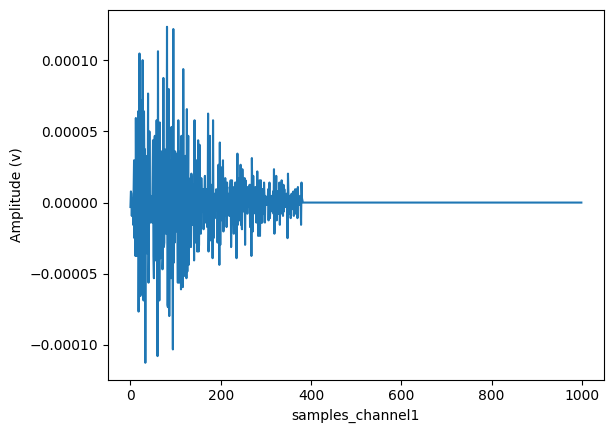

Tra: 100%|██████████| 228/228 [00:00<00:00, 8304.40it/s]


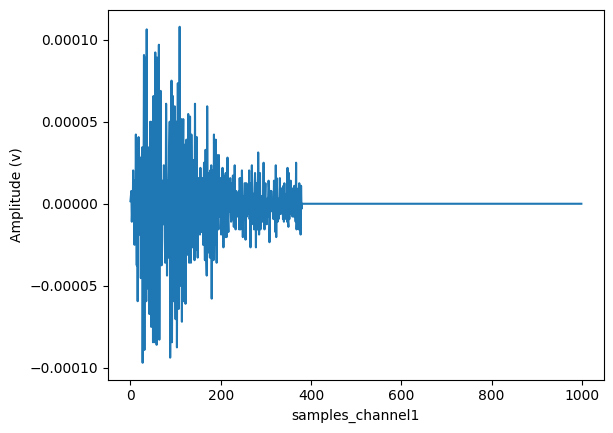

Tra: 100%|██████████| 228/228 [00:00<00:00, 8085.06it/s]


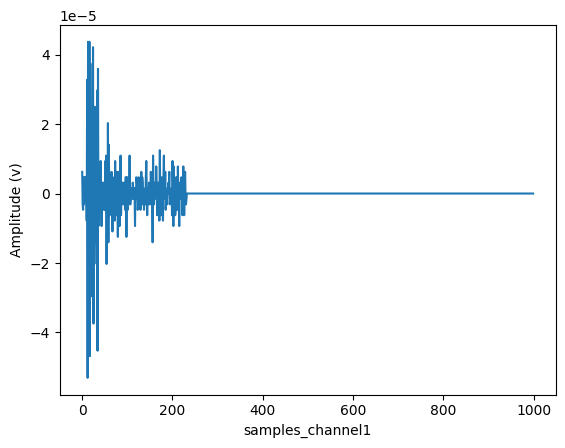

Tra: 100%|██████████| 228/228 [00:00<00:00, 4890.54it/s]


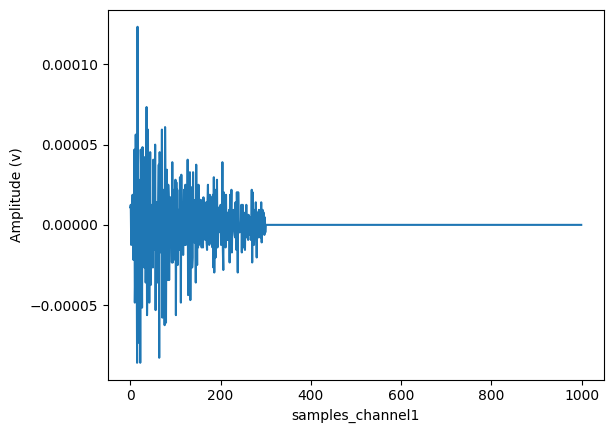

Tra: 100%|██████████| 228/228 [00:00<00:00, 6615.90it/s]


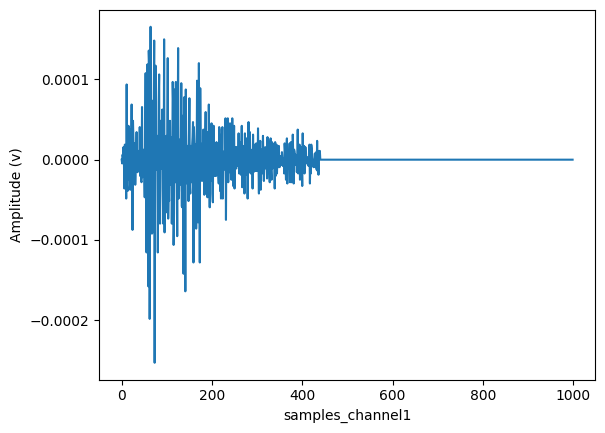

Tra: 100%|██████████| 228/228 [00:00<00:00, 6930.27it/s]


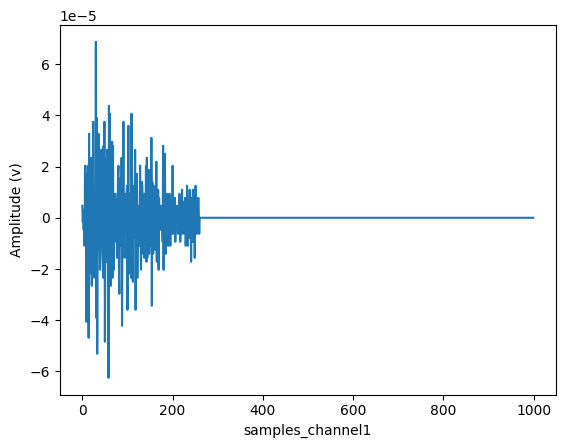

Tra: 100%|██████████| 228/228 [00:00<00:00, 6508.20it/s]


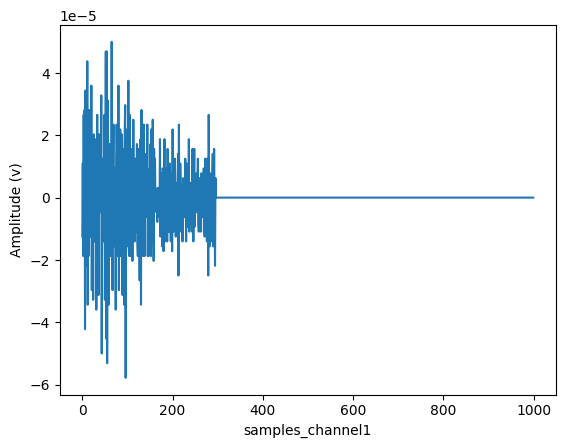

Tra: 100%|██████████| 228/228 [00:00<00:00, 6453.73it/s]


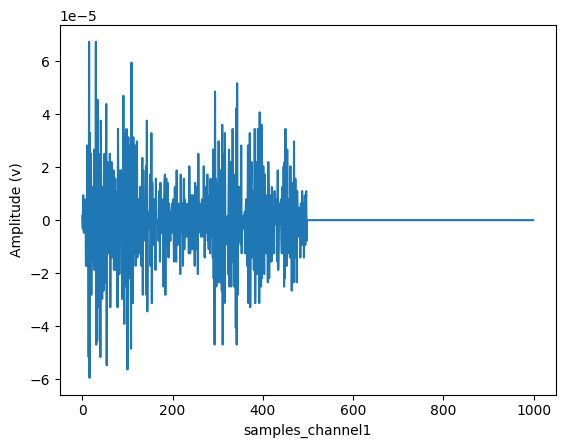

Tra: 100%|██████████| 228/228 [00:00<00:00, 6741.11it/s]


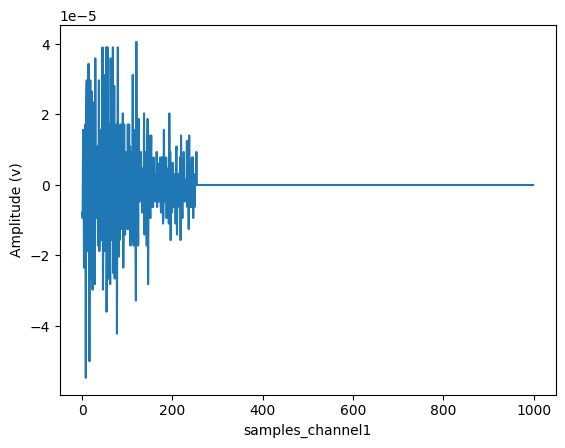

Tra: 100%|██████████| 228/228 [00:00<00:00, 8182.89it/s]


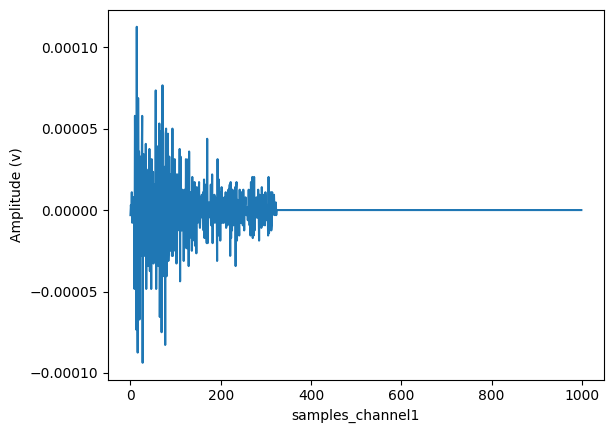

Tra: 100%|██████████| 228/228 [00:00<00:00, 4736.32it/s]


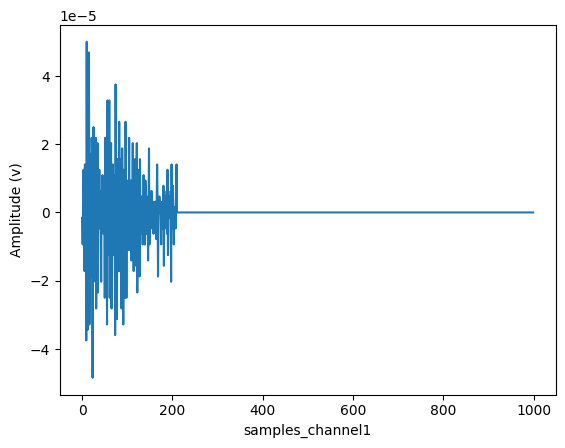

Tra: 100%|██████████| 228/228 [00:00<00:00, 5719.92it/s]


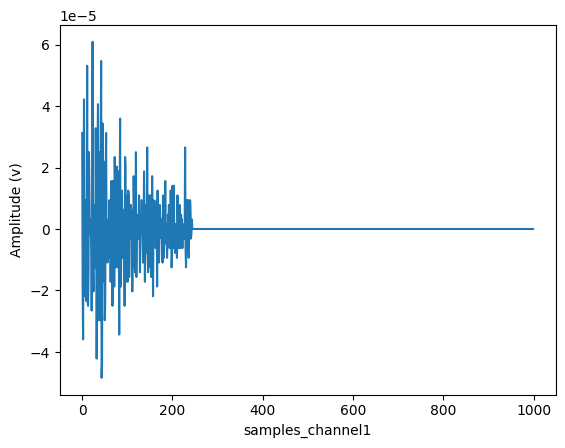

Tra: 100%|██████████| 228/228 [00:00<00:00, 6544.67it/s]


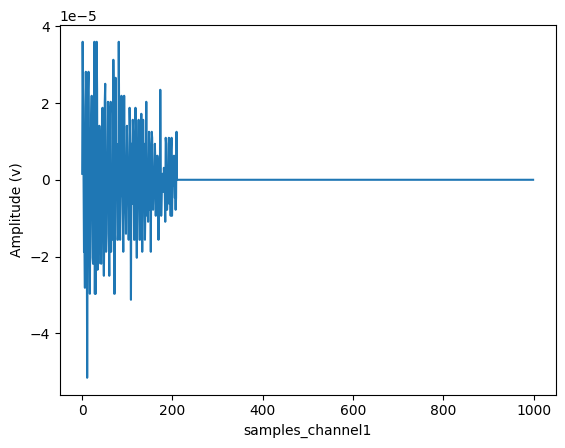

Tra: 100%|██████████| 228/228 [00:00<00:00, 6603.74it/s]


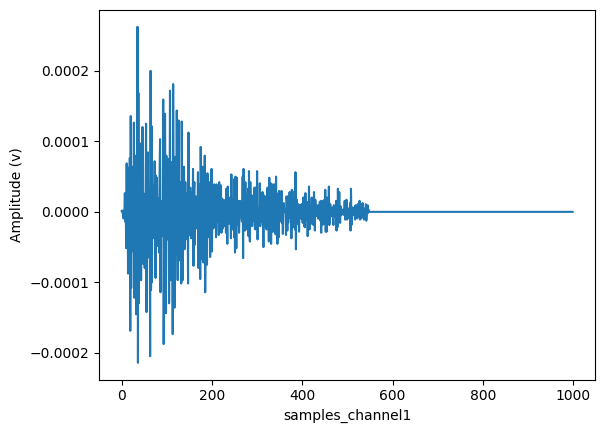

Tra: 100%|██████████| 228/228 [00:00<00:00, 6445.30it/s]


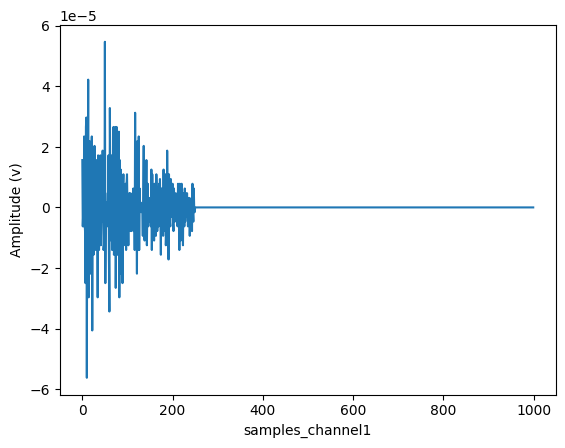

Tra: 100%|██████████| 228/228 [00:00<00:00, 5911.30it/s]


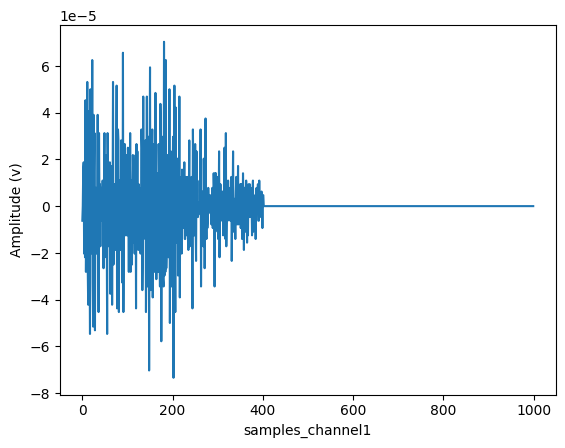

Tra: 100%|██████████| 228/228 [00:00<00:00, 6531.44it/s]


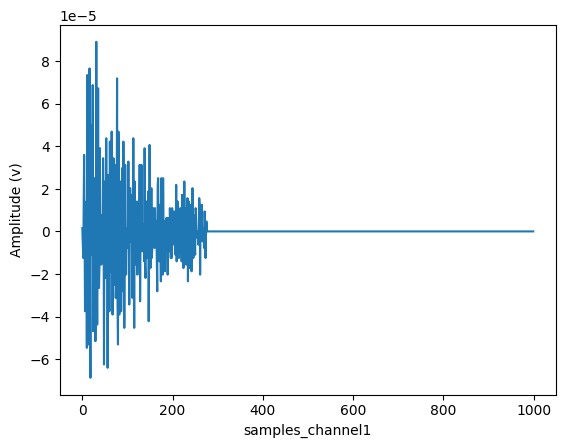

Tra: 100%|██████████| 228/228 [00:00<00:00, 6446.21it/s]


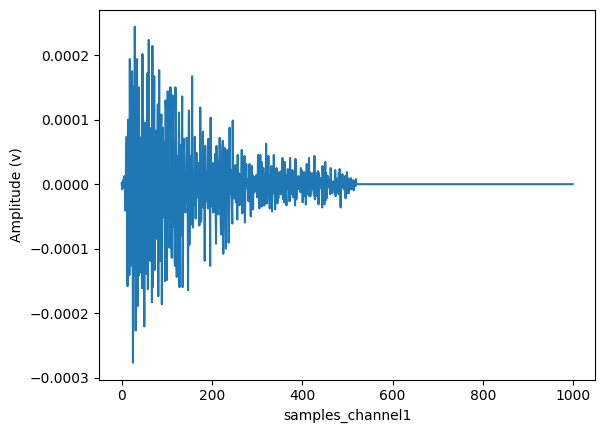

Tra: 100%|██████████| 228/228 [00:00<00:00, 9159.97it/s]


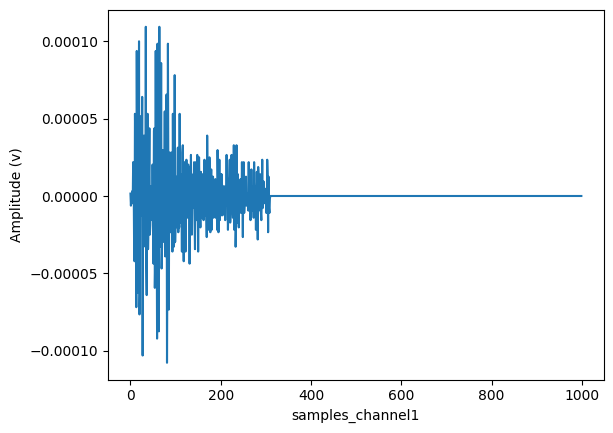

Tra: 100%|██████████| 228/228 [00:00<00:00, 5427.36it/s]


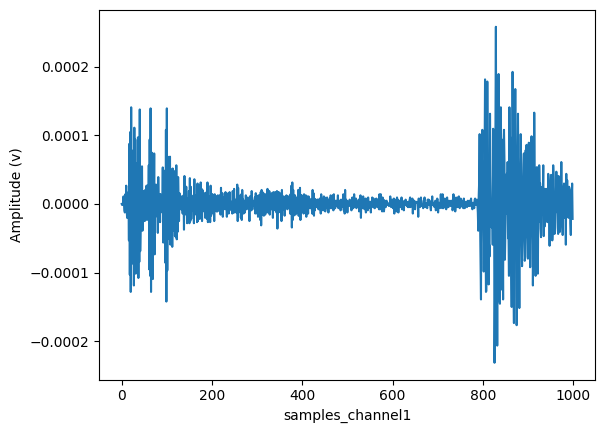

Tra: 100%|██████████| 228/228 [00:00<00:00, 5266.88it/s]


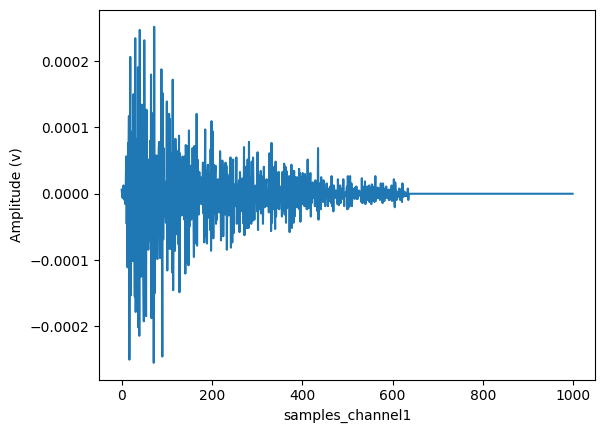

Tra: 100%|██████████| 228/228 [00:00<00:00, 5398.47it/s]


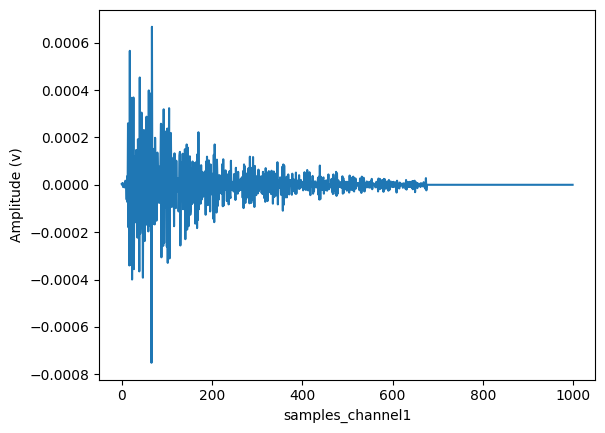

Tra: 100%|██████████| 228/228 [00:00<00:00, 6736.46it/s]


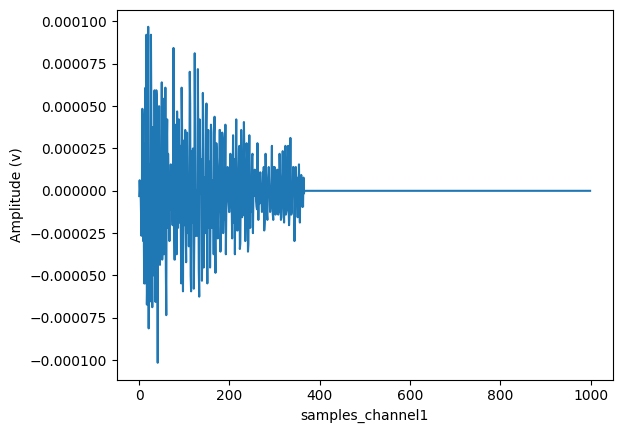

Tra: 100%|██████████| 228/228 [00:00<00:00, 8217.34it/s]


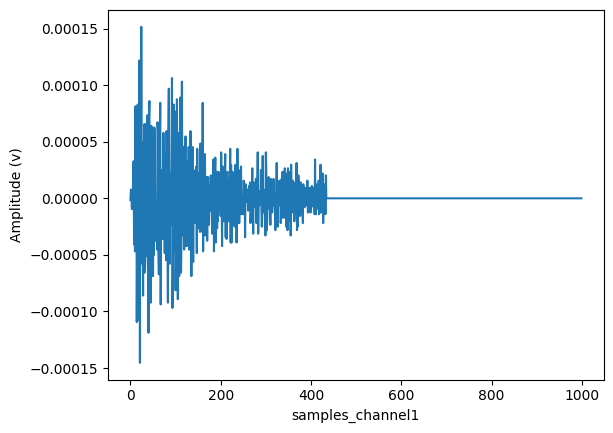

Tra: 100%|██████████| 228/228 [00:00<00:00, 6533.81it/s]


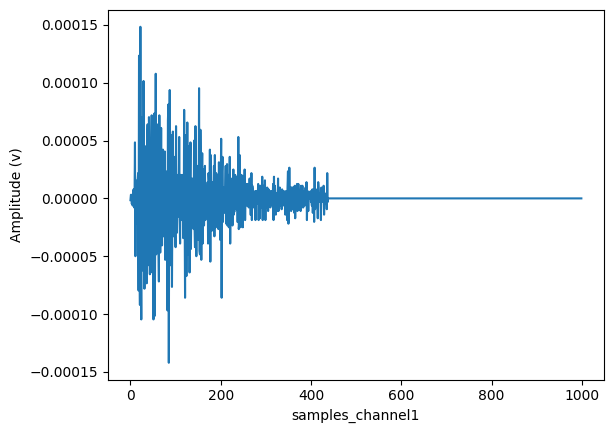

Tra: 100%|██████████| 228/228 [00:00<00:00, 8012.58it/s]


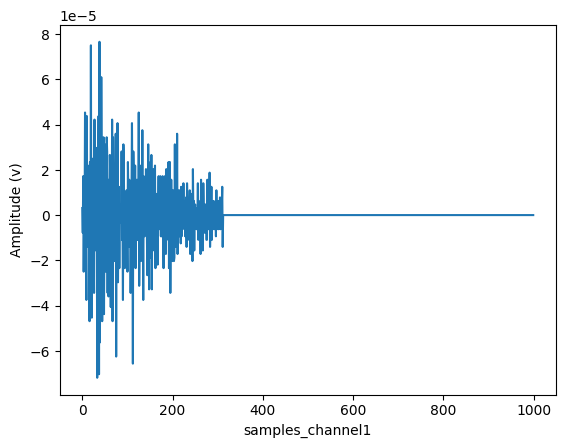

Tra: 100%|██████████| 228/228 [00:00<00:00, 5400.45it/s]


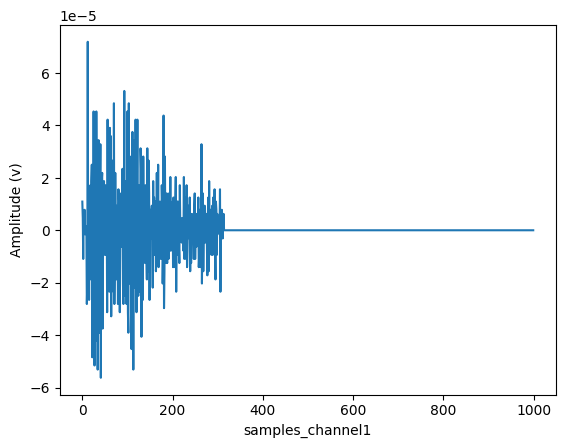

Tra: 100%|██████████| 228/228 [00:00<00:00, 7296.89it/s]


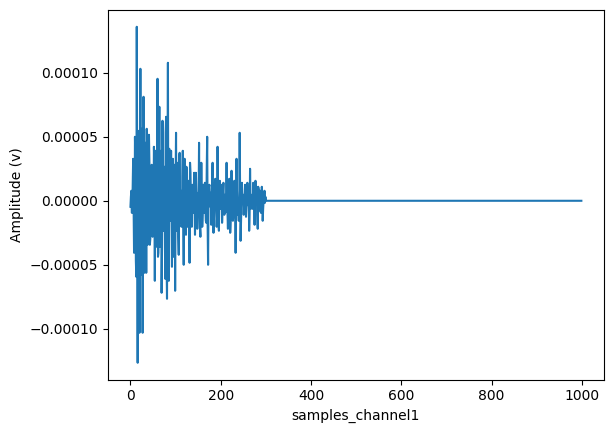

Tra: 100%|██████████| 228/228 [00:00<00:00, 6526.81it/s]


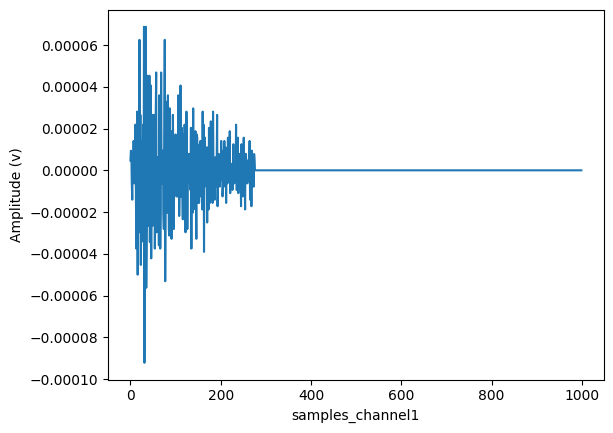

Tra: 100%|██████████| 228/228 [00:00<00:00, 7289.66it/s]


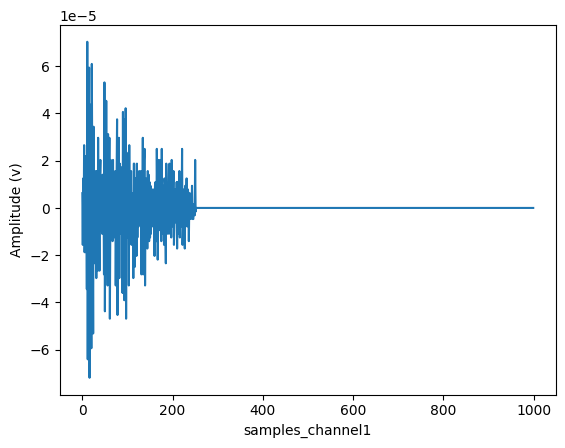

Tra: 100%|██████████| 228/228 [00:00<00:00, 6946.89it/s]


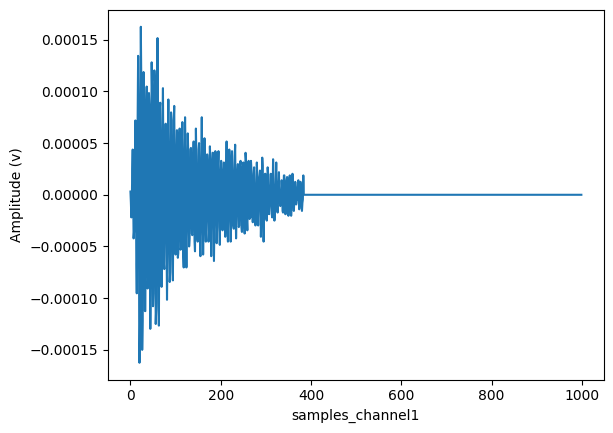

Tra: 100%|██████████| 228/228 [00:00<00:00, 5660.97it/s]


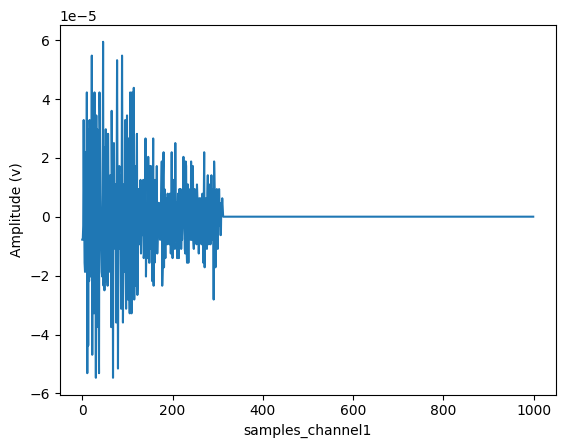

Tra: 100%|██████████| 228/228 [00:00<00:00, 8397.74it/s]


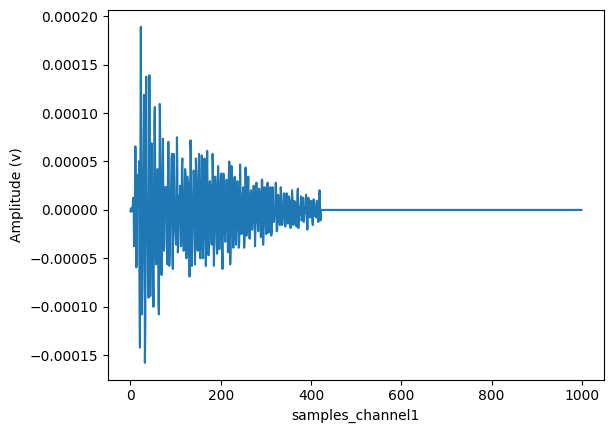

Tra: 100%|██████████| 228/228 [00:00<00:00, 7104.40it/s]


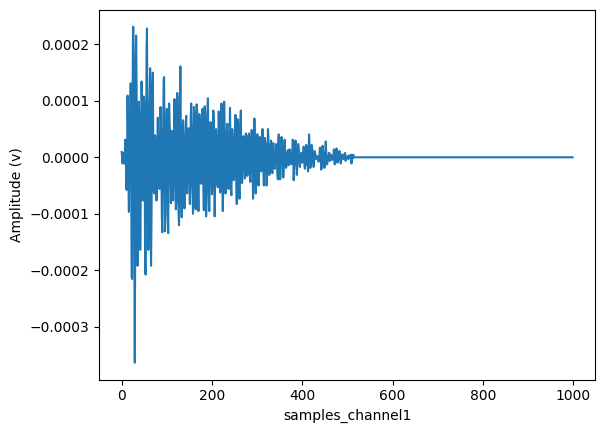

Tra: 100%|██████████| 228/228 [00:00<00:00, 5595.51it/s]


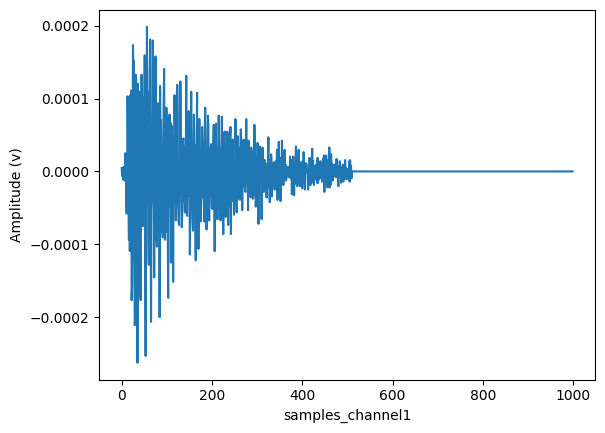

Tra: 100%|██████████| 228/228 [00:00<00:00, 6859.58it/s]


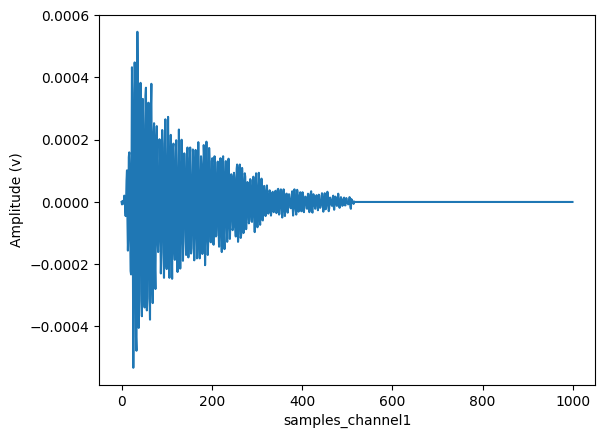

Tra: 100%|██████████| 228/228 [00:00<00:00, 4586.51it/s]


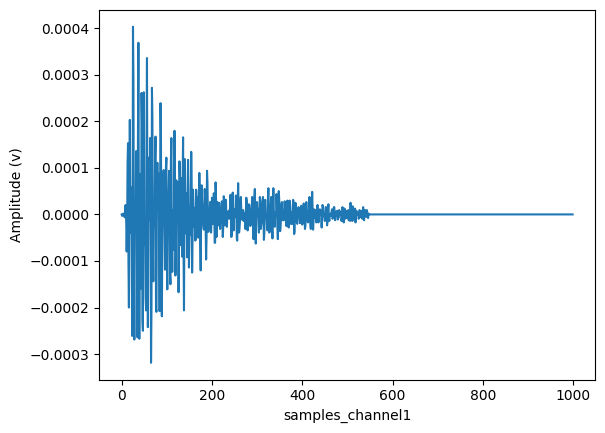

Tra: 100%|██████████| 228/228 [00:00<00:00, 6505.67it/s]


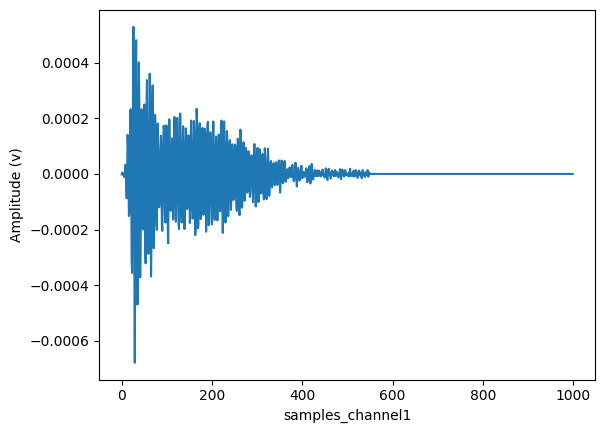

Tra: 100%|██████████| 228/228 [00:00<00:00, 5484.54it/s]


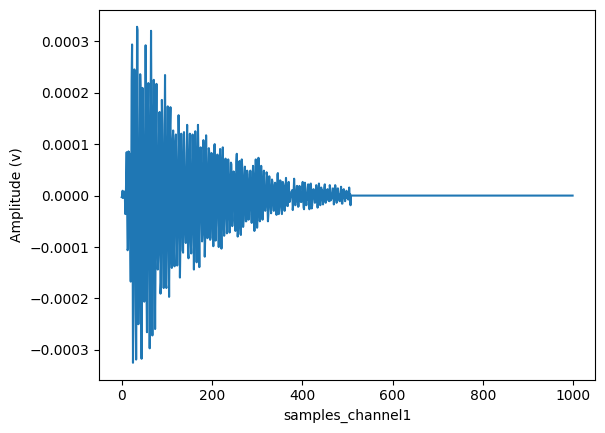

Tra: 100%|██████████| 228/228 [00:00<00:00, 7095.43it/s]


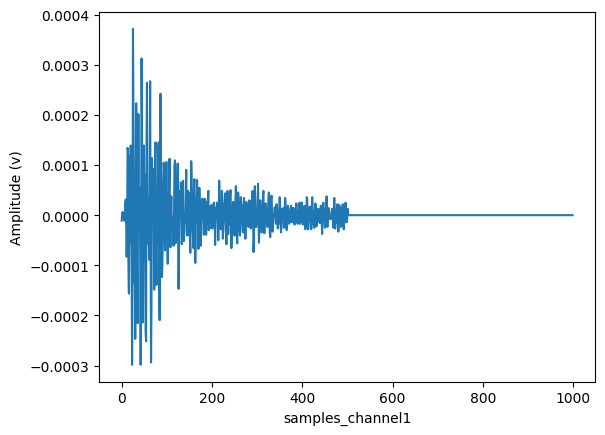

Tra: 100%|██████████| 228/228 [00:00<00:00, 4781.55it/s]


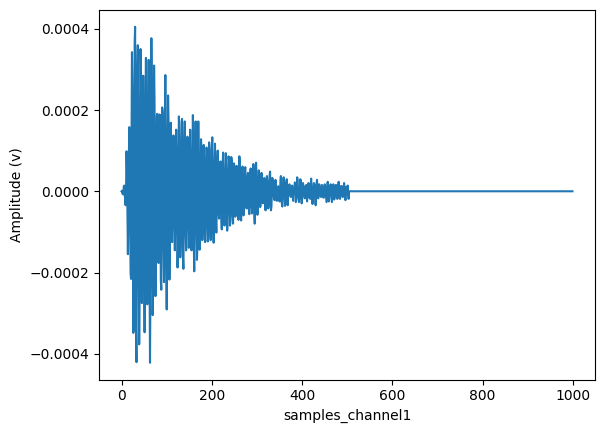

Tra: 100%|██████████| 228/228 [00:00<00:00, 11890.45it/s]


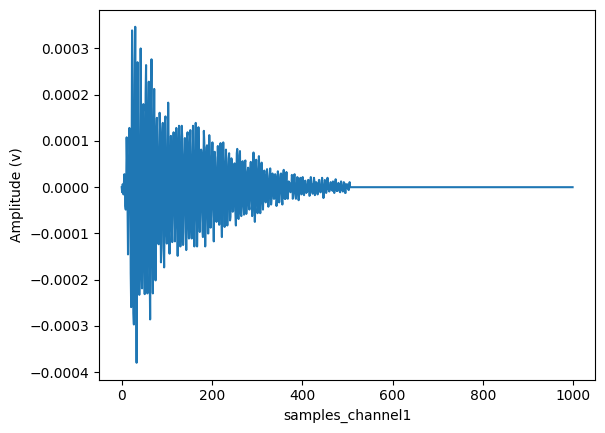

Tra: 100%|██████████| 228/228 [00:00<00:00, 8196.35it/s]


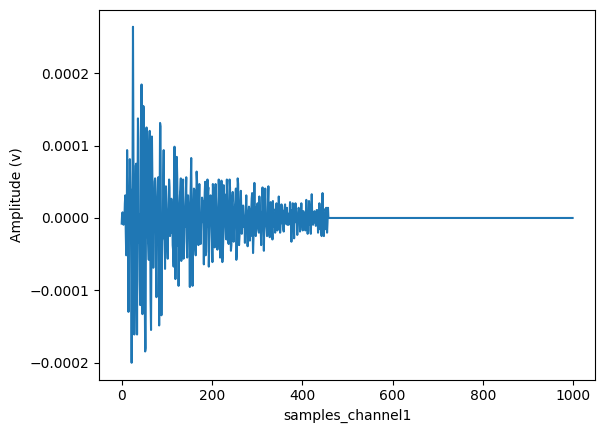

Tra: 100%|██████████| 228/228 [00:00<00:00, 5428.69it/s]


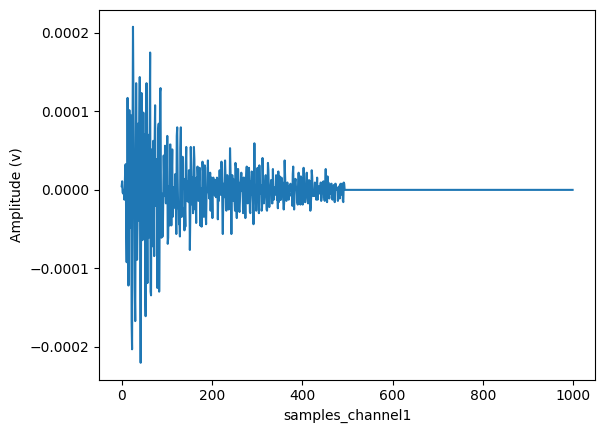

Tra: 100%|██████████| 228/228 [00:00<00:00, 6289.84it/s]


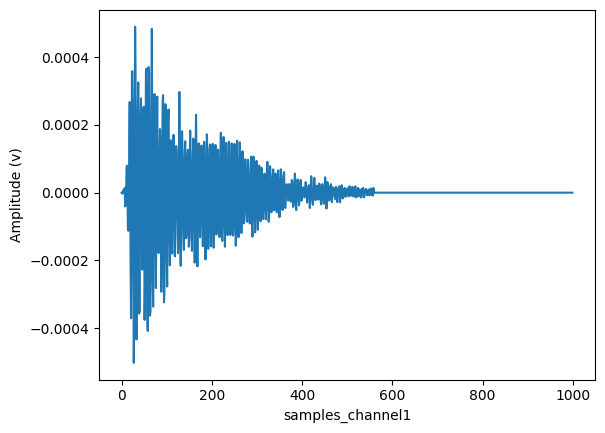

Tra: 100%|██████████| 228/228 [00:00<00:00, 7354.24it/s]


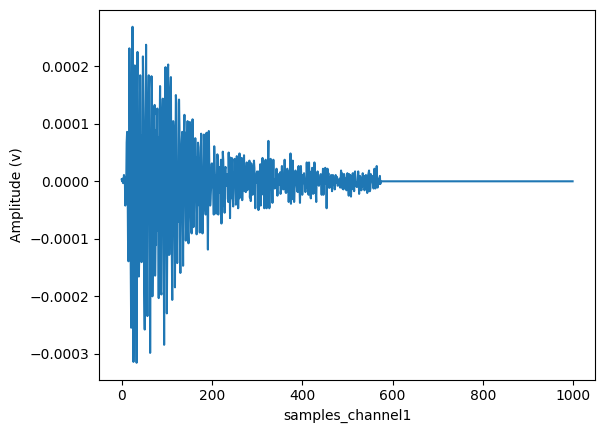

Tra: 100%|██████████| 228/228 [00:00<00:00, 7231.78it/s]


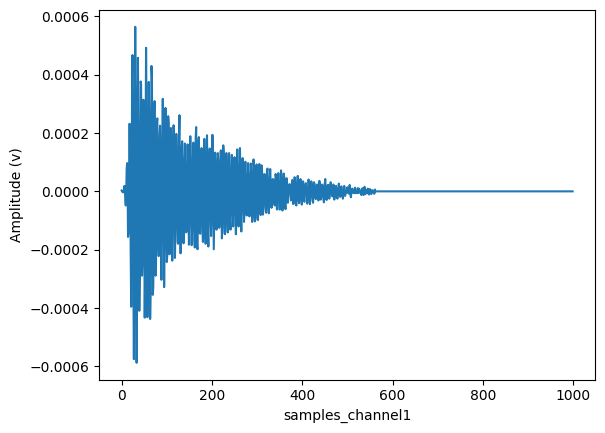

Tra: 100%|██████████| 228/228 [00:00<00:00, 6472.21it/s]


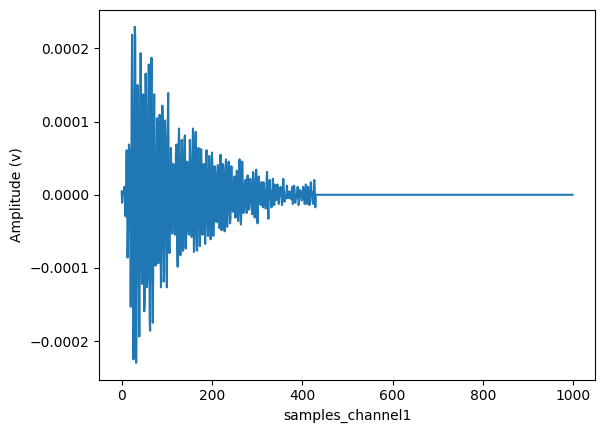

Tra: 100%|██████████| 228/228 [00:00<00:00, 8587.24it/s]


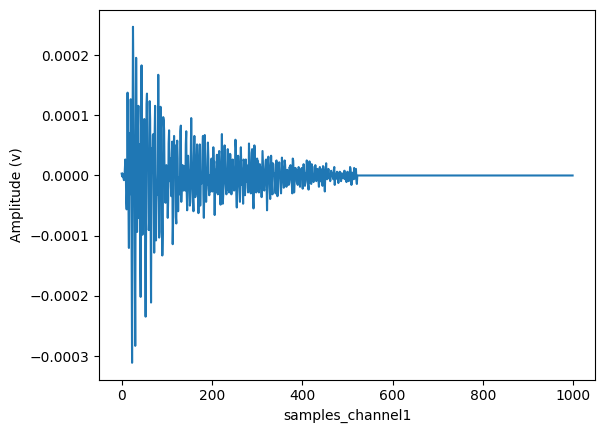

Tra: 100%|██████████| 228/228 [00:00<00:00, 6547.72it/s]


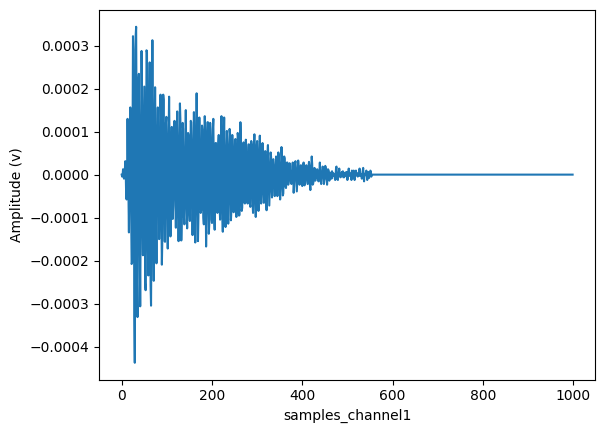

Tra: 100%|██████████| 228/228 [00:00<00:00, 6477.03it/s]


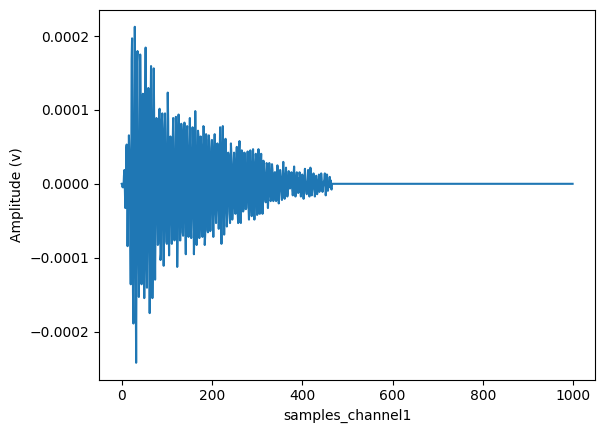

Tra: 100%|██████████| 228/228 [00:00<00:00, 7955.12it/s]


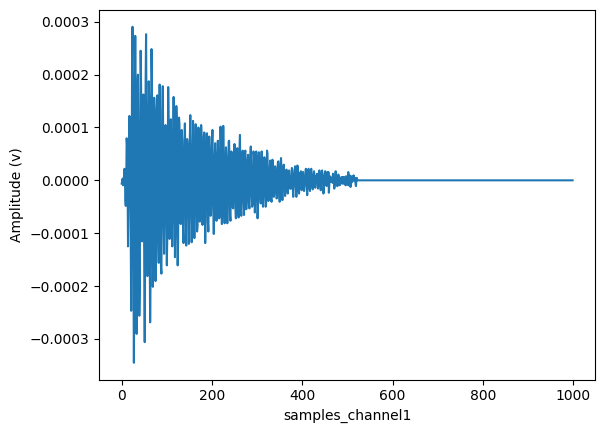

Tra: 100%|██████████| 228/228 [00:00<00:00, 6517.73it/s]


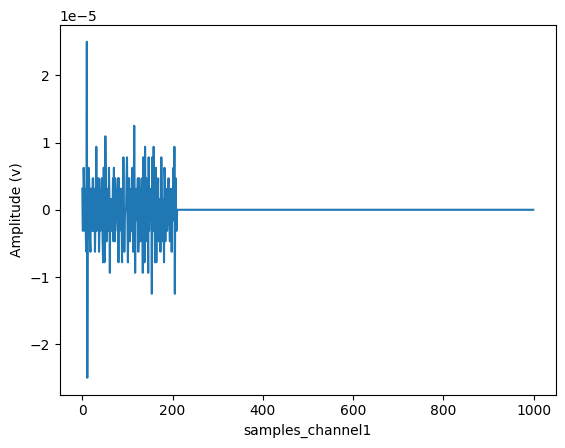

Tra: 100%|██████████| 228/228 [00:00<00:00, 8240.07it/s]


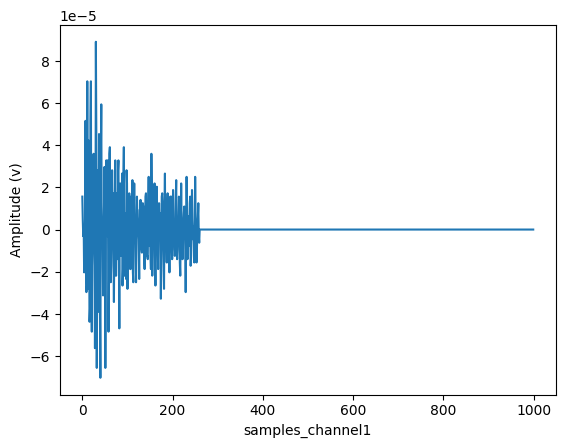

Tra: 100%|██████████| 228/228 [00:00<00:00, 7289.05it/s]


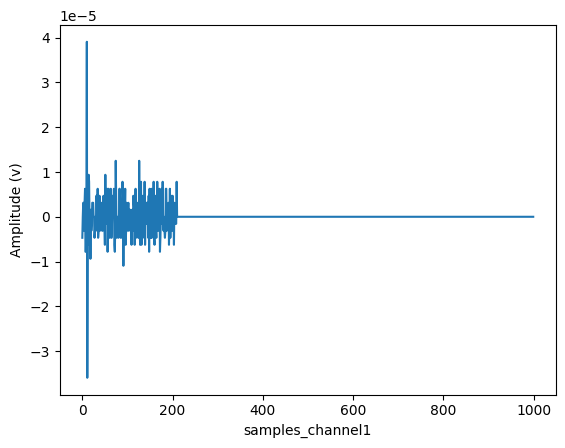

Tra: 100%|██████████| 228/228 [00:00<00:00, 8119.39it/s]


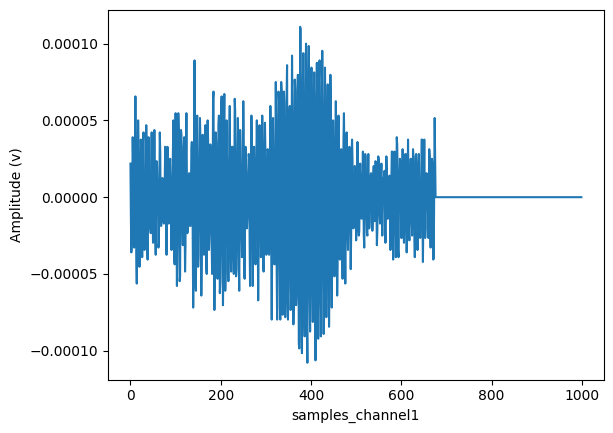

Tra: 100%|██████████| 228/228 [00:00<00:00, 8846.86it/s]


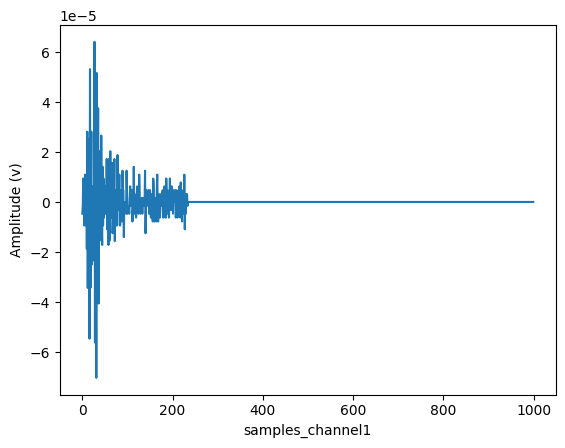

In [13]:
i=0
x=[]
while True:
    tradb = Path(r'C:\Users\djeri\OneDrive\Desktop\Vallen\data\malik\UnderExtTest1_1000DDT_35DB.tradb')
    with vae.io.TraDatabase(tradb) as tradb:
        full_df = tradb.read()
    filtered_df = full_df['data'].where(full_df['channel']==1)
    new=filtered_df.dropna()
    x=new.values[i]
    x=x.tolist()
    if len(x)>1000:
        x=x[:1000]
    else:
        for j in range(1000-len(x)):
            x.append(0)
    df = pd.DataFrame(x)
    y=df.to_csv(fr'C:\Users\djeri\OneDrive\Desktop\Vallen\data\csv\sarah{i}.csv',index=False)
    #with open(os.path.join(dir, "real_time"+'.csv'), "w") as f:
       # writer = csv.writer(f) 
        #writer.writerows(y)
    plt.figure(1)
    plt.plot(df)
    plt.xlabel('samples_channel1')
    plt.ylabel('Amplitude (v)')
    plt.show()
    plt.close(1)
    i=i+1
    if i== len(new):
        break


csv in realtime :1000 samples

In [51]:
i=0
x=[]
while True:
    tradb = Path(r'C:\Users\djeri\OneDrive\Desktop\Vallen\data\ahmed\xx1.tradb')
    with vae.io.TraDatabase(tradb) as tradb:
        full_df = tradb.read()
    filtered_df = full_df['data'].where(full_df['channel']==1)
    new=filtered_df.dropna()
    x=new.values[i]
    if len(x)>1000:
        x=x[:1000]
    else:
        for j in range(1000-len(x)):
            x.append(0)
    df = pd.DataFrame(x)
    y=df.to_csv(fr'C:\Users\djeri\OneDrive\Desktop\Vallen\data\csv\csvxx\xx1{i}.csv',index=False)
    i=i+1
    if i==len(new):
        while True:
            tradb = Path(r'C:\Users\djeri\OneDrive\Desktop\Vallen\data\ahmed\xx1.tradb')
            with vae.io.TraDatabase(tradb) as tradb:
                full_df = tradb.read()
            filtered_df = full_df['data'].where(full_df['channel']==1)
            new=filtered_df.dropna()
            if i< len(new):
                break
            
        
    
    
    

Tra: 100%|██████████| 55/55 [00:00<00:00, 9457.47it/s]


KeyboardInterrupt: 